# 第01周作业：Ames房价数据探索 Data Explore
根据房屋的特征来预测亚美尼亚州洛瓦市（Ames，Lowa）的房价。
其中房屋的特征 x 共有 79 维，响应值 y 为每个房屋的销售价格（SalePrice）。 
评价标准为预测值的对数和观测值的对数的 RMSE(Root-Mean-Squared-Error )。

## 这里读取的是特征工程之后的数据
## 代码版本 Python3

In [6]:
# 导入必要的工具包
import numpy as np #用于数值计算
import pandas as pd #用于数据表处理，数据文件读写

import matplotlib.pyplot as plt #用于绘图：分析结果的可视化。
import seaborn as sns #用于绘图：分析结果的可视化。封装更好。
from IPython.display import display

#应该是设置浮点数的形式格式，小数点后三位
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#这一行是干嘛的？ 设置 matplotlib 让绘制的图形出现在 Notebook 里而不是新窗口
%matplotlib inline

#读取训练数据: 特征工程之后的
dpath = './data/'
data = pd.read_csv(dpath + 'AmesHouse_FE_train.csv')
data.head(6) #查看数据的前几行，默认是 5 

LotFrontage  LotArea  Street  Alley  LotShape  Utilities  LandSlope  \
0        0.227   -0.203   0.064 -0.243     0.701      0.026      0.226   
1        0.670   -0.086   0.064 -0.243     0.701      0.026      0.226   
2        0.316    0.081   0.064 -0.243    -1.029      0.026      0.226   
3        0.080   -0.091   0.064 -0.243    -1.029      0.026      0.226   
4        0.789    0.387   0.064 -0.243    -1.029      0.026      0.226   
5        0.818    0.372   0.064 -0.243    -1.029      0.026      0.226   

   YearBuilt  YearRemodAdd  MasVnrArea    ...      SaleType_CWD  SaleType_Con  \
0      1.054         0.881       0.534    ...                 0             0   
1      0.159        -0.427      -0.574    ...                 0             0   
2      0.988         0.832       0.342    ...                 0             0   
3     -1.861        -0.718      -0.574    ...                 0             0   
4      0.954         0.735       1.404    ...                 0             0   
5      0.723         0.493      -0.574    ...                 0             0   

   SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0               0               0               0             0             0   
1               0               0               0             0             0   
2               0               0               0             0             0   
3               0               0               0             0             0   
4               0               0               0             0             0   
5               0               0               0             0             0   

   SaleType_WD  SaleType_nan  SalePrice  
0            1             0     208500  
1            1             0     181500  
2            1             0     223500  
3            1             0     140000  
4            1             0     250000  
5            1             0     143000  

[6 rows x 286 columns]

In [7]:
data.info()#数据基本信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Columns: 286 entries, LotFrontage to SalePrice
dtypes: float64(72), int64(214)
memory usage: 3.2 MB


In [8]:
# 查看是否有空值
data.isnull().sum()

LotFrontage             0
LotArea                 0
Street                  0
Alley                   0
LotShape                0
Utilities               0
LandSlope               0
YearBuilt               0
YearRemodAdd            0
MasVnrArea              0
BsmtQual                0
BsmtCond                0
BsmtExposure            0
BsmtFinType1            0
BsmtFinSF1              0
BsmtFinType2            0
BsmtFinSF2              0
BsmtUnfSF               0
HeatingQC               0
LowQualFinSF            0
BedroomAbvGr            0
TotRmsAbvGrd            0
Functional              0
GarageYrBlt             0
GarageCars              0
PavedDrive              0
WoodDeckSF              0
MiscVal                 0
YrSold                  0
OverallGrade            0
                       ..
Neighborhood_StoneBr    0
Neighborhood_Timber     0
Neighborhood_Veenker    0
Neighborhood_nan        0
RoofMatl_CompShg        0
RoofMatl_Membran        0
RoofMatl_Metal          0
RoofMatl_Rol

## 探索数据
查看数据各特征的分布，以及特征之间是否存在相关关系等冗余。

借用可视化工具来直观感觉数据的分布。

In [9]:
#各属性的统计特性: 初步了解各特征的分布
#样本数目、均值、标准差、最小值、1/4分位数（25%）、中位数（50%）、3/4分位数（75%）、最大值
data.describe()

LotFrontage  LotArea   Street    Alley  LotShape  Utilities  LandSlope  \
count     1456.000 1456.000 1456.000 1456.000  1456.000   1456.000   1456.000   
mean         0.000    0.000   -0.000   -0.000    -0.000     -0.000     -0.000   
std          1.000    1.000    1.000    1.000     1.000      1.000      1.000   
min         -1.692   -0.928  -15.546   -0.243    -4.487    -38.144     -7.007   
25%         -0.452   -0.295    0.064   -0.243    -1.029      0.026      0.226   
50%          0.168   -0.099    0.064   -0.243     0.701      0.026      0.226   
75%          0.641    0.116    0.064   -0.243     0.701      0.026      0.226   
max          7.550   20.776    0.064    5.126     0.701      0.026      0.226   

       YearBuilt  YearRemodAdd  MasVnrArea    ...      SaleType_CWD  \
count   1456.000      1456.000    1456.000    ...          1456.000   
mean      -0.000         0.000       0.000    ...             0.003   
std        1.000         1.000       1.000    ...             0.052   
min       -3.285        -1.687      -0.574    ...             0.000   
25%       -0.569        -0.875      -0.574    ...             0.000   
50%        0.027         0.420      -0.574    ...             0.000   
75%        0.954         0.929       0.349    ...             0.000   
max        1.286         1.220       8.468    ...             1.000   

       SaleType_Con  SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  \
count      1456.000        1456.000        1456.000        1456.000   
mean          0.001           0.006           0.003           0.003   
std           0.037           0.078           0.059           0.059   
min           0.000           0.000           0.000           0.000   
25%           0.000           0.000           0.000           0.000   
50%           0.000           0.000           0.000           0.000   
75%           0.000           0.000           0.000           0.000   
max           1.000           1.000           1.000           1.000   

       SaleType_New  SaleType_Oth  SaleType_WD  SaleType_nan  SalePrice  
count      1456.000      1456.000     1456.000      1456.000   1456.000  
mean          0.082         0.002        0.869         0.000 180151.234  
std           0.275         0.045        0.338         0.000  76696.593  
min           0.000         0.000        0.000         0.000  34900.000  
25%           0.000         0.000        1.000         0.000 129900.000  
50%           0.000         0.000        1.000         0.000 163000.000  
75%           0.000         0.000        1.000         0.000 214000.000  
max           1.000         1.000        1.000         0.000 625000.000  

[8 rows x 286 columns]

## 单变量分布分析

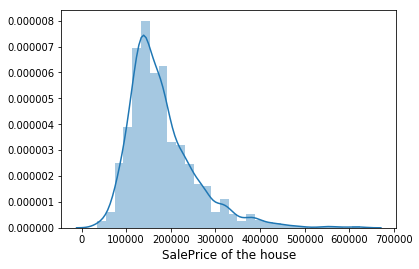

In [11]:
# 目标y（房屋价格）的直方图／分布
fig = plt.figure()
sns.distplot(data.SalePrice.values, bins=30, kde=True)
plt.xlabel('SalePrice of the house', fontsize=12)
plt.show()

可以看出，数据大多集中在均值（180151.234）附近，和正态分布比较接近。

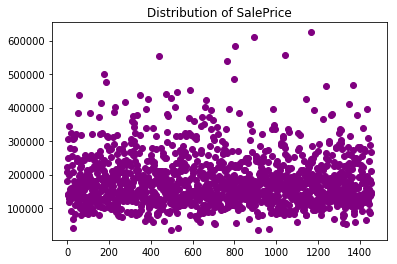

In [12]:
# 单个特征散点图
plt.scatter(range(data.shape[0]), data.SalePrice.values,color='purple')
plt.title("Distribution of SalePrice");

超过 600000 的样本只有 2 个，在模型训练时可以考虑将 y 大于 600000 的样本当成 outliers（离群点）去掉。

In [14]:
# 删除 SalePrice 大于 600000 的样本
data = data[data.SalePrice < 600000]

In [17]:
data.shape

(1454, 286)

## 输入属性的直方图／分布

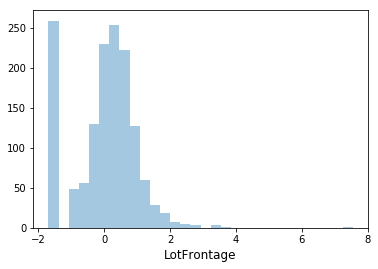

In [21]:
fig = plt.figure()
sns.distplot(data.LotFrontage.values, bins=30, kde=False)
plt.xlabel('LotFrontage', fontsize=12)
plt.show()

房屋到街道的直线距离（英尺），这是经过标准化的数据，可以看出近似正态分布。

''' 但是有很多样本集中在 -1.8，不知道这个数据该怎么处理。

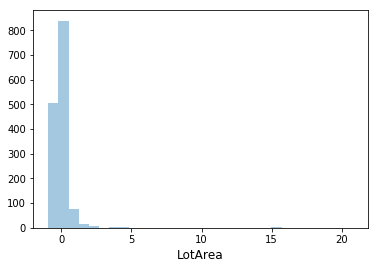

In [26]:
#土地的大小（平方英尺）
fig = plt.figure()
sns.distplot(data.LotArea.values, bins=30, kde=False)
plt.xlabel('LotArea', fontsize=12)
plt.show()

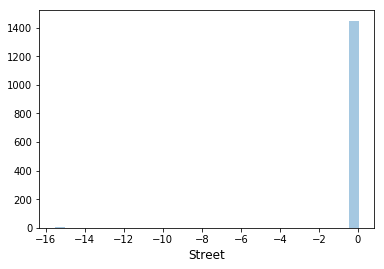

In [27]:
#所在道路的类型
fig = plt.figure()
sns.distplot(data.Street.values, bins=30, kde=False)
plt.xlabel('Street', fontsize=12)
plt.show()

可以看出，几乎所有数据都集中在 0 附近，只有极少数在 -15.5 附近。

这个分布与房屋价格的正态分布差别很大，可以认为对房屋价格预测没有作业，在模型训练时，可以忽略不计。

In [28]:
#删除输入特征 Street 
data.drop(['Street'], inplace=True, axis=1)
data.shape

(1454, 285)

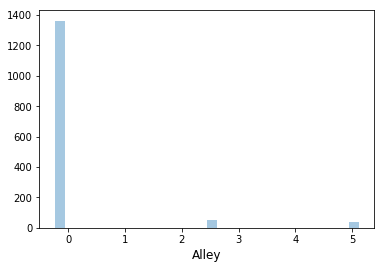

In [29]:
#所在巷通道的类型
fig = plt.figure()
sns.distplot(data.Alley.values, bins=30, kde=False)
plt.xlabel('Alley', fontsize=12)
plt.show()

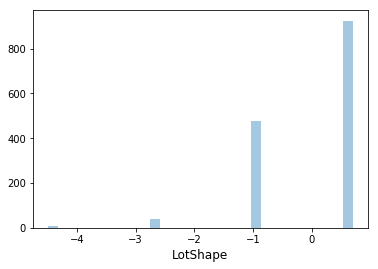

In [30]:
# 房地产形状
fig = plt.figure()
sns.distplot(data.LotShape.values, bins=30, kde=False)
plt.xlabel('LotShape', fontsize=12)
plt.show()

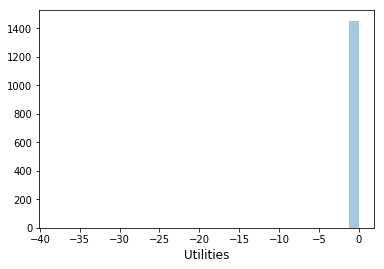

In [31]:
# 可用的工具
fig = plt.figure()
sns.distplot(data.Utilities.values, bins=30, kde=False)
plt.xlabel('Utilities', fontsize=12)
plt.show()

In [32]:
data.Utilities.describe()

count   1454.000
mean      -0.000
std        1.001
min      -38.144
25%        0.026
50%        0.026
75%        0.026
max        0.026
Name: Utilities, dtype: float64

只有一个是 -38.144 可以认为是离群点，所有的都集中在 0 可以认为对房价预测没有作用。

在模型训练时，去掉。

In [33]:
#删除输入特征 Utilities 
data.drop(['Utilities'], inplace=True, axis=1)
data.shape

(1454, 284)

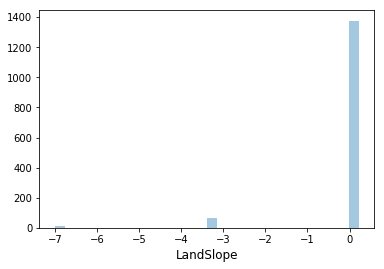

In [34]:
# 财产的斜度
fig = plt.figure()
sns.distplot(data.LandSlope.values, bins=30, kde=False)
plt.xlabel('LandSlope', fontsize=12)
plt.show()

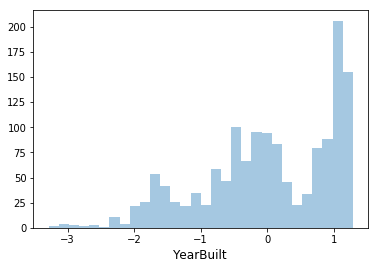

In [35]:
# 最初建造日期
fig = plt.figure()
sns.distplot(data.YearBuilt.values, bins=30, kde=False)
plt.xlabel('YearBuilt', fontsize=12)
plt.show()

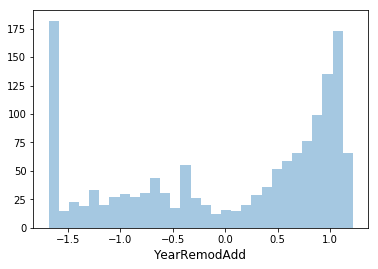

In [36]:
# 重建日期
fig = plt.figure()
sns.distplot(data.YearRemodAdd.values, bins=30, kde=False)
plt.xlabel('YearRemodAdd', fontsize=12)
plt.show()

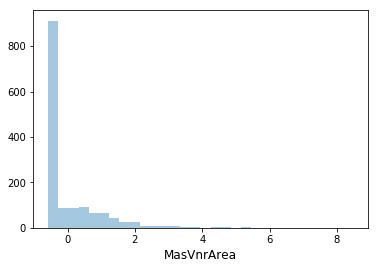

In [37]:
# 表层砌体面积（square feet）
fig = plt.figure()
sns.distplot(data.MasVnrArea.values, bins=30, kde=False)
plt.xlabel('MasVnrArea', fontsize=12)
plt.show()

这是看上去，近似长尾分布。对长尾分布我还不太了解。

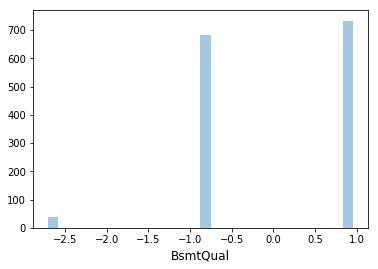

In [38]:
# 地下室高度
fig = plt.figure()
sns.distplot(data.BsmtQual.values, bins=30, kde=False)
plt.xlabel('BsmtQual', fontsize=12)
plt.show()

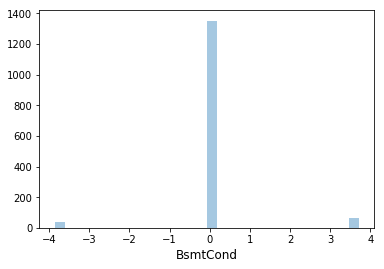

In [39]:
# 地下室的总体状况
fig = plt.figure()
sns.distplot(data.BsmtCond.values, bins=30, kde=False)
plt.xlabel('BsmtCond', fontsize=12)
plt.show()

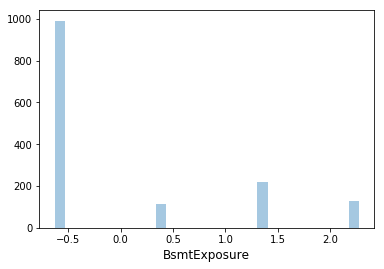

In [40]:
# Walkout 或花园层地下室的墙壁
fig = plt.figure()
sns.distplot(data.BsmtExposure.values, bins=30, kde=False)
plt.xlabel('BsmtExposure', fontsize=12)
plt.show()

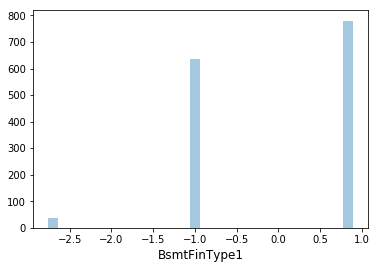

In [41]:
# 完成的地下室的质量
fig = plt.figure()
sns.distplot(data.BsmtFinType1.values, bins=30, kde=False)
plt.xlabel('BsmtFinType1', fontsize=12)
plt.show()

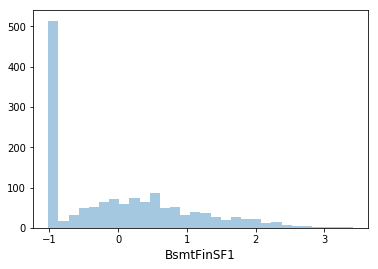

In [42]:
# 第一类型（Type 1）完成面积面积（square feet）
fig = plt.figure()
sns.distplot(data.BsmtFinSF1.values, bins=30, kde=False)
plt.xlabel('BsmtFinSF1', fontsize=12)
plt.show()

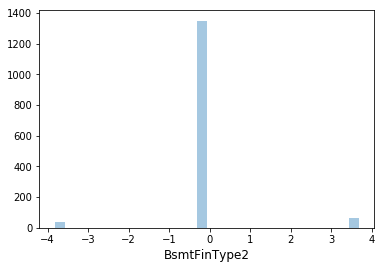

In [43]:
# 第二类型的质量(如果有)
fig = plt.figure()
sns.distplot(data.BsmtFinType2.values, bins=30, kde=False)
plt.xlabel('BsmtFinType2', fontsize=12)
plt.show()

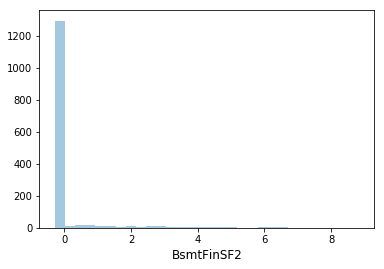

In [44]:
# Type 2 完成面积（square feet）
fig = plt.figure()
sns.distplot(data.BsmtFinSF2.values, bins=30, kde=False)
plt.xlabel('BsmtFinSF2', fontsize=12)
plt.show()

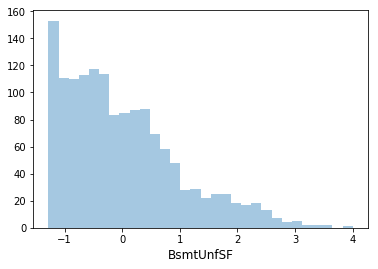

In [45]:
# 未完成的地下室总面积（square feet）
fig = plt.figure()
sns.distplot(data.BsmtUnfSF.values, bins=30, kde=False)
plt.xlabel('BsmtUnfSF', fontsize=12)
plt.show()

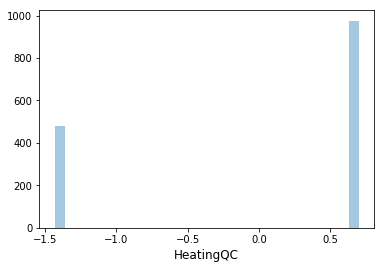

In [46]:
# 取暖质量和条件
fig = plt.figure()
sns.distplot(data.HeatingQC.values, bins=30, kde=False)
plt.xlabel('HeatingQC', fontsize=12)
plt.show()

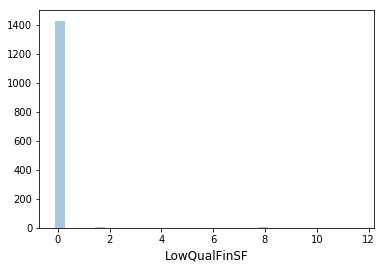

In [47]:
# 低质量完成的面积（square feet）（所有楼层）
fig = plt.figure()
sns.distplot(data.LowQualFinSF.values, bins=30, kde=False)
plt.xlabel('LowQualFinSF', fontsize=12)
plt.show()

In [48]:
#删除输入特征 LowQualFinSF 
data.drop(['LowQualFinSF'], inplace=True, axis=1)
data.shape

(1454, 283)

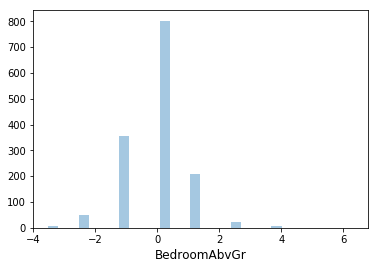

In [49]:
# 地下室之上的卧室数目
fig = plt.figure()
sns.distplot(data.BedroomAbvGr.values, bins=30, kde=False)
plt.xlabel('BedroomAbvGr', fontsize=12)
plt.show()

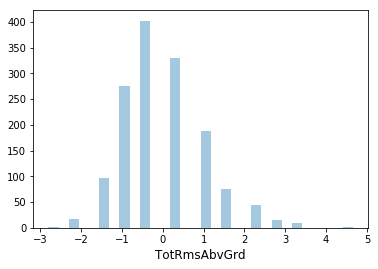

In [50]:
# 地上房间总数(不包括浴室)
fig = plt.figure()
sns.distplot(data.TotRmsAbvGrd.values, bins=30, kde=False)
plt.xlabel('TotRmsAbvGrd', fontsize=12)
plt.show()

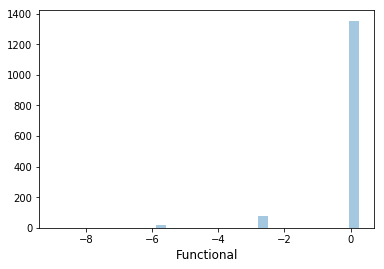

In [51]:
# 家庭功能评级
fig = plt.figure()
sns.distplot(data.Functional.values, bins=30, kde=False)
plt.xlabel('Functional', fontsize=12)
plt.show()

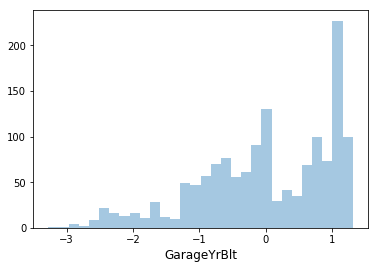

In [52]:
# 车库建造年份
fig = plt.figure()
sns.distplot(data.GarageYrBlt.values, bins=30, kde=False)
plt.xlabel('GarageYrBlt', fontsize=12)
plt.show()

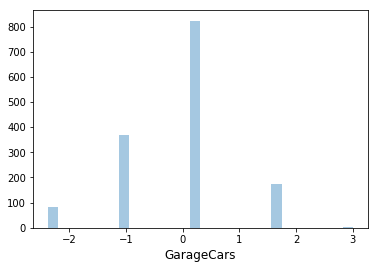

In [53]:
# 车库大小（能停的车辆数目）
fig = plt.figure()
sns.distplot(data.GarageCars.values, bins=30, kde=False)
plt.xlabel('GarageCars', fontsize=12)
plt.show()

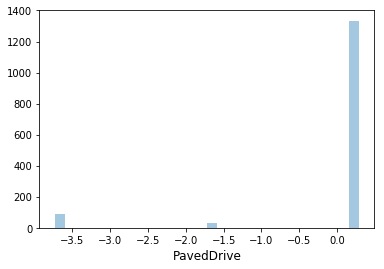

In [54]:
# 铺设的车道
fig = plt.figure()
sns.distplot(data.PavedDrive.values, bins=30, kde=False)
plt.xlabel('PavedDrive', fontsize=12)
plt.show()

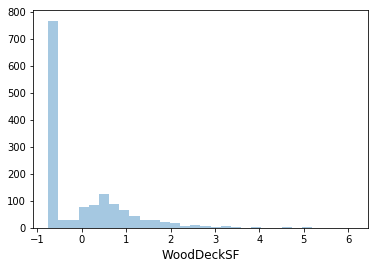

In [55]:
# 木头 deck 面积（square feet）
fig = plt.figure()
sns.distplot(data.WoodDeckSF.values, bins=30, kde=False)
plt.xlabel('WoodDeckSF', fontsize=12)
plt.show()

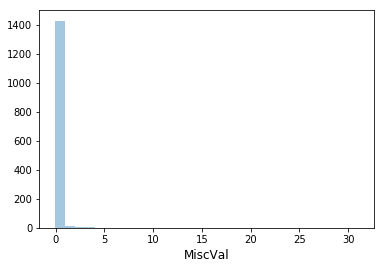

In [56]:
# 杂项功能价值（$）
fig = plt.figure()
sns.distplot(data.MiscVal.values, bins=30, kde=False)
plt.xlabel('MiscVal', fontsize=12)
plt.show()

In [57]:
#删除输入特征 MiscVal 
data.drop(['MiscVal'], inplace=True, axis=1)
data.shape

(1454, 282)

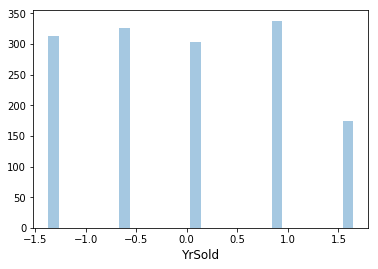

In [58]:
# 销售年份
fig = plt.figure()
sns.distplot(data.YrSold.values, bins=30, kde=False)
plt.xlabel('YrSold', fontsize=12)
plt.show()

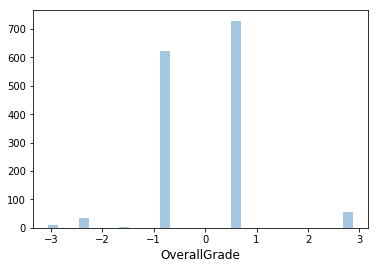

In [59]:
# 房屋总体品质
fig = plt.figure()
sns.distplot(data.OverallGrade.values, bins=30, kde=False)
plt.xlabel('OverallGrade', fontsize=12)
plt.show()

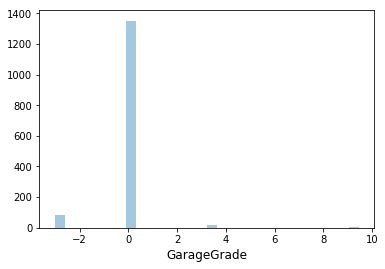

In [60]:
# 车库总体品质
fig = plt.figure()
sns.distplot(data.GarageGrade.values, bins=30, kde=False)
plt.xlabel('GarageGrade', fontsize=12)
plt.show()

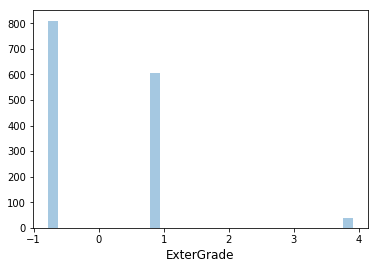

In [61]:
# Exter 总体品质
fig = plt.figure()
sns.distplot(data.ExterGrade.values, bins=30, kde=False)
plt.xlabel('ExterGrade', fontsize=12)
plt.show()

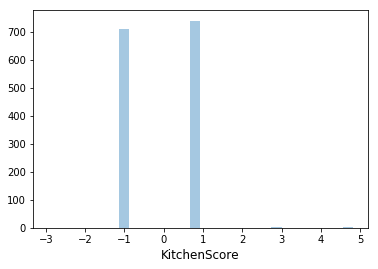

In [62]:
# 厨房总体评分
fig = plt.figure()
sns.distplot(data.KitchenScore.values, bins=30, kde=False)
plt.xlabel('KitchenScore', fontsize=12)
plt.show()

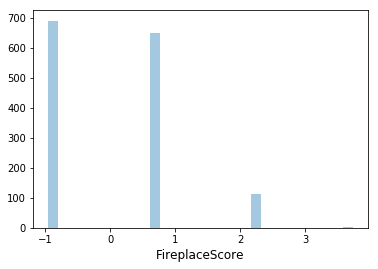

In [63]:
# 壁炉总体评分
fig = plt.figure()
sns.distplot(data.FireplaceScore.values, bins=30, kde=False)
plt.xlabel('FireplaceScore', fontsize=12)
plt.show()

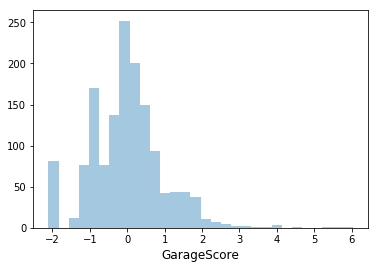

In [64]:
# 车库总体评分
fig = plt.figure()
sns.distplot(data.GarageScore.values, bins=30, kde=False)
plt.xlabel('GarageScore', fontsize=12)
plt.show()

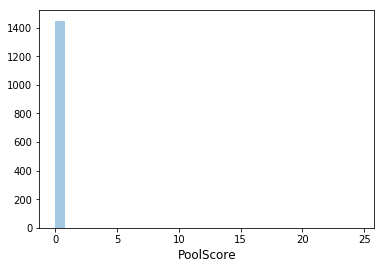

In [65]:
# 游泳池总体评分
fig = plt.figure()
sns.distplot(data.PoolScore.values, bins=30, kde=False)
plt.xlabel('PoolScore', fontsize=12)
plt.show()

In [66]:
#删除输入特征 PoolScore 
data.drop(['PoolScore'], inplace=True, axis=1)
data.shape

(1454, 281)

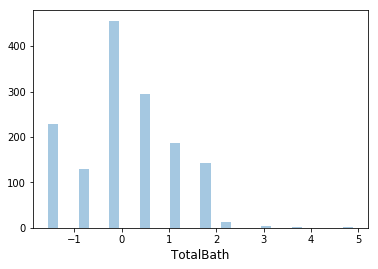

In [67]:
# TotalBath 总体评分
fig = plt.figure()
sns.distplot(data.TotalBath.values, bins=30, kde=False)
plt.xlabel('TotalBath', fontsize=12)
plt.show()

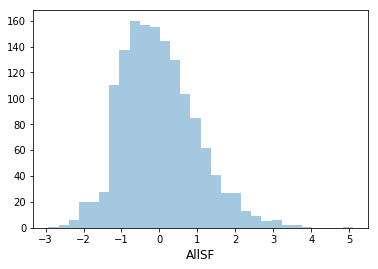

In [68]:
# AllSF 总体评分
fig = plt.figure()
sns.distplot(data.AllSF.values, bins=30, kde=False)
plt.xlabel('AllSF', fontsize=12)
plt.show()

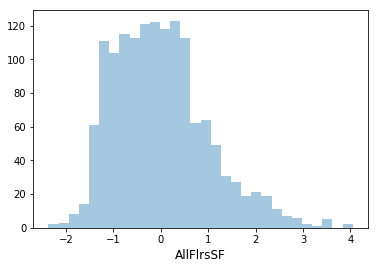

In [69]:
# AllFlrsSF 总体评分
fig = plt.figure()
sns.distplot(data.AllFlrsSF.values, bins=30, kde=False)
plt.xlabel('AllFlrsSF', fontsize=12)
plt.show()

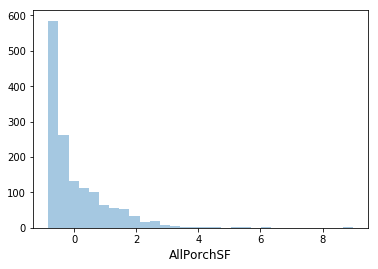

In [70]:
# AllPorchSF 总体评分
fig = plt.figure()
sns.distplot(data.AllPorchSF.values, bins=30, kde=False)
plt.xlabel('AllPorchSF', fontsize=12)
plt.show()

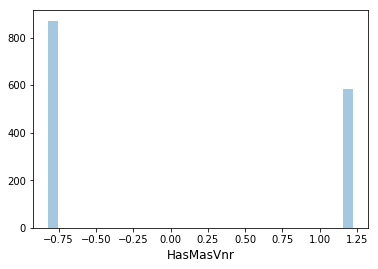

In [71]:
# 表层砌体（Masonry veneer）类型：有没有
fig = plt.figure()
sns.distplot(data.HasMasVnr.values, bins=30, kde=False)
plt.xlabel('HasMasVnr', fontsize=12)
plt.show()

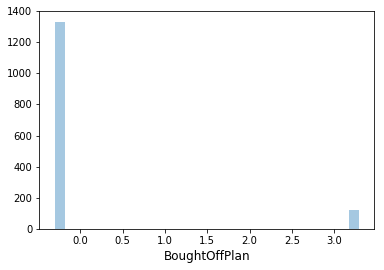

In [72]:
# 销售条件：有没有
fig = plt.figure()
sns.distplot(data.BoughtOffPlan.values, bins=30, kde=False)
plt.xlabel('BoughtOffPlan', fontsize=12)
plt.show()

## 两两特征之间的相关性

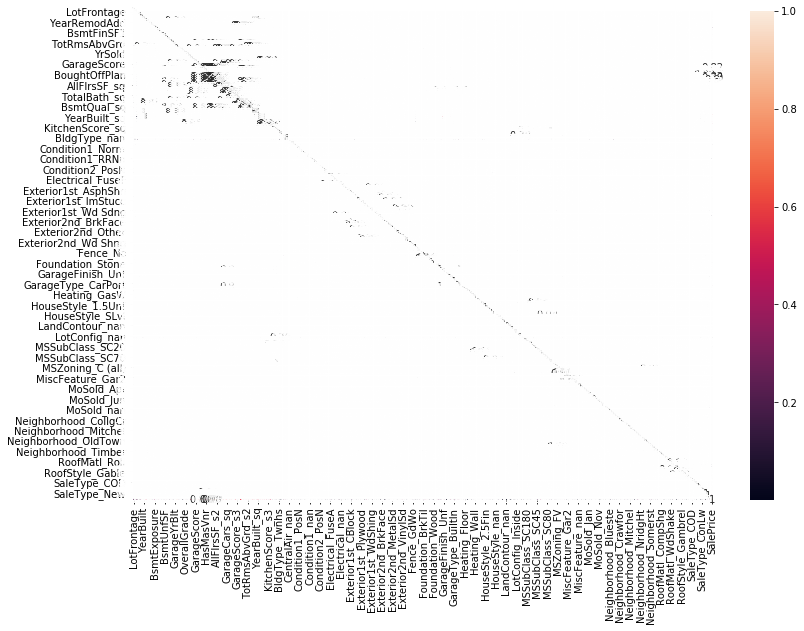

In [79]:
#get the names of all the columns
cols=data.columns 

# Calculates pearson co-efficient for all combinations，通常认为相关系数大于0.5的为强相关
data_corr = data.corr().abs()

plt.subplots(figsize=(13, 9))
sns.heatmap(data_corr,annot=True)

# Mask unimportant features
sns.heatmap(data_corr, mask=data_corr < 1, cbar=False)

plt.savefig(dpath + 'house_coor.png' )
plt.show()

特征太多 281 个，输出的关系图看不清，但是左上角比较密集，说明前面的特征和房价关系密切。

In [75]:
#Set the threshold to select only highly correlated attributes
threshold = 0.5
# List of pairs along with correlation above threshold
corr_list = []
size = data.shape[1]

#Search for the highly correlated pairs
for i in range(0, size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

YearRemodAdd and YearRemodAdd_sq = 1.00
YearRemodAdd_s2 and YearRemodAdd_s3 = 1.00
YearRemodAdd and YearRemodAdd_s2 = 1.00
YearBuilt and YearBuilt_sq = 1.00
YearRemodAdd_s2 and YearRemodAdd_sq = 1.00
YearRemodAdd and YearRemodAdd_s3 = 1.00
YearBuilt_s2 and YearBuilt_s3 = 1.00
YearBuilt and YearBuilt_s2 = 1.00
YearRemodAdd_s3 and YearRemodAdd_sq = 1.00
YearBuilt_s2 and YearBuilt_sq = 1.00
YearBuilt and YearBuilt_s3 = 1.00
YearBuilt_s3 and YearBuilt_sq = 1.00
BsmtQual_s2 and BsmtQual_s3 = 1.00
KitchenScore and KitchenScore_sq = 1.00
TotRmsAbvGrd and TotRmsAbvGrd_sq = 1.00
AllFlrsSF and AllFlrsSF_sq = 0.99
TotalBath and TotalBath_sq = 0.99
AllSF and AllSF_sq = 0.99
BoughtOffPlan and SaleType_New = 0.99
TotRmsAbvGrd_s2 and TotRmsAbvGrd_s3 = 0.99
KitchenScore and KitchenScore_s2 = 0.99
TotRmsAbvGrd and TotRmsAbvGrd_s2 = 0.98
BldgType_2fmCon and MSSubClass_SC190 = 0.98
BsmtQual and BsmtQual_s2 = 0.98
AllFlrsSF_s2 and AllFlrsSF_s3 = 0.98
AllSF_s2 and AllSF_s3 = 0.98
AllFlrsSF and AllFlrsSF_s2

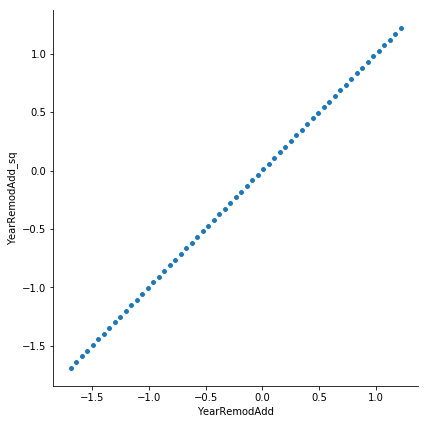

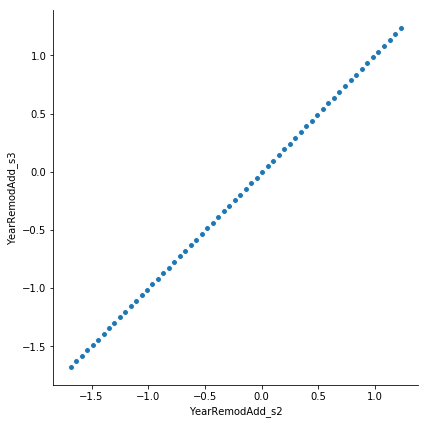

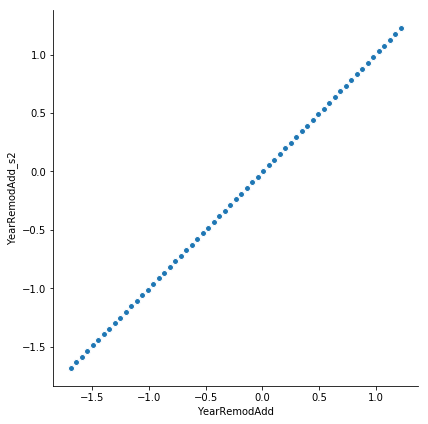

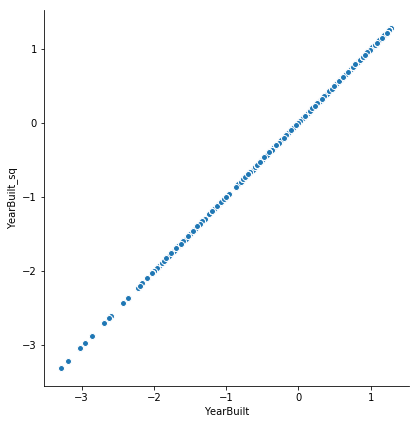

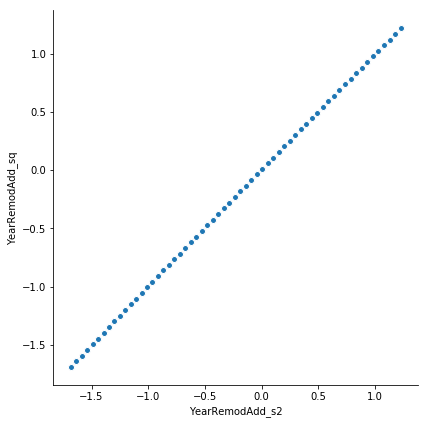

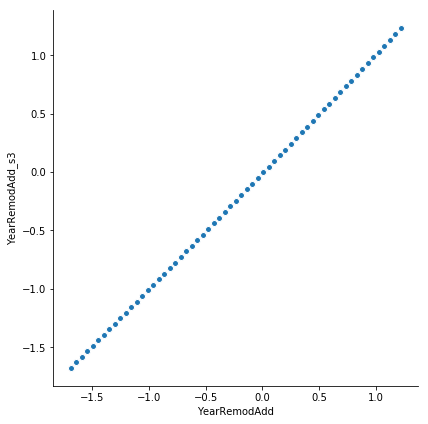

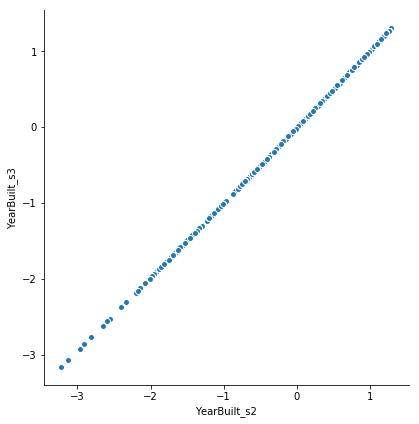

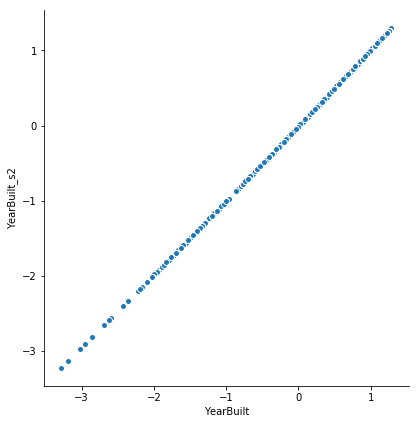

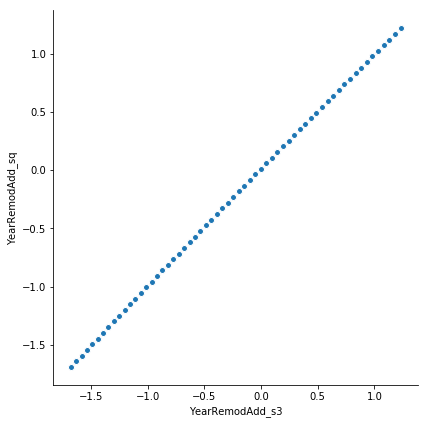

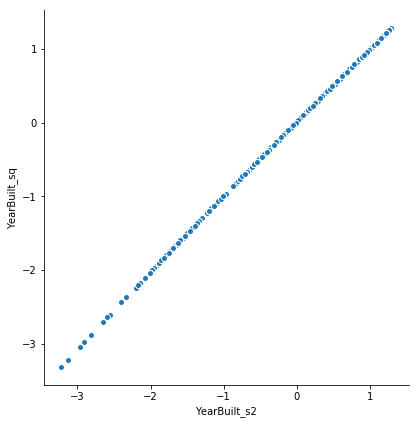

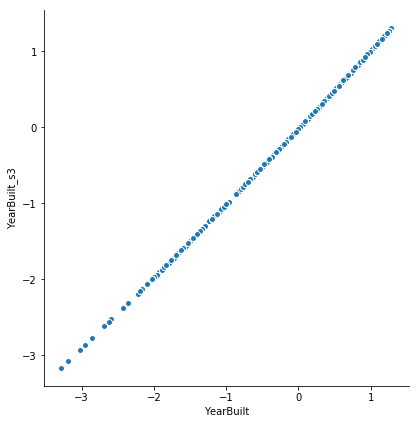

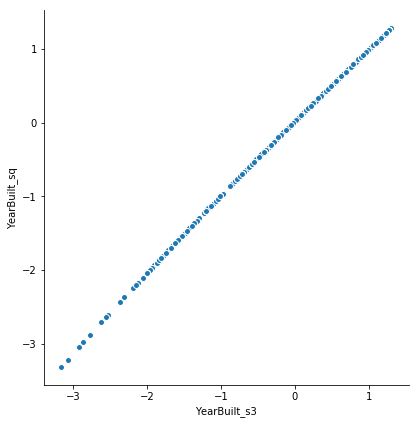

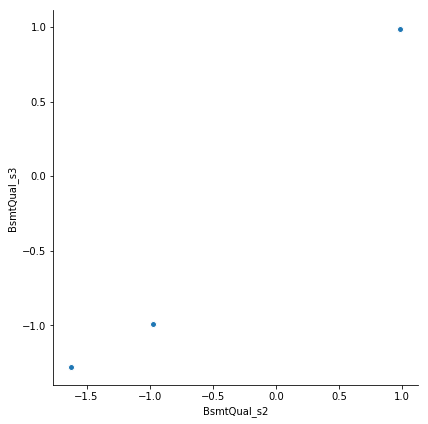

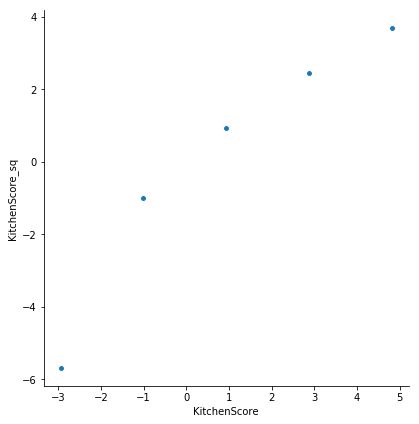

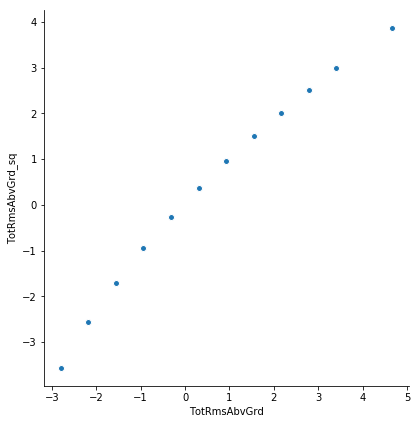

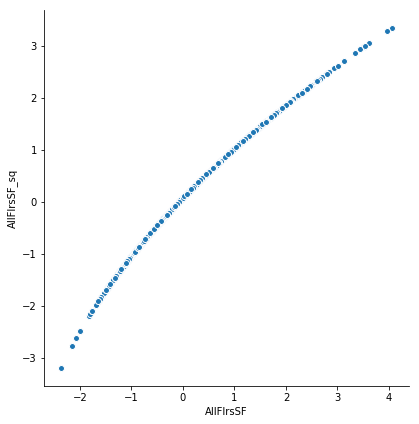

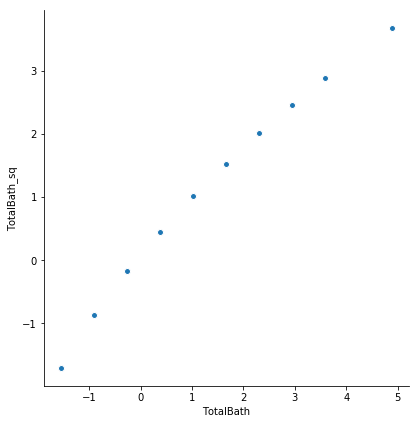

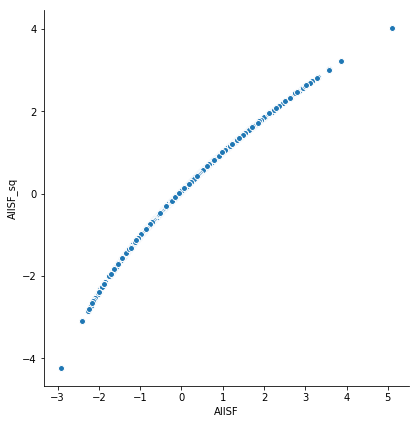

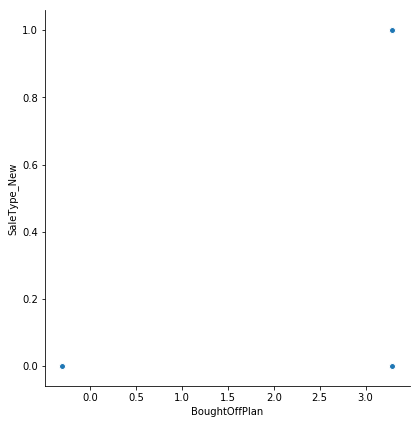

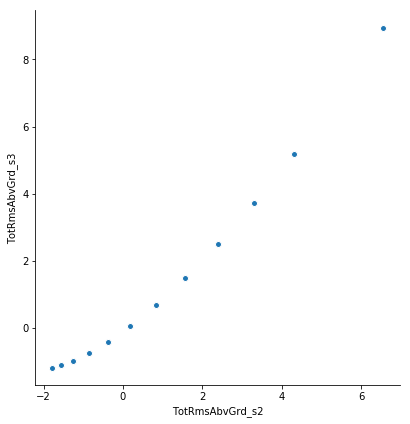

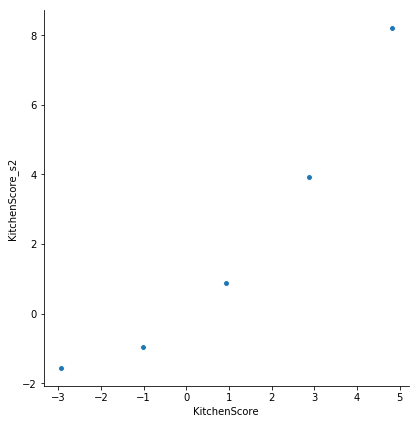

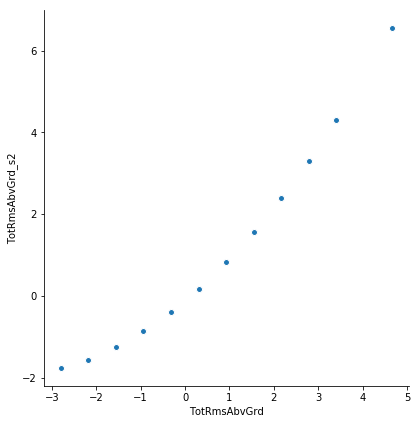

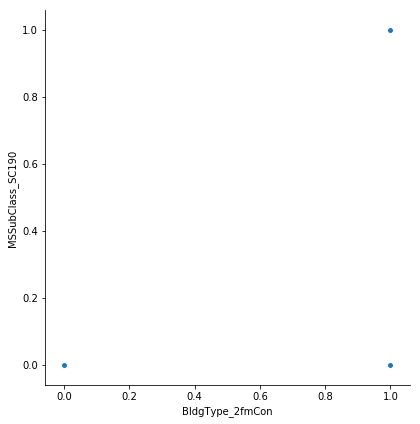

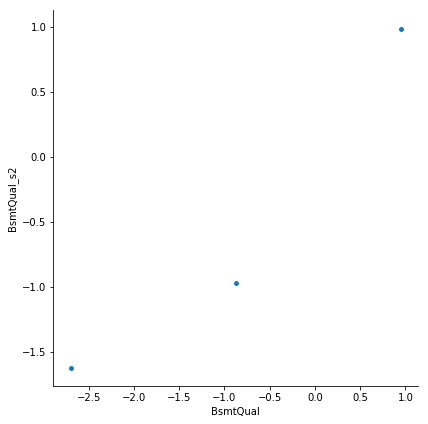

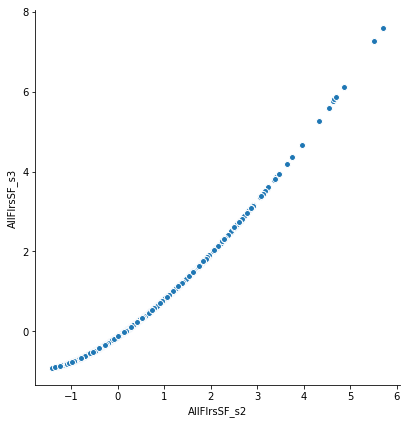

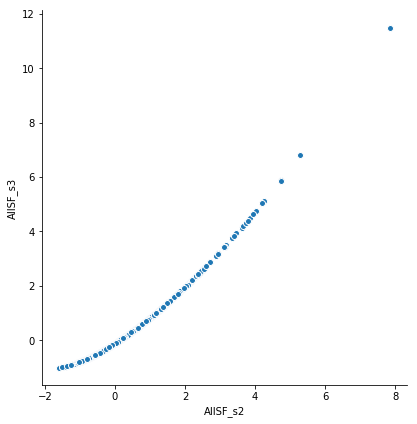

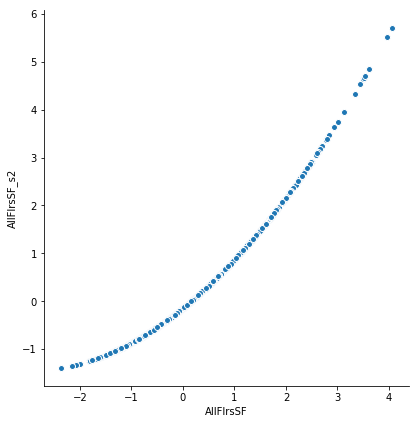

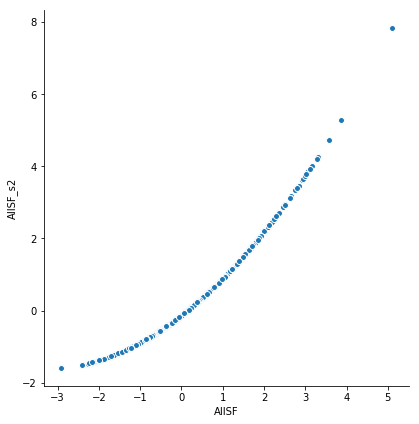

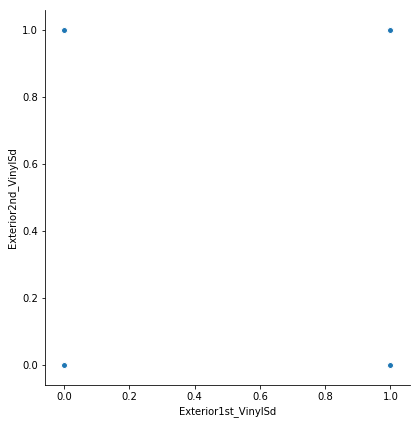

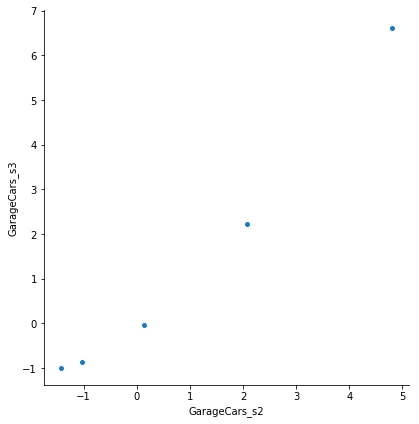

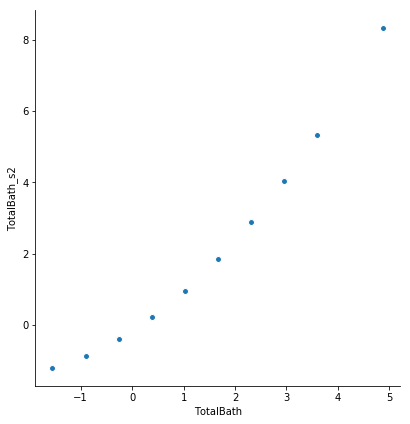

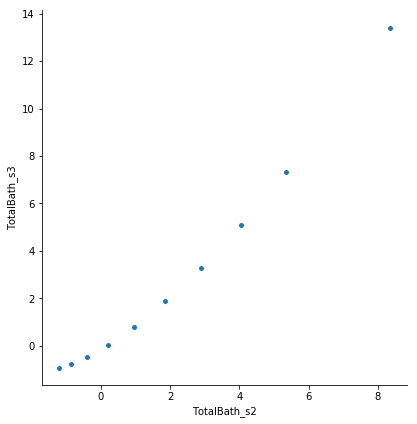

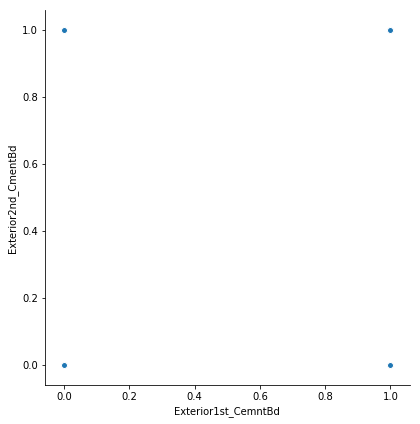

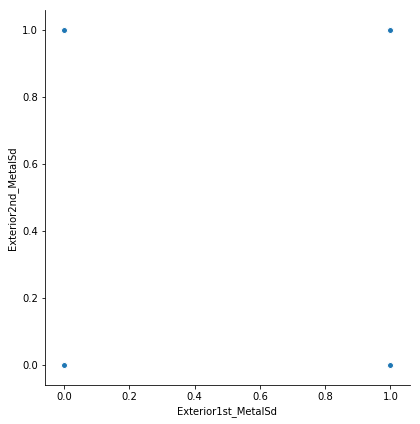

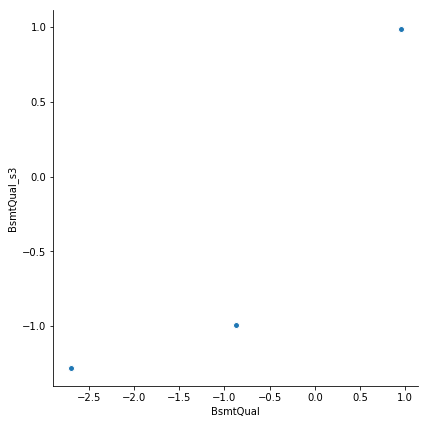

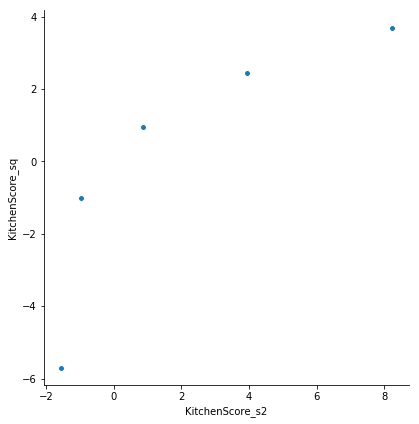

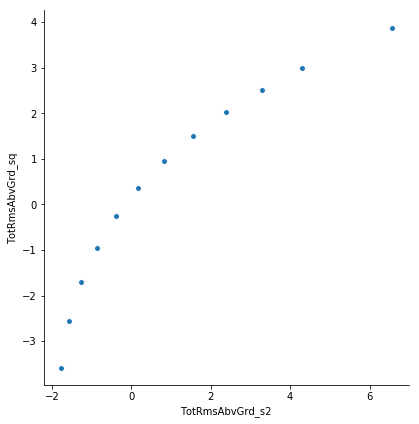

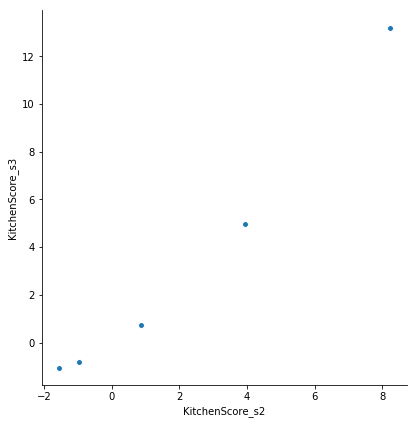

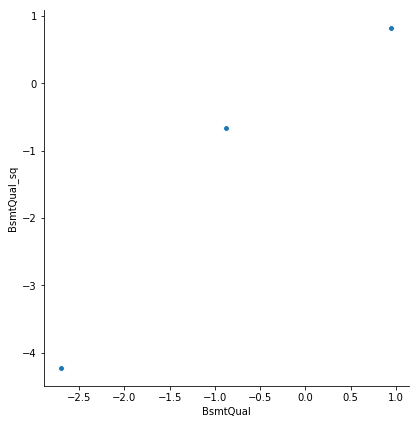

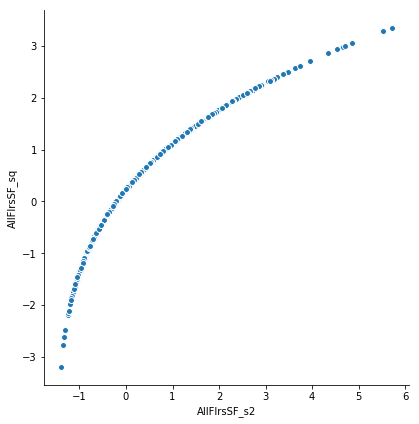

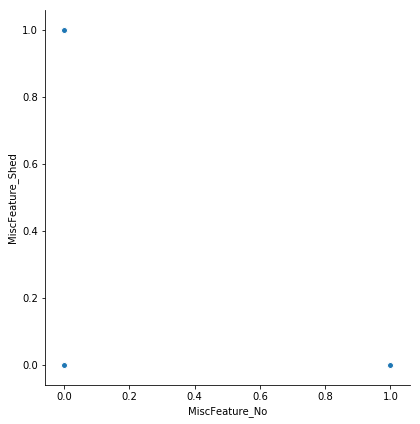

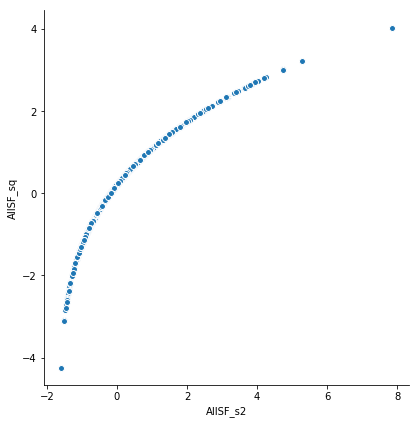

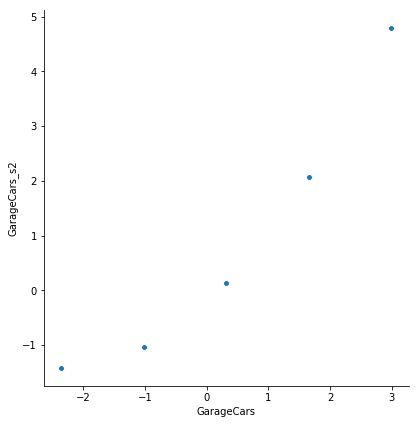

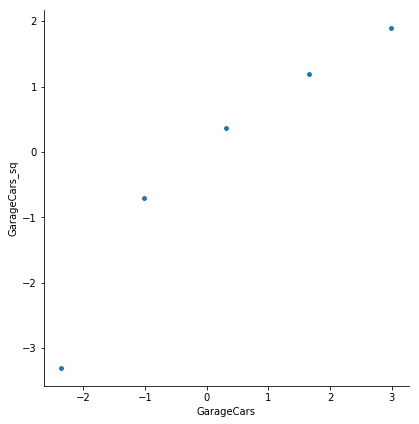

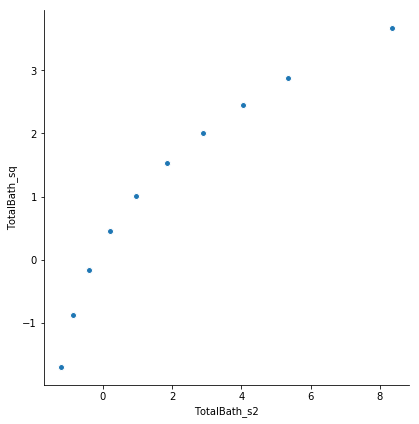

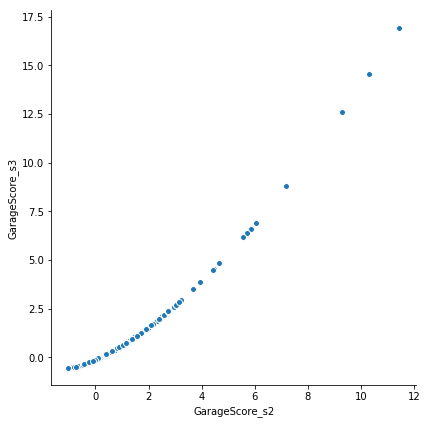

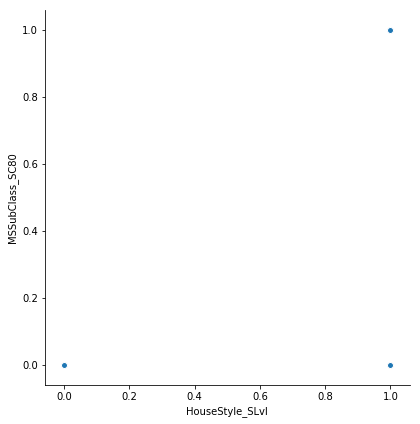

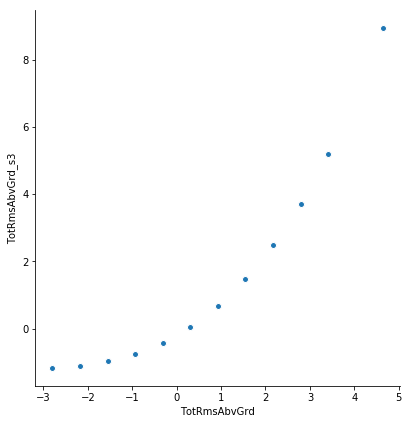

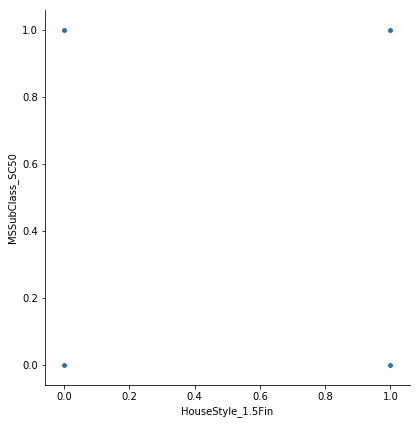

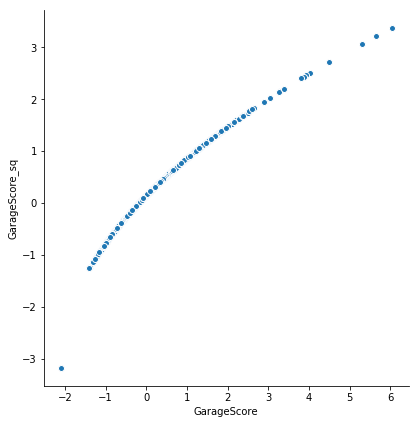

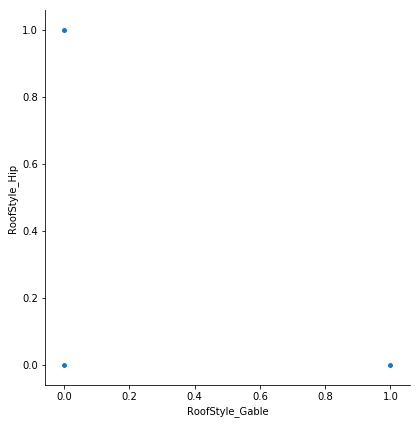

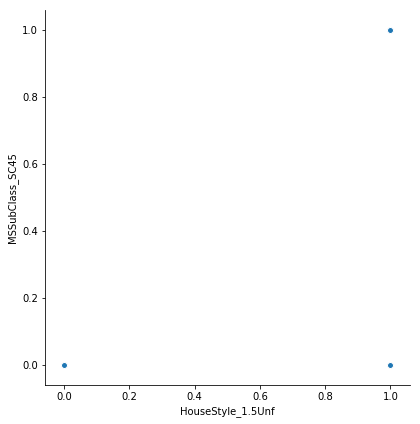

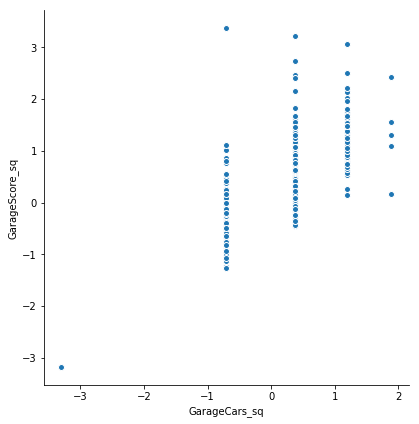

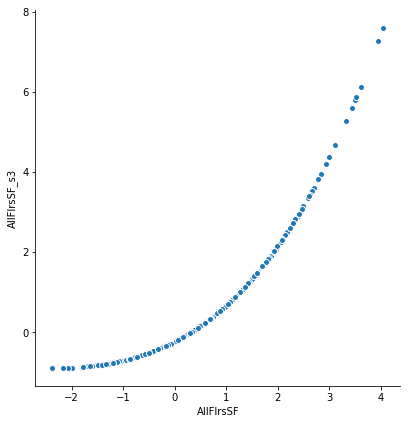

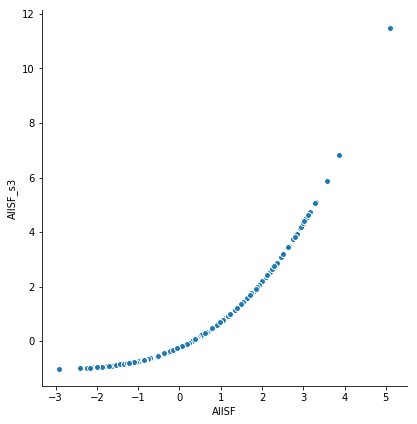

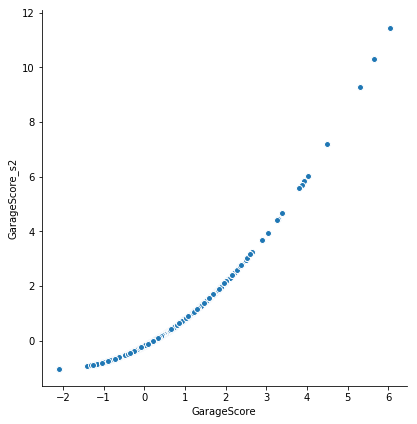

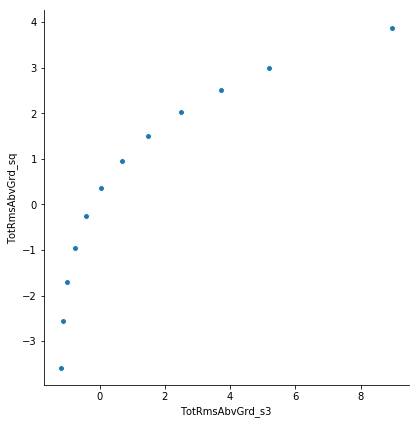

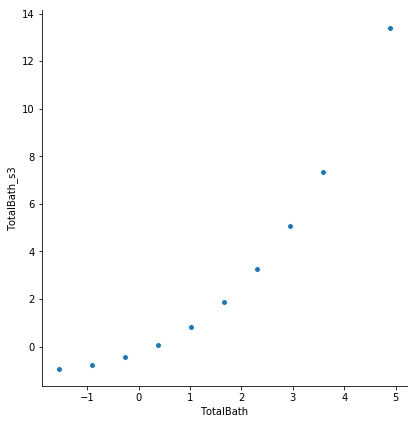

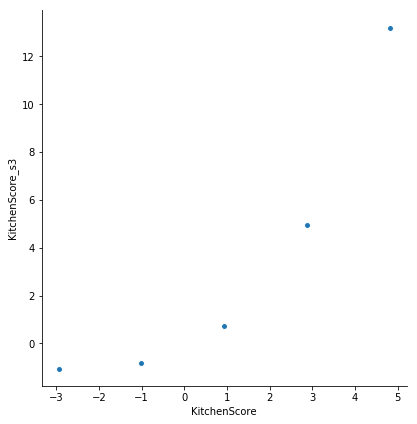

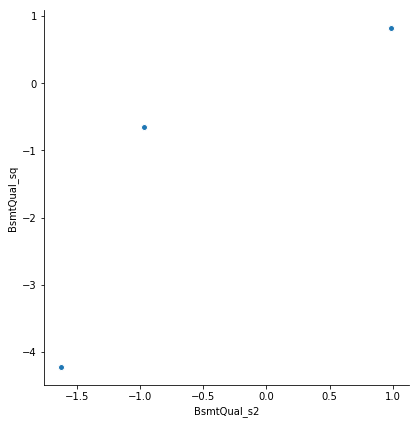

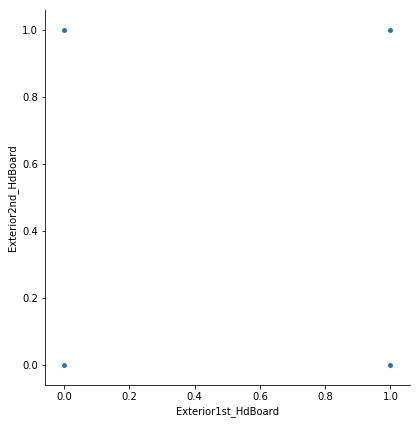

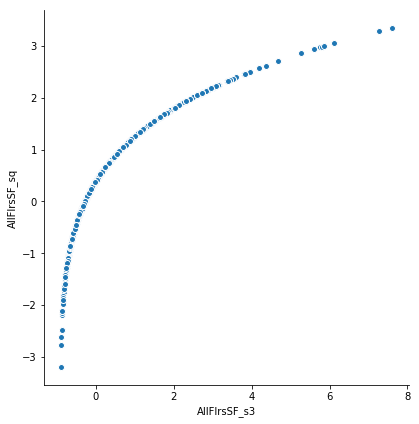

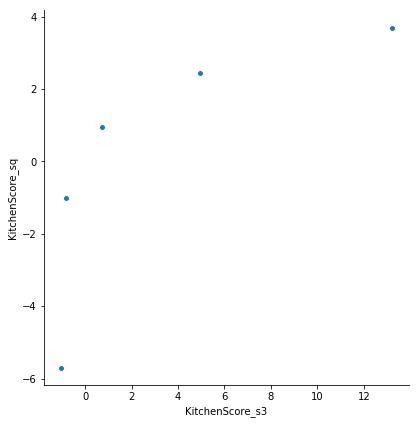

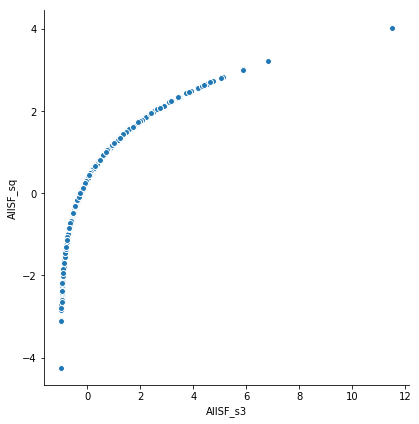

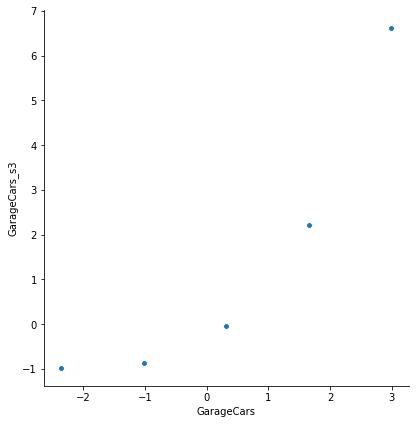

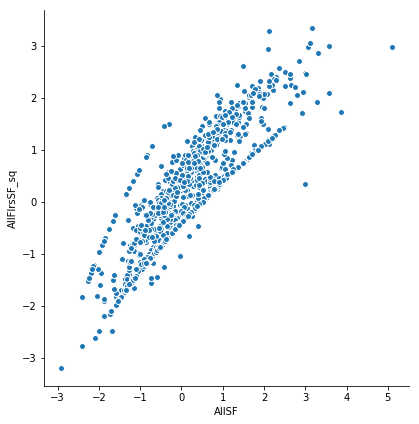

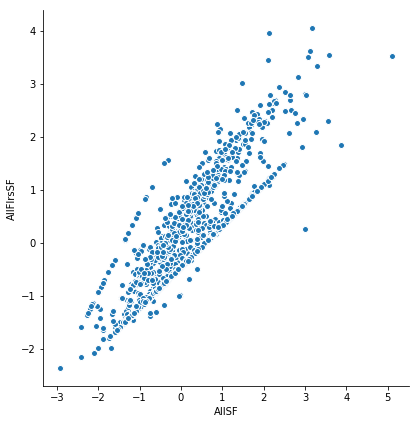

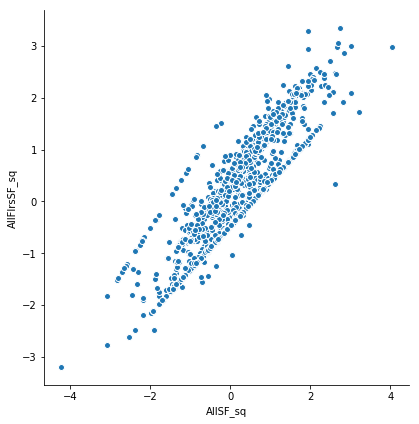

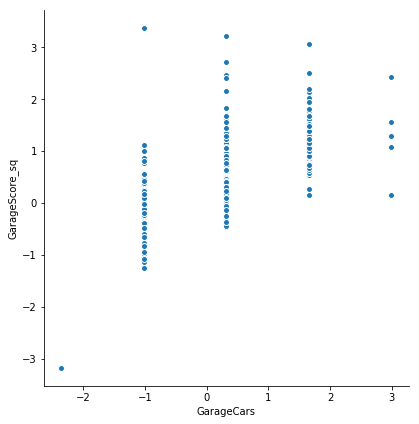

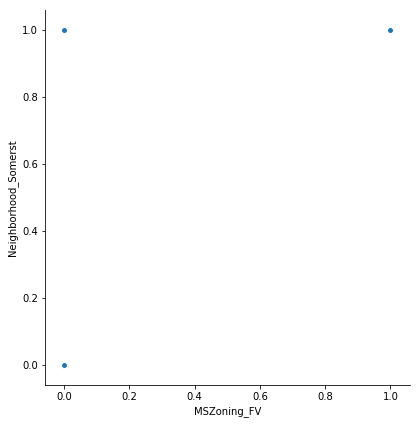

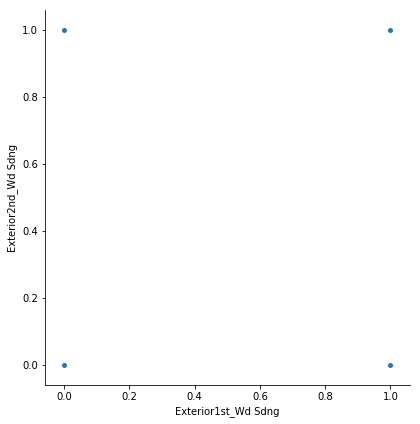

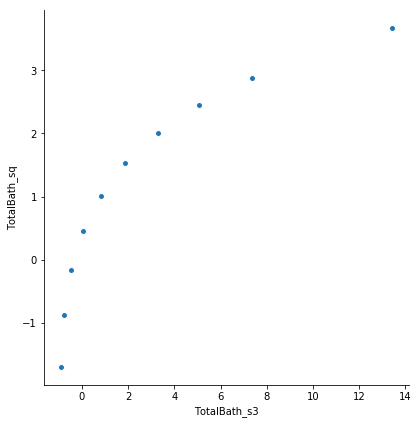

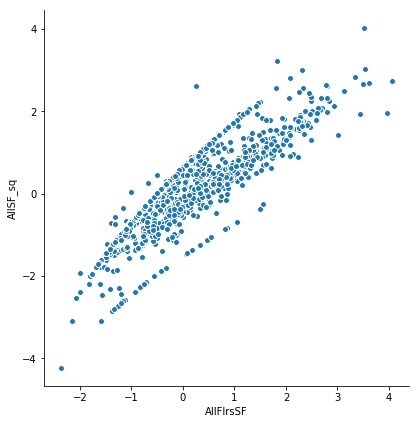

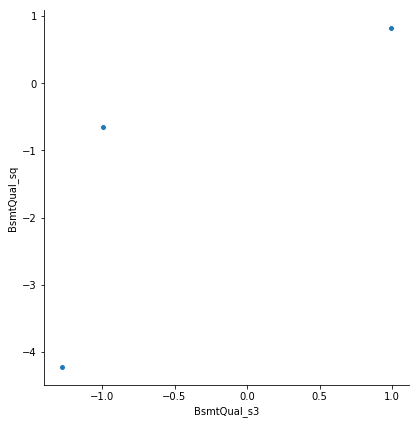

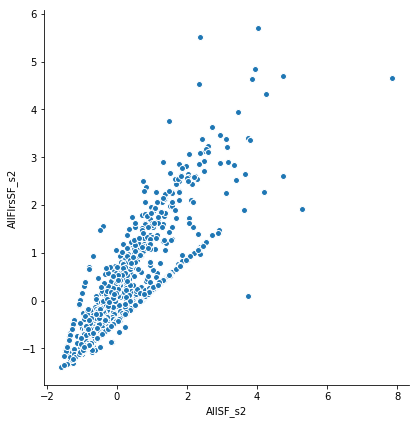

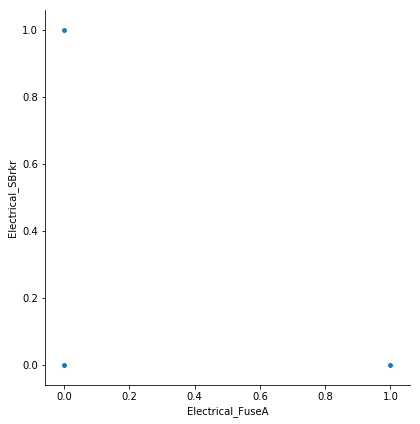

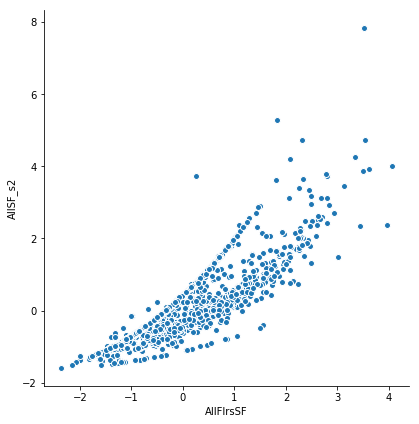

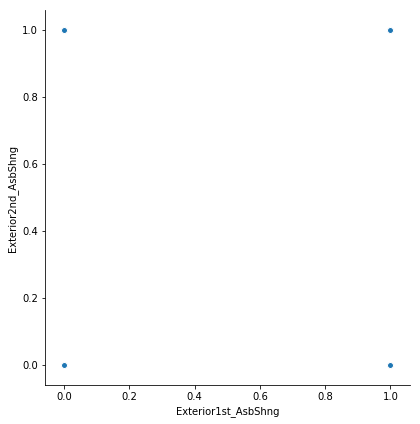

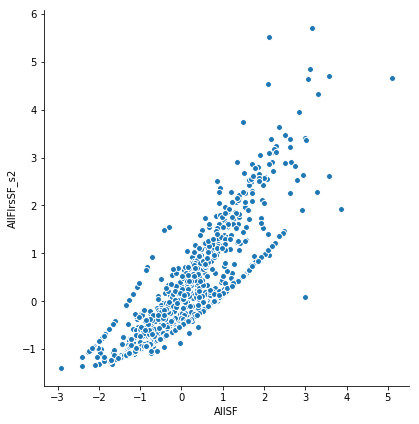

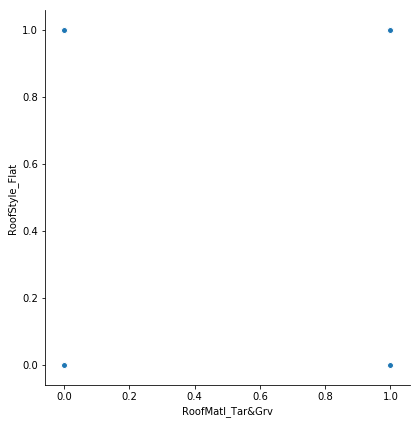

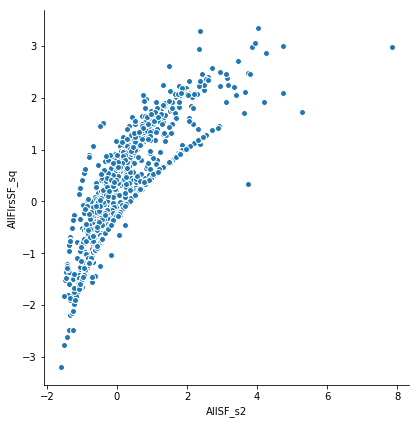

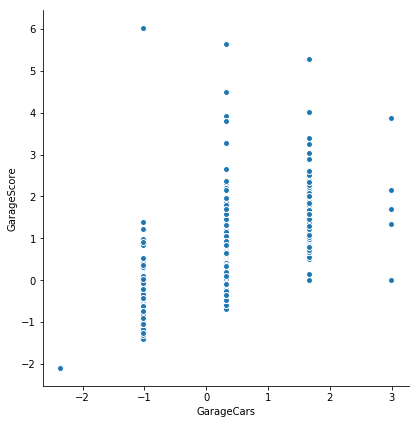

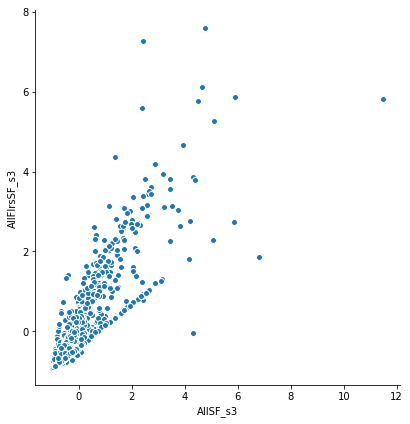

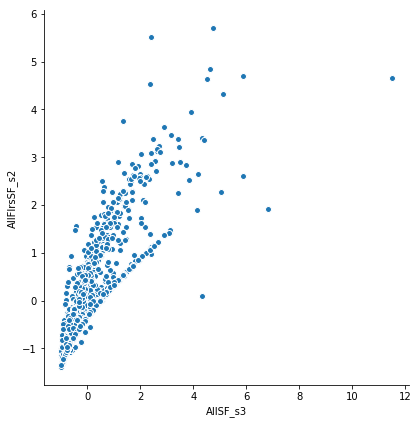

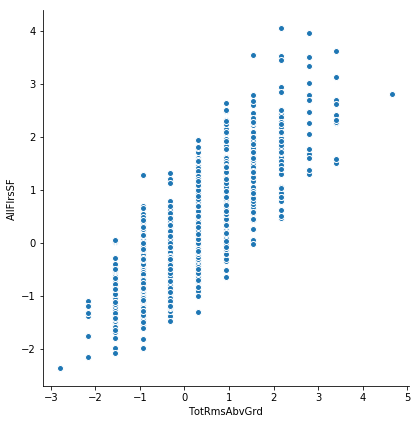

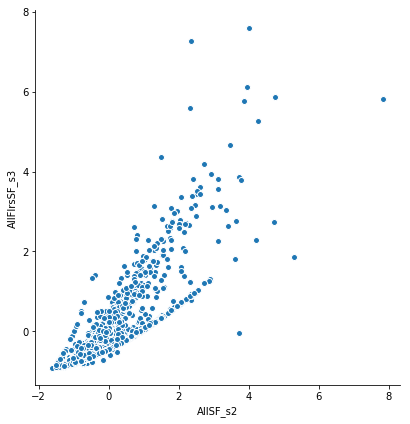

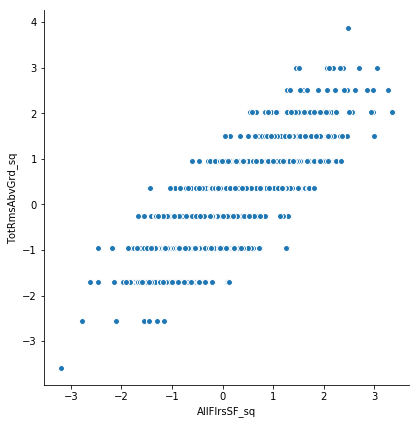

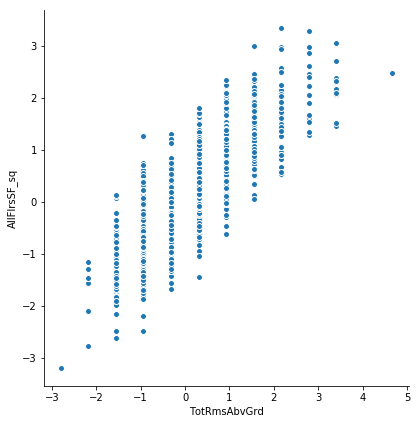

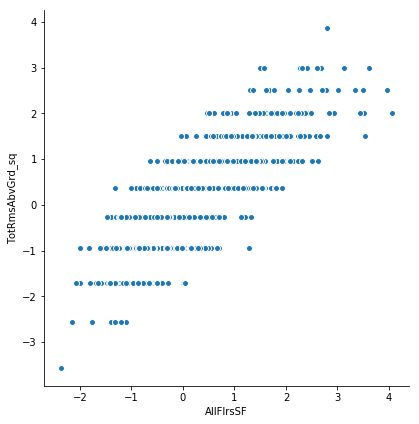

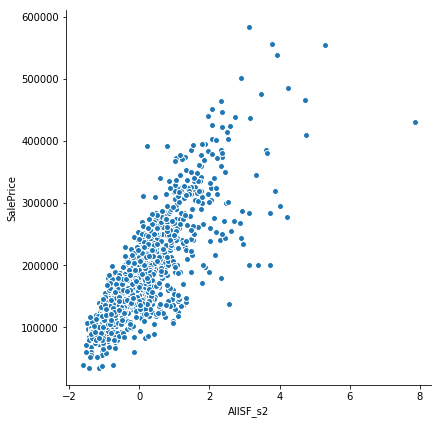

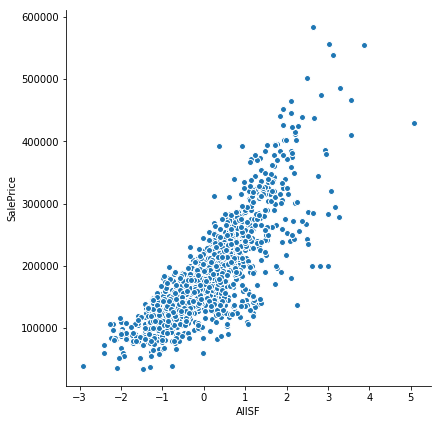

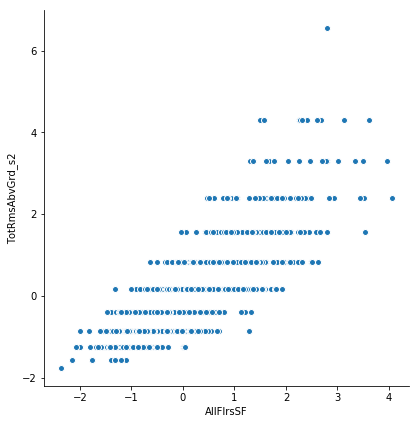

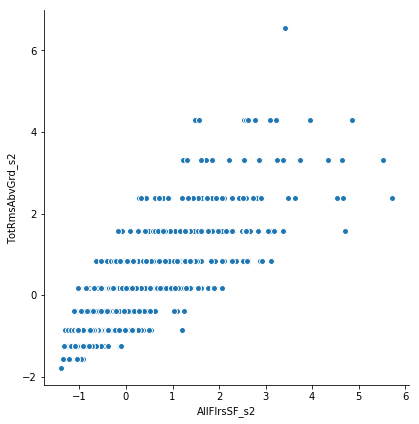

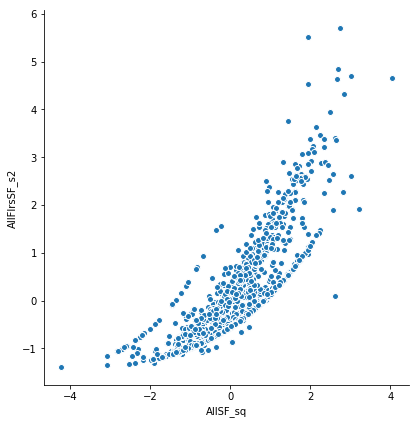

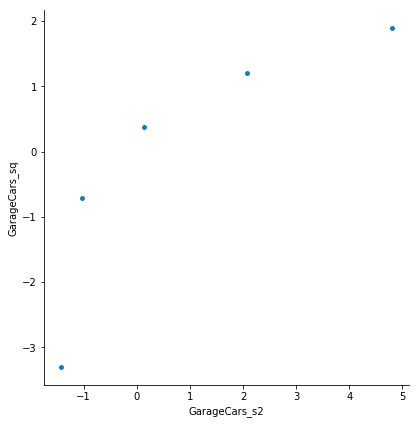

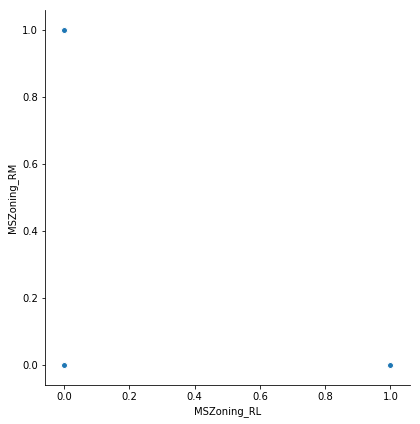

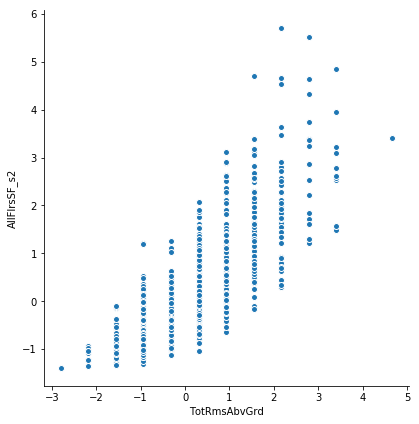

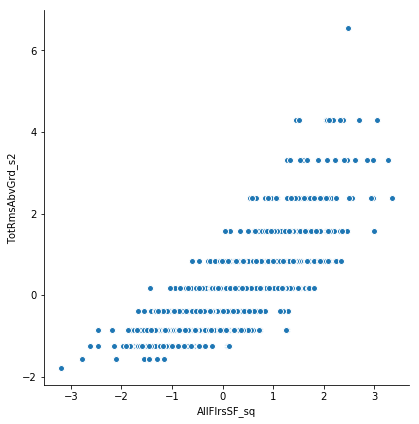

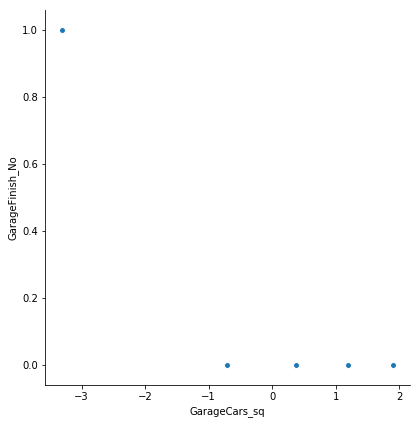

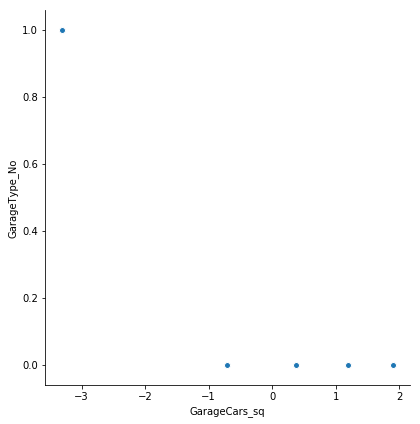

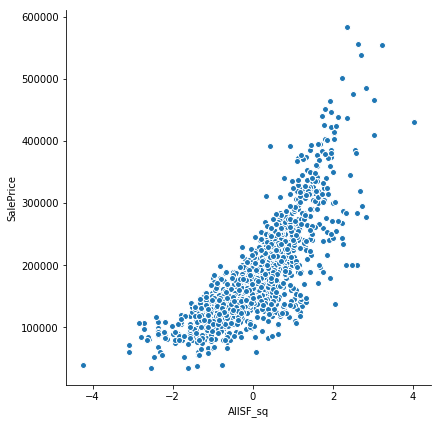

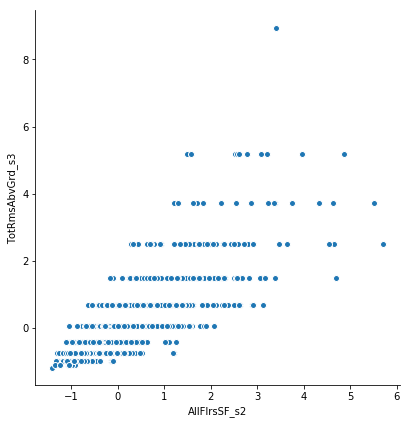

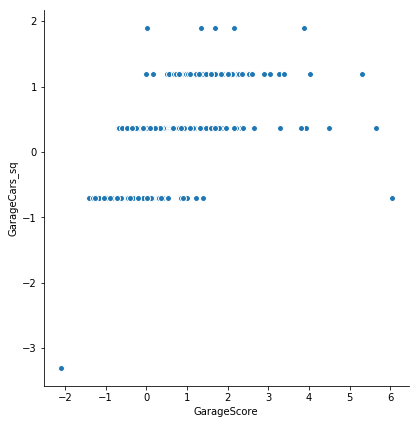

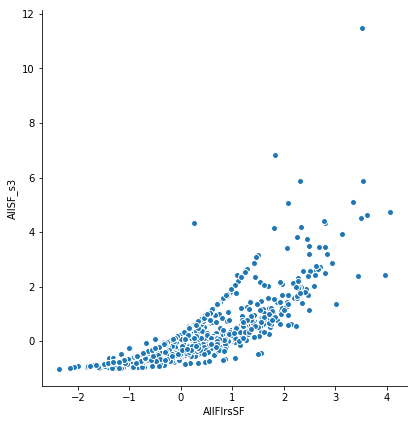

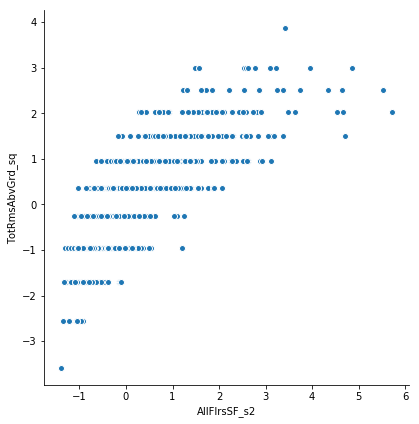

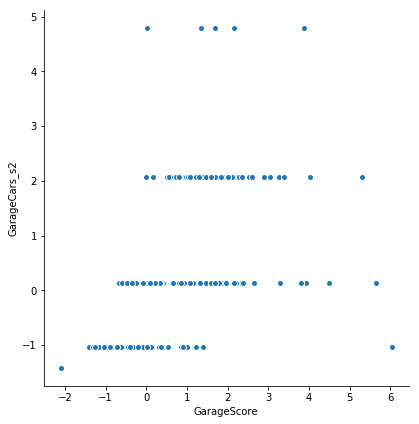

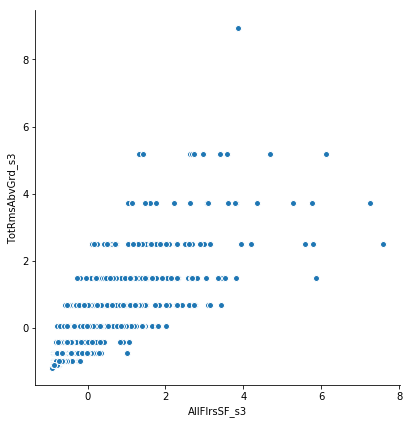

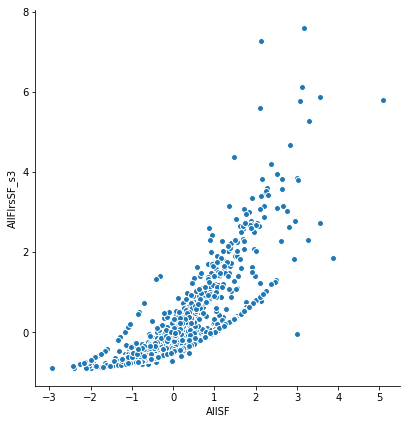

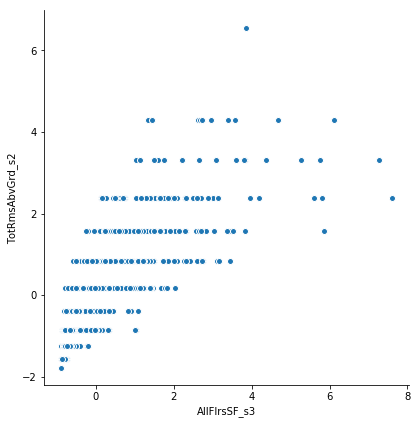

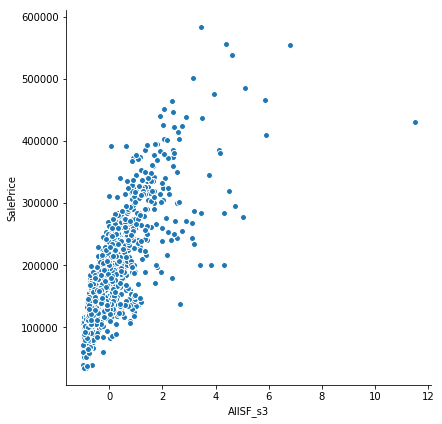

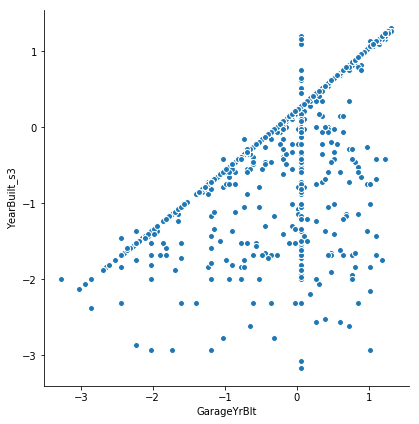

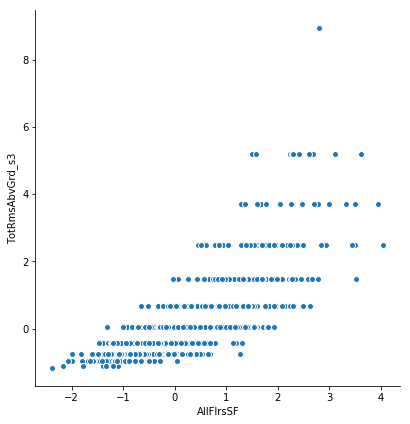

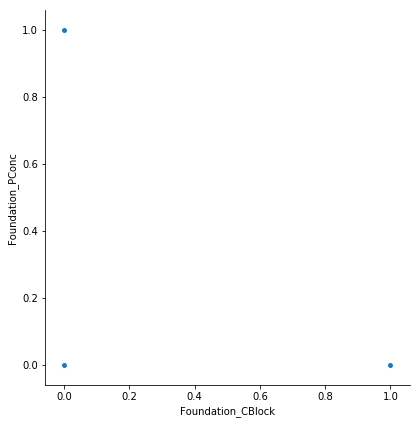

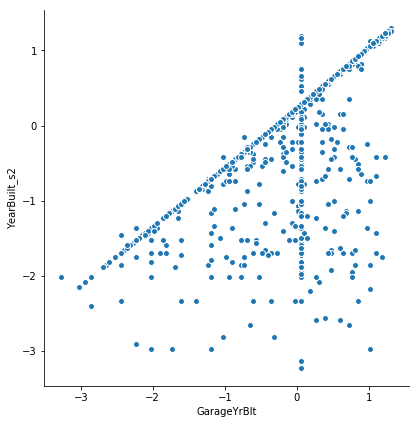

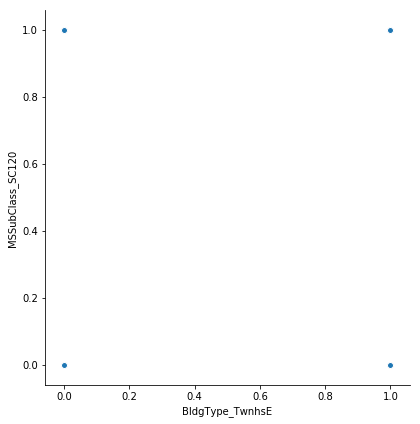

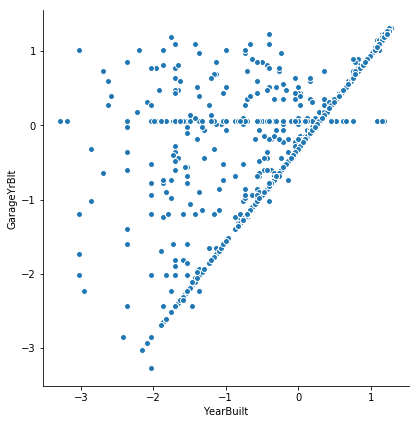

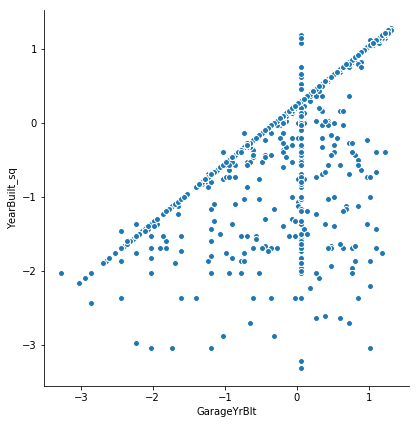

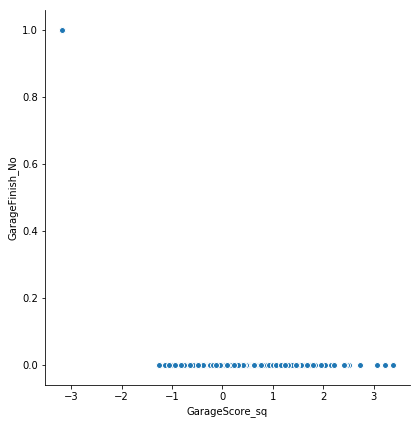

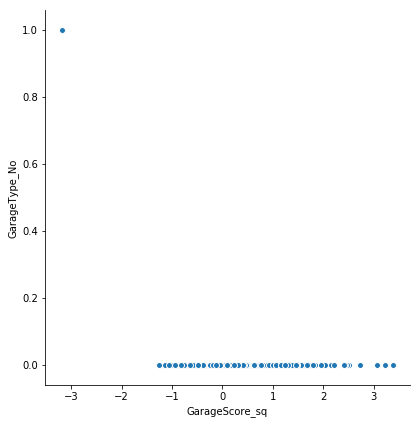

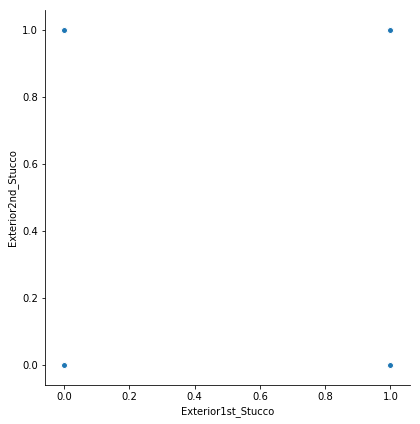

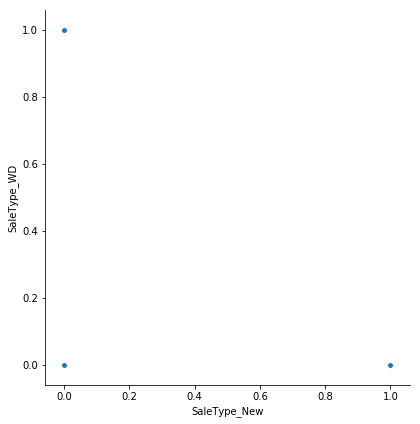

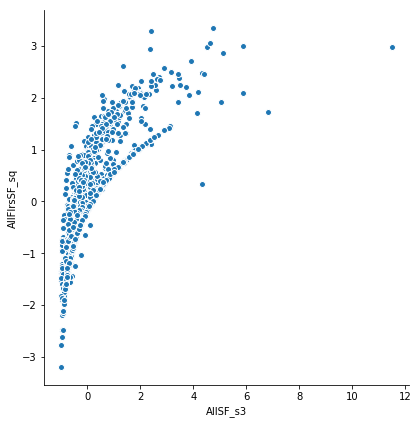

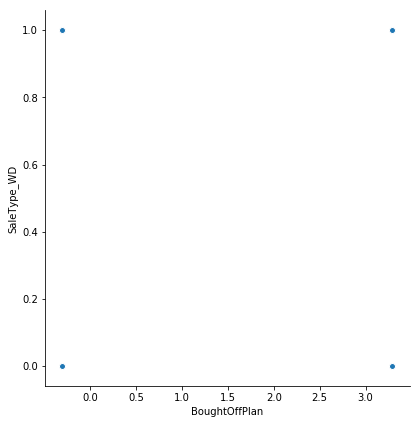

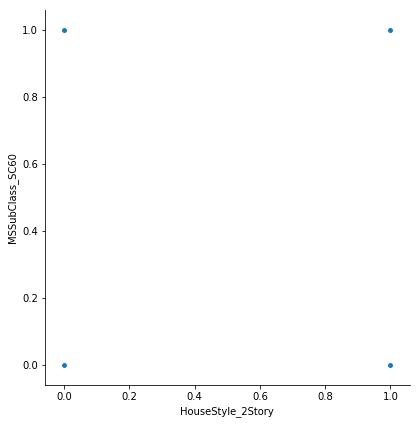

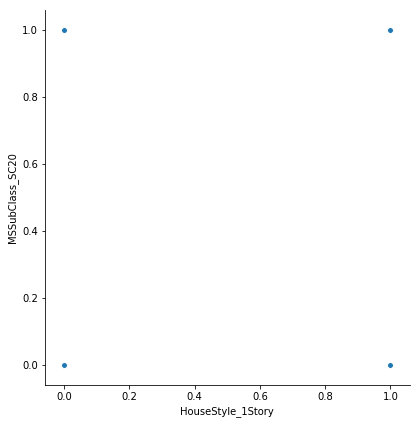

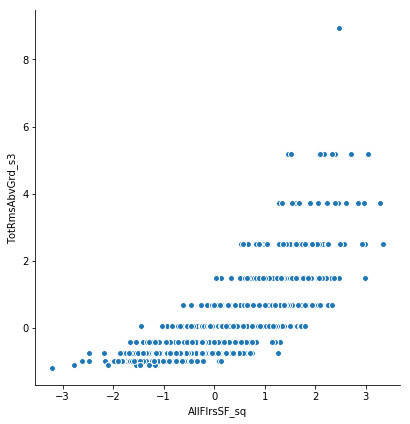

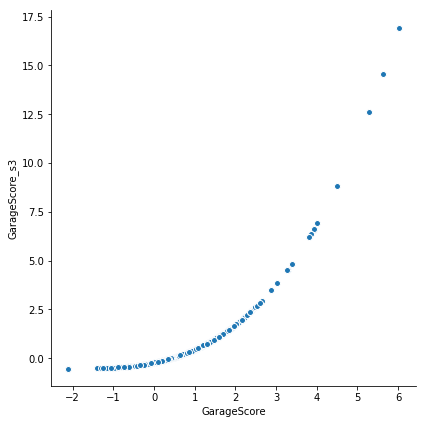

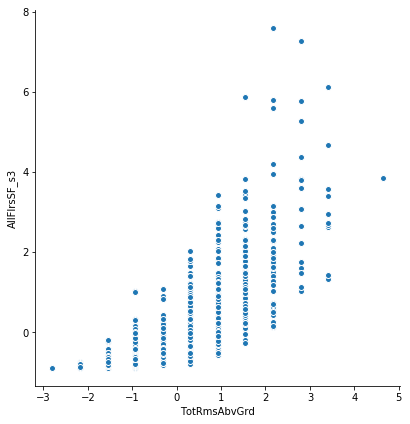

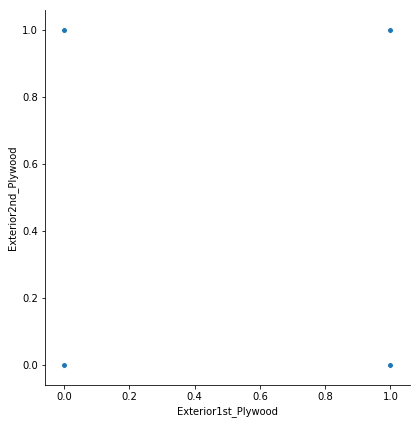

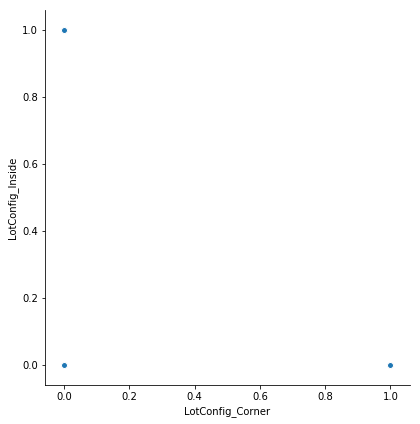

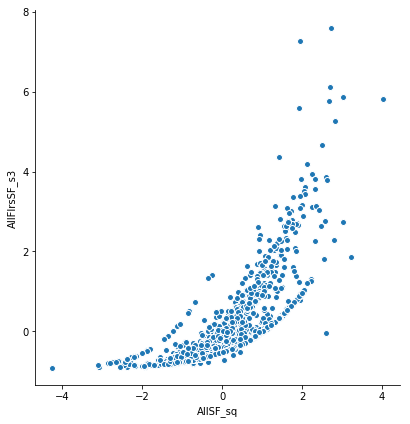

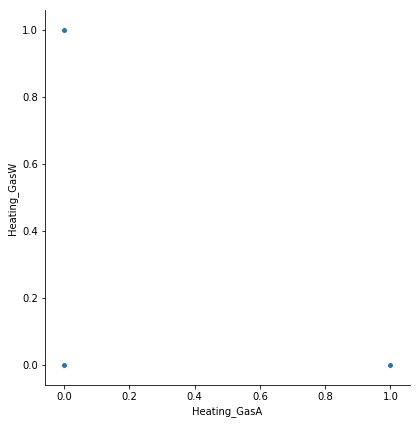

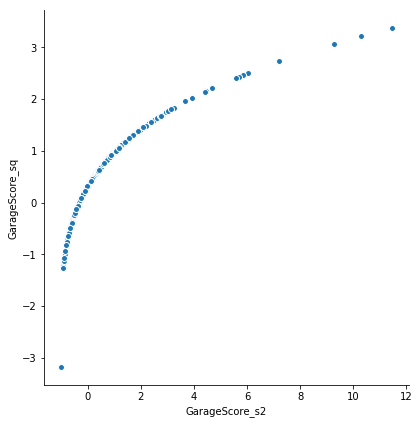

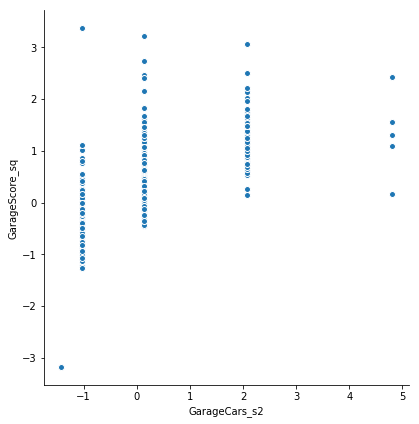

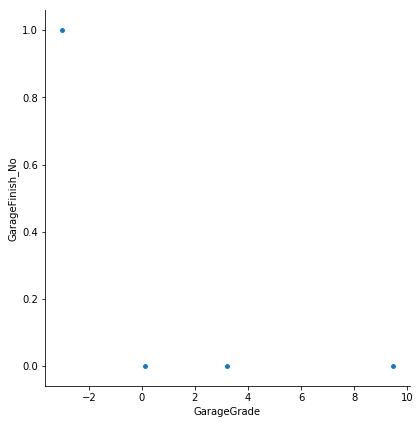

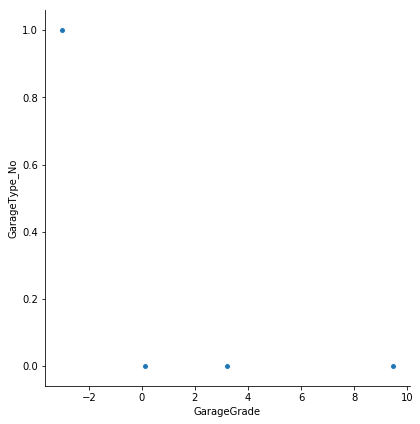

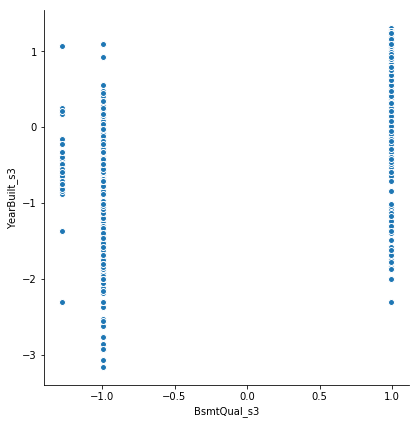

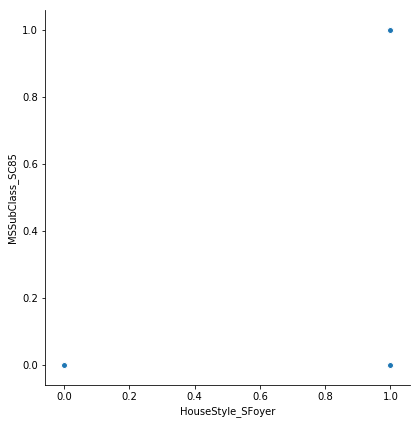

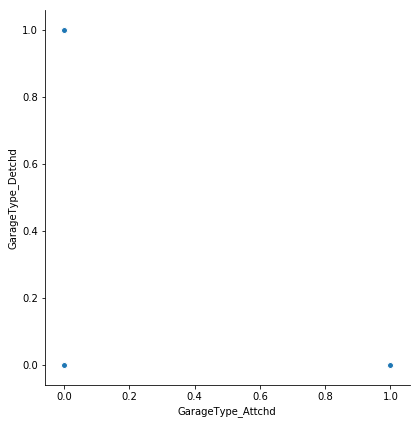

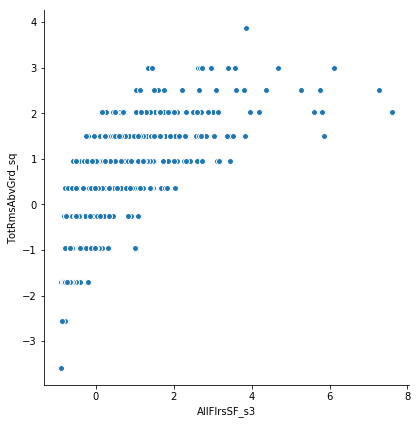

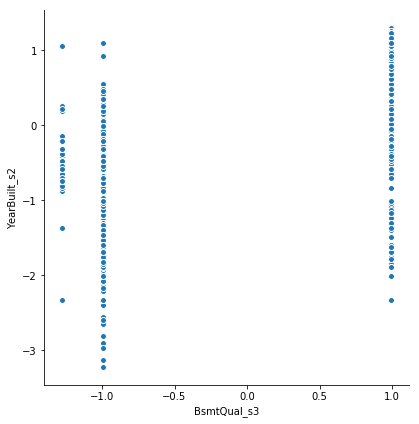

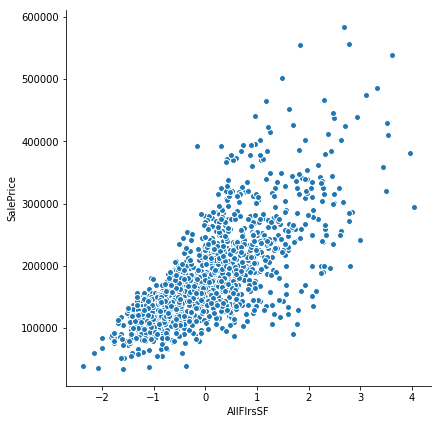

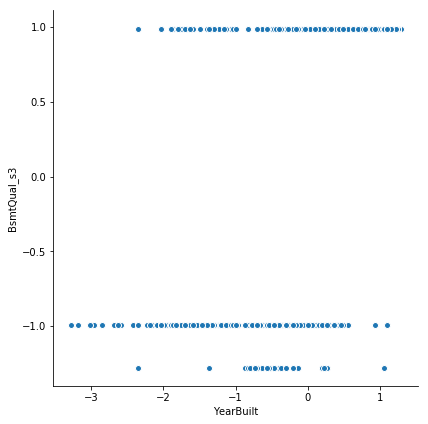

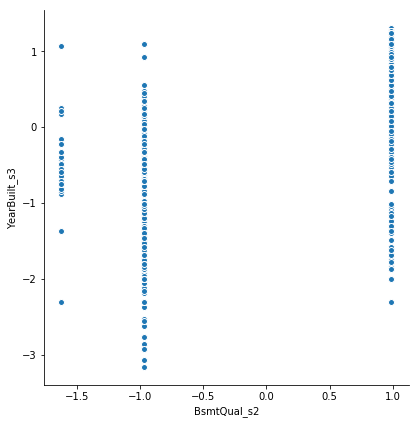

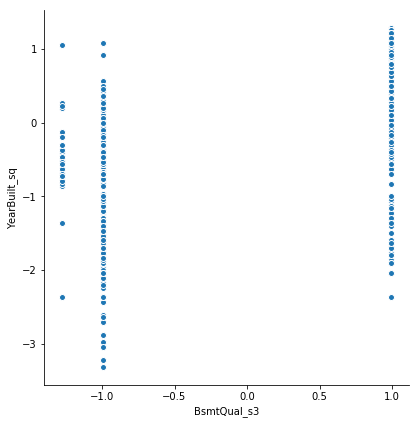

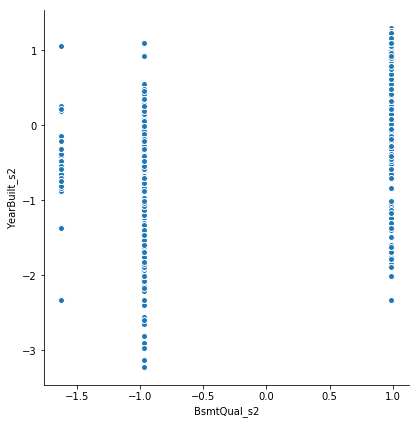

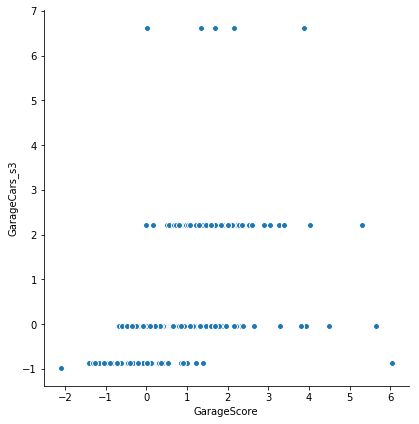

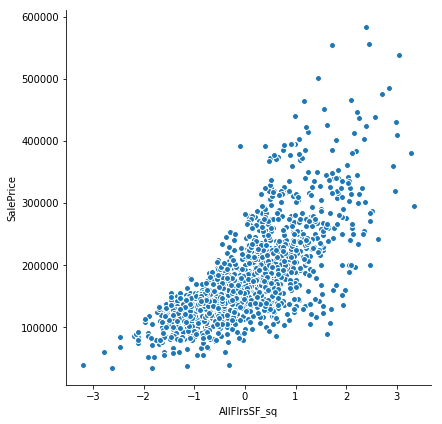

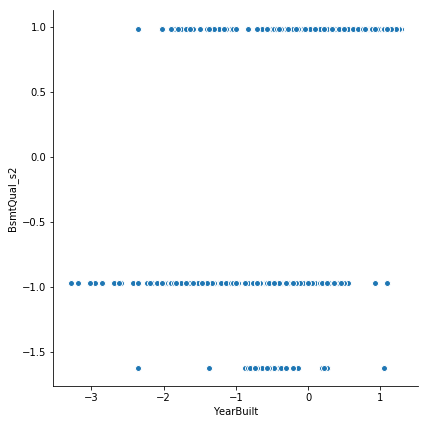

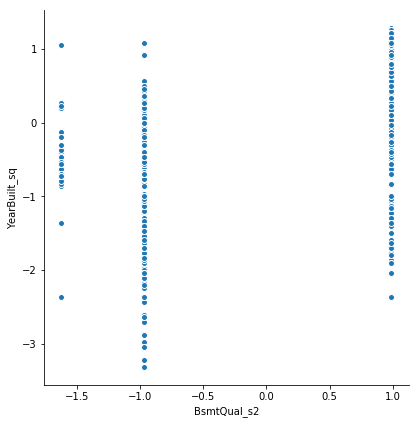

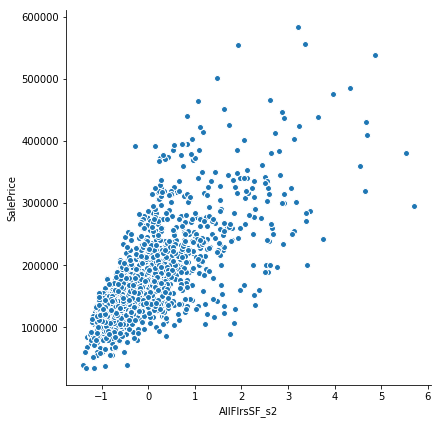

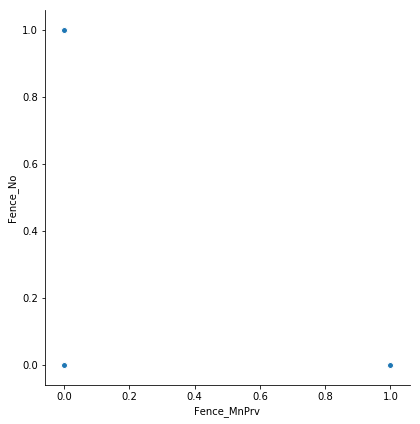

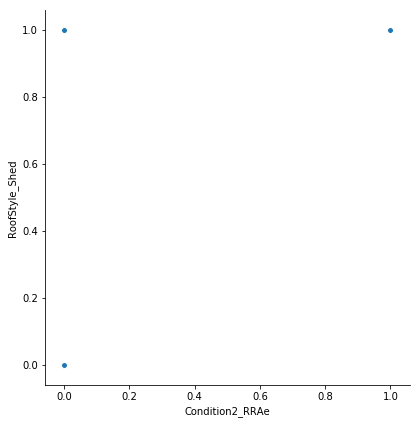

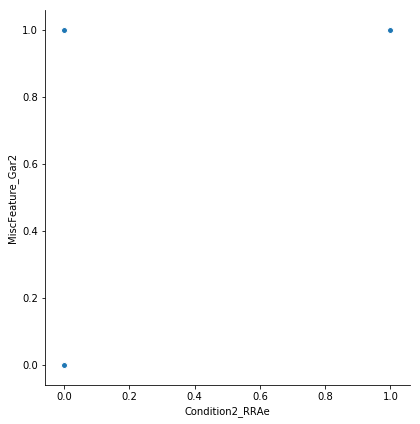

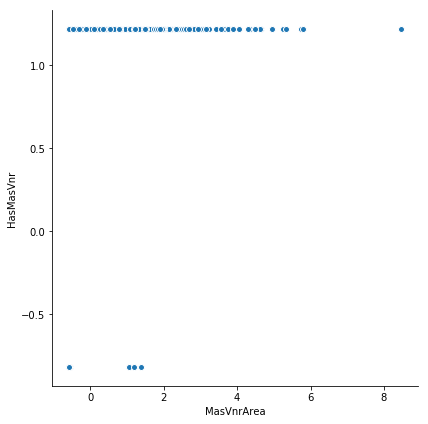

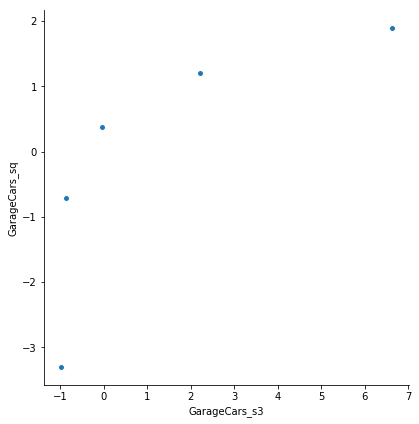

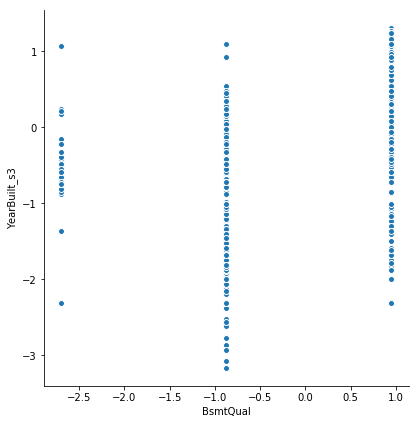

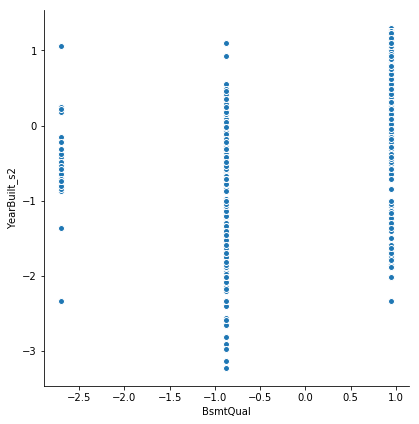

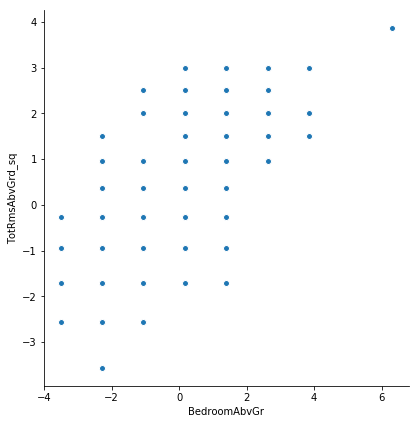

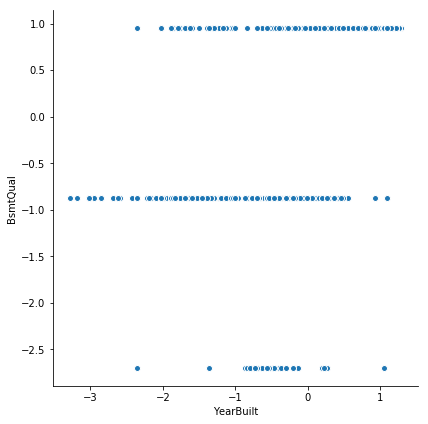

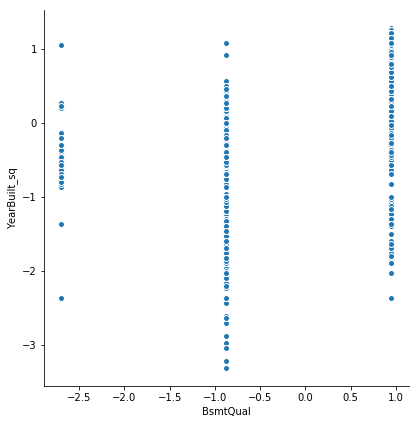

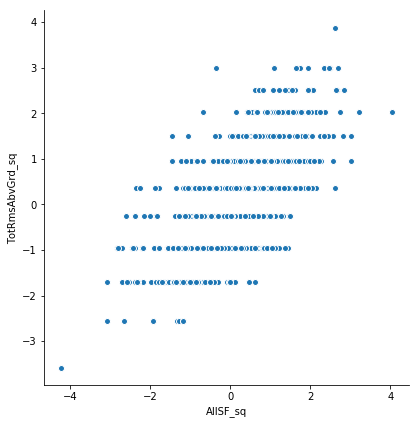

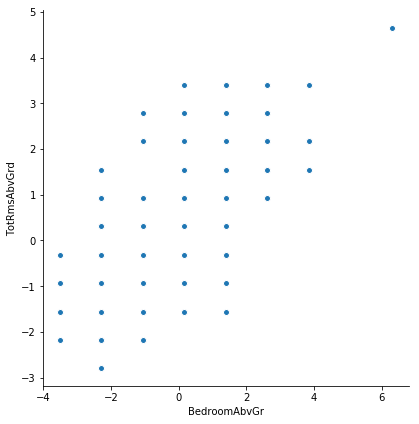

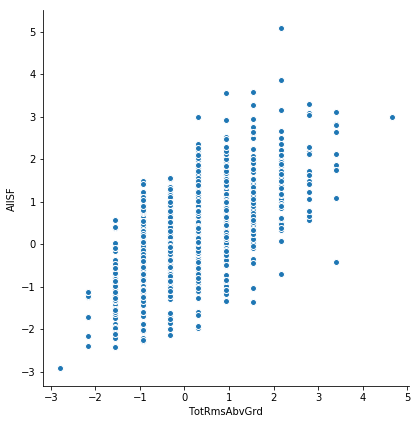

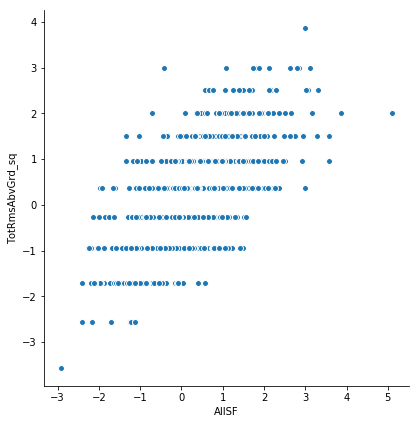

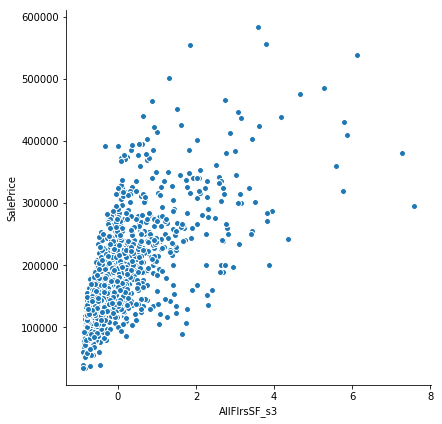

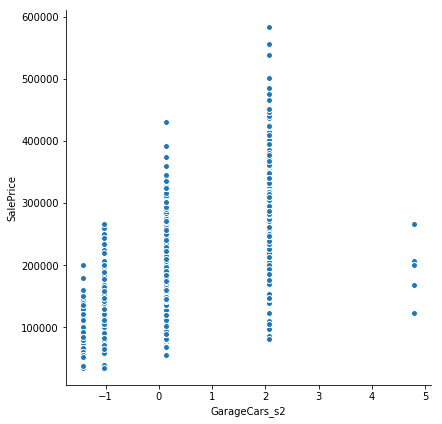

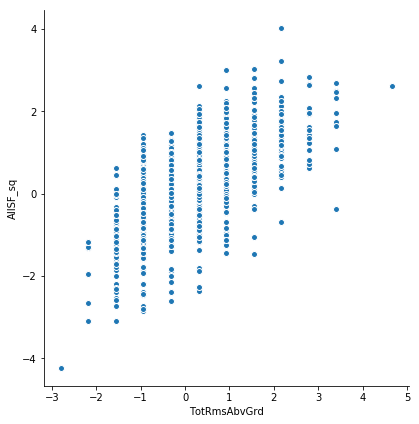

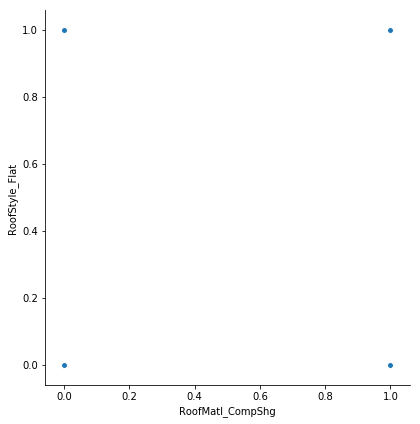

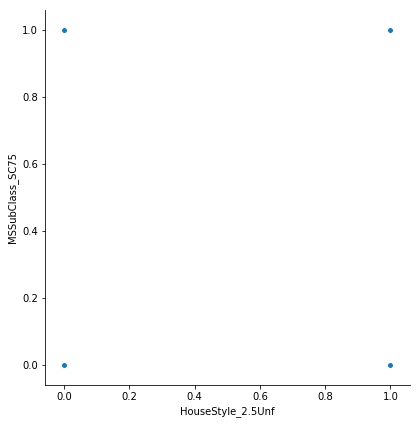

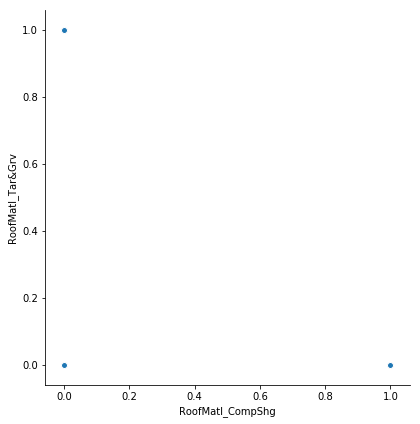

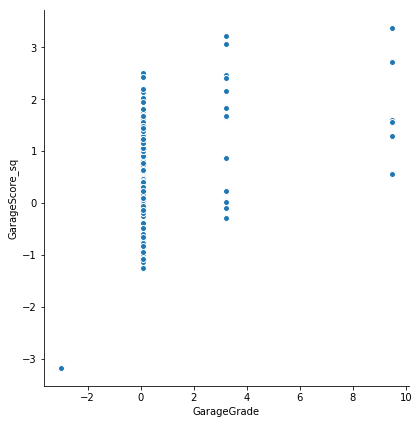

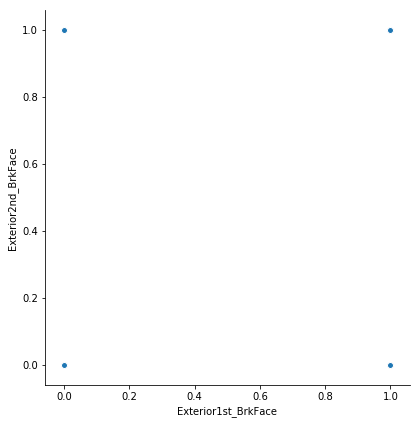

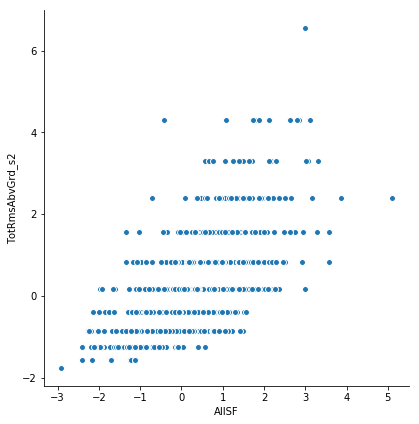

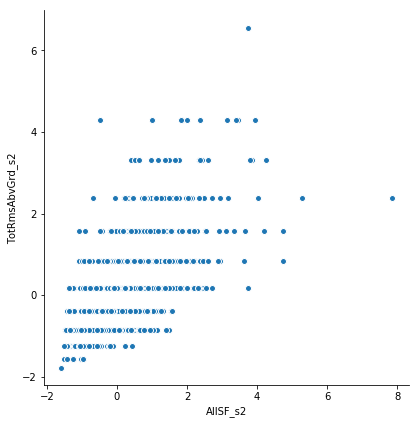

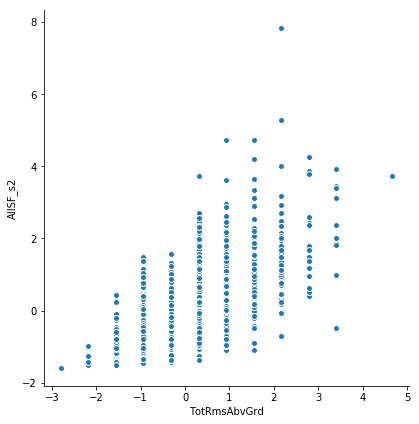

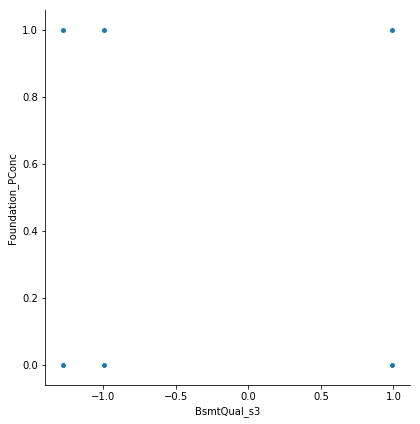

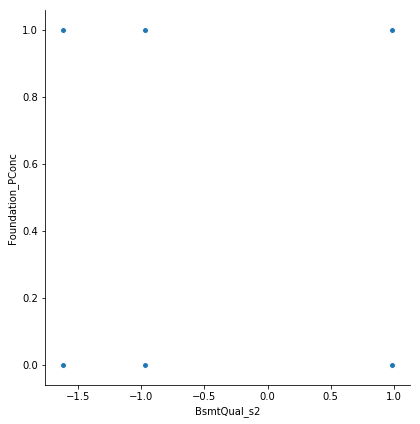

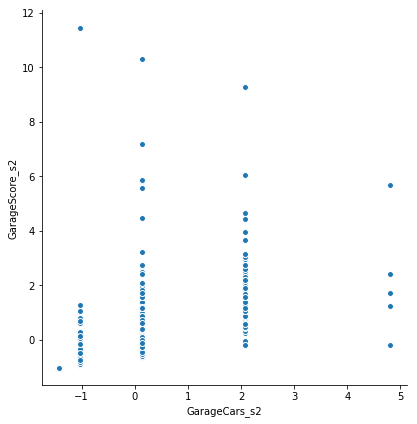

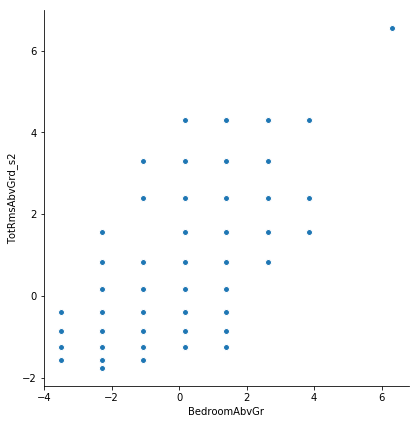

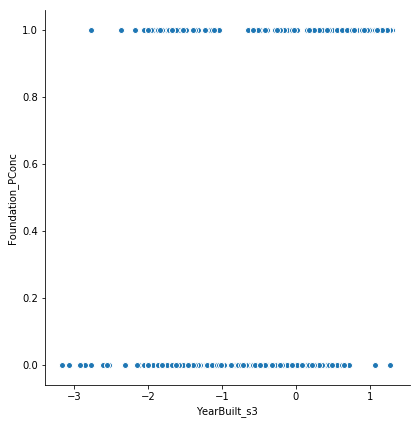

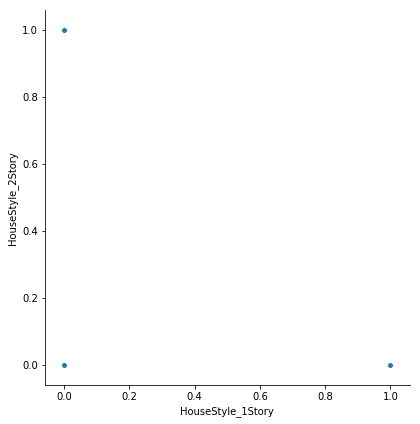

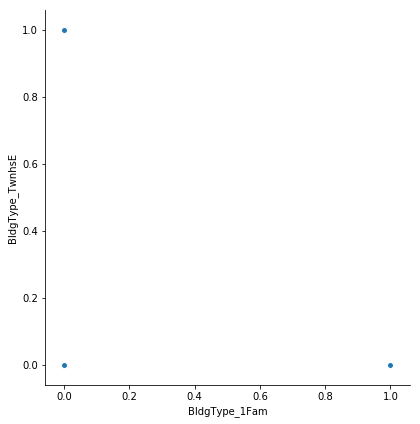

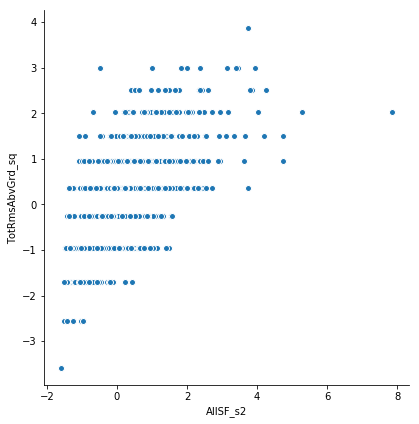

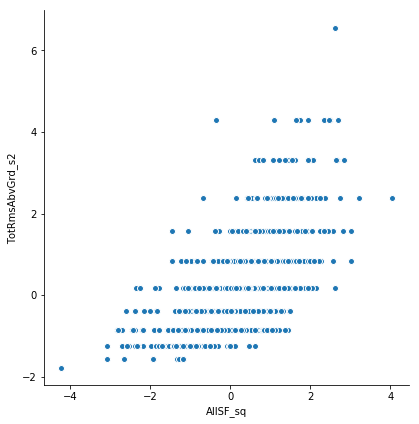

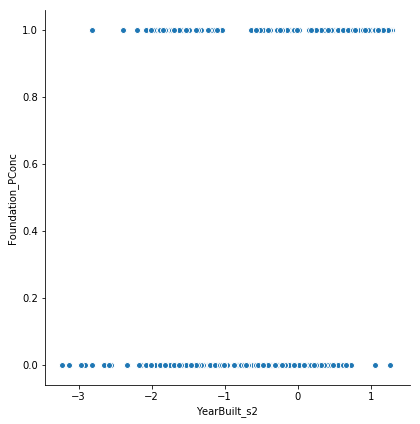

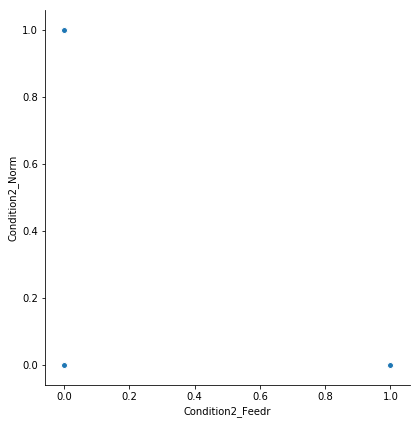

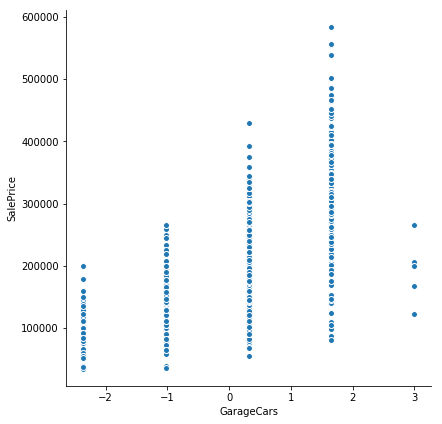

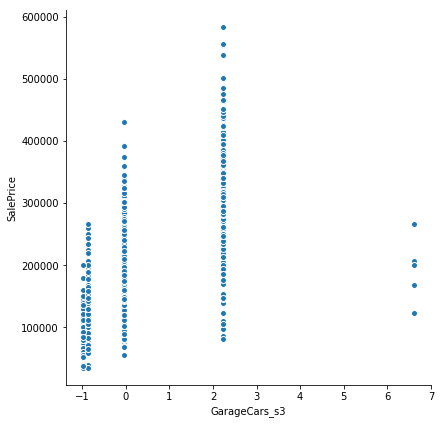

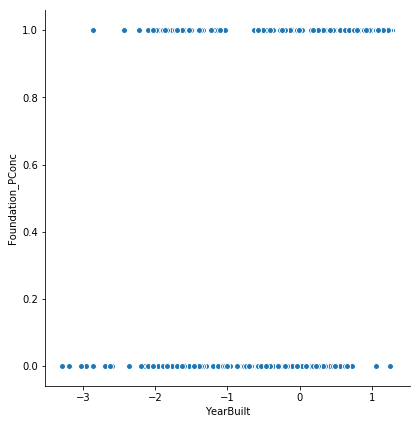

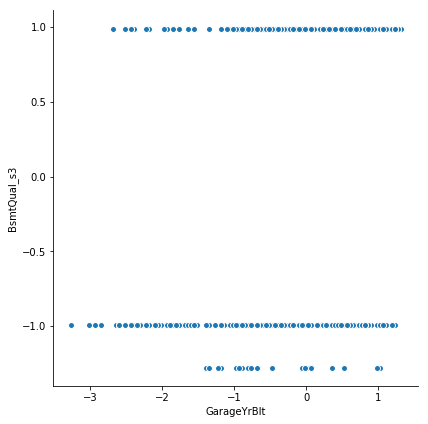

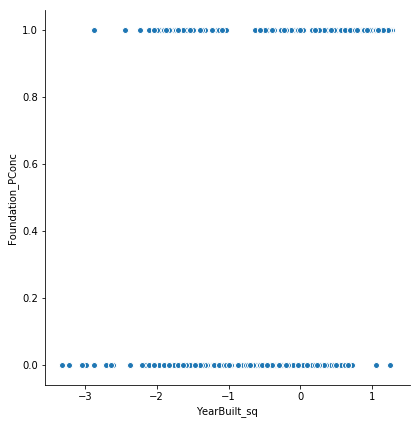

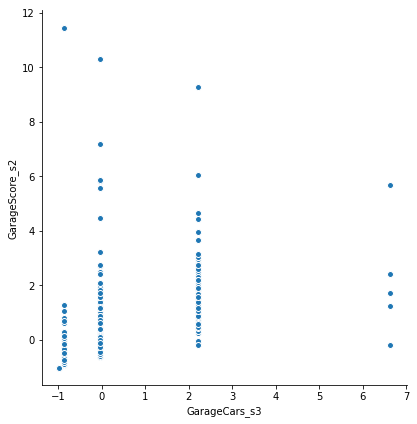

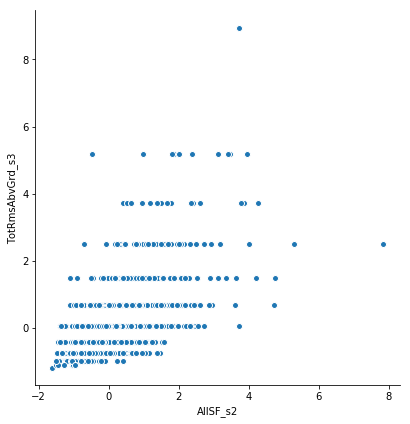

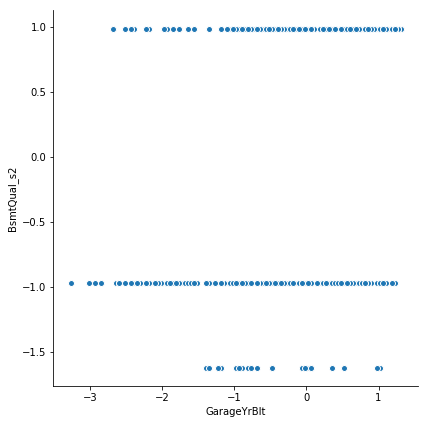

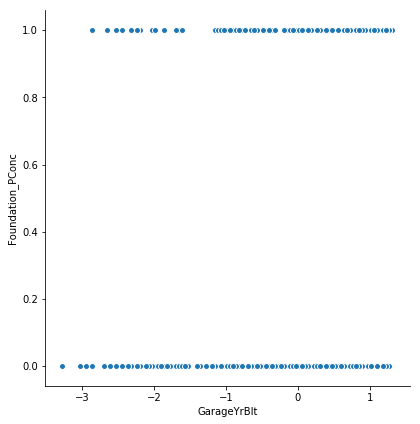

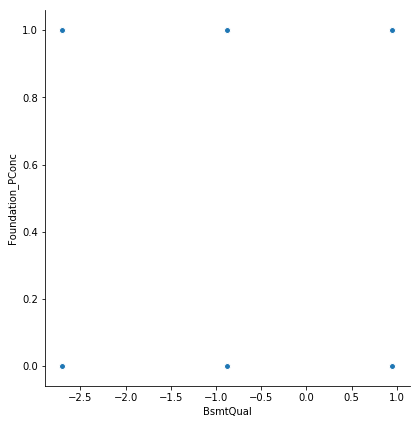

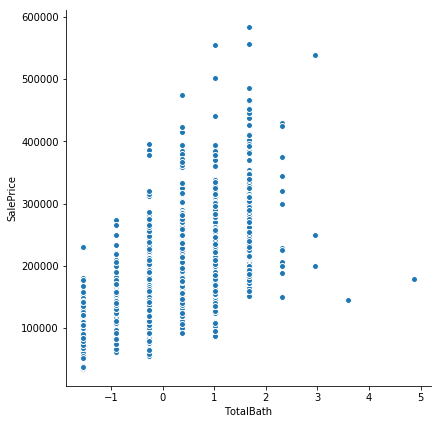

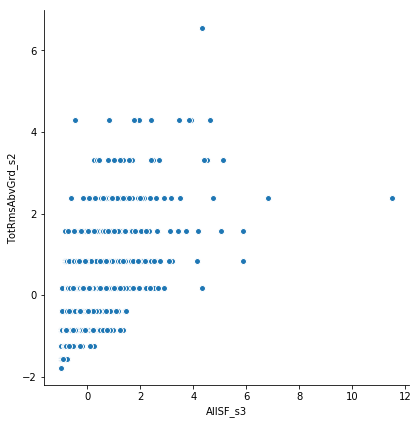

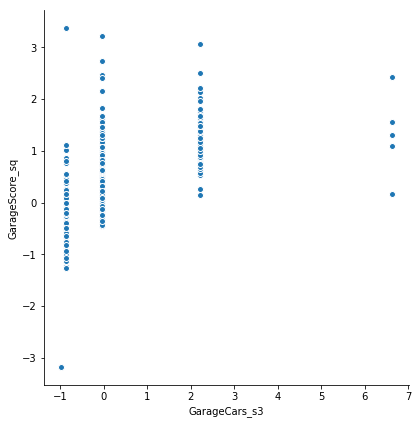

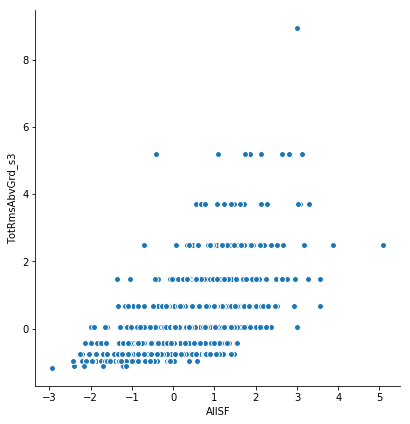

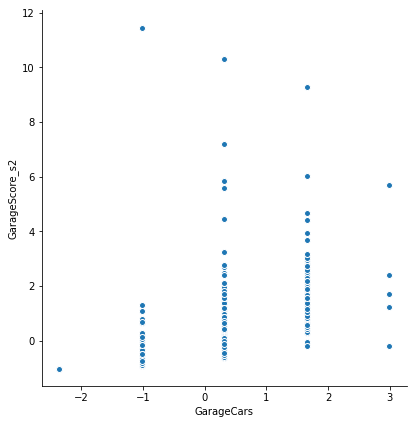

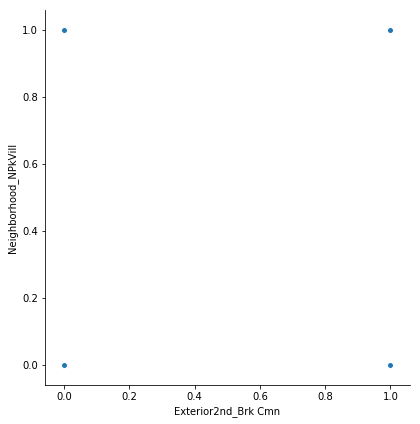

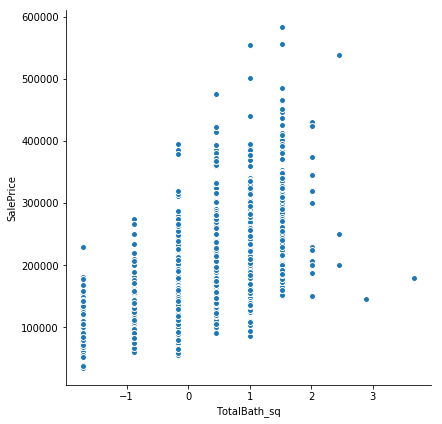

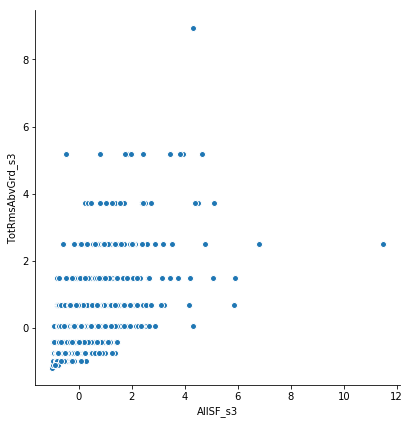

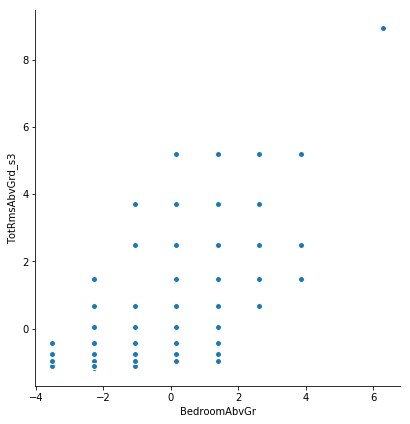

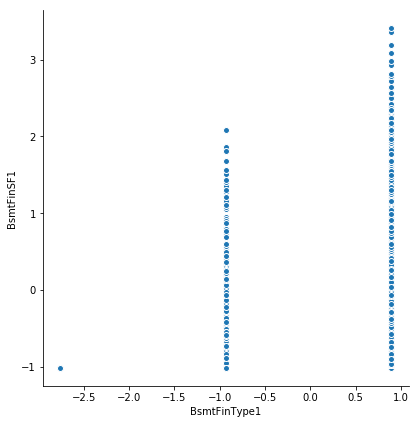

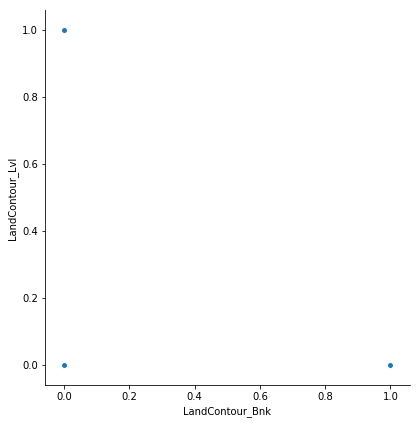

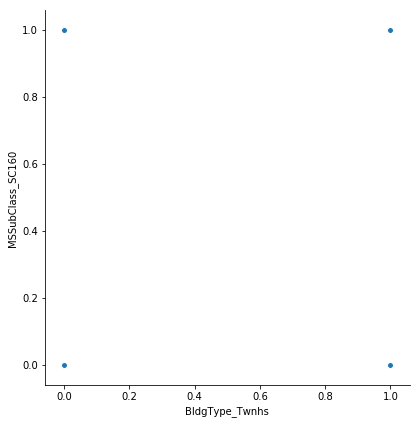

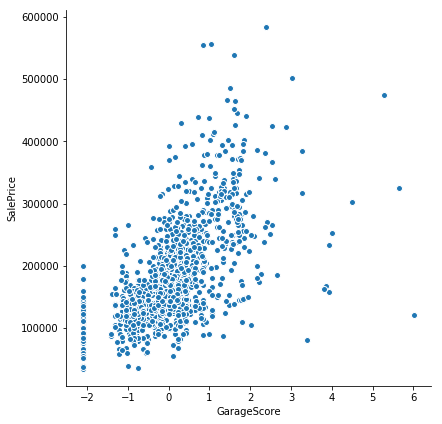

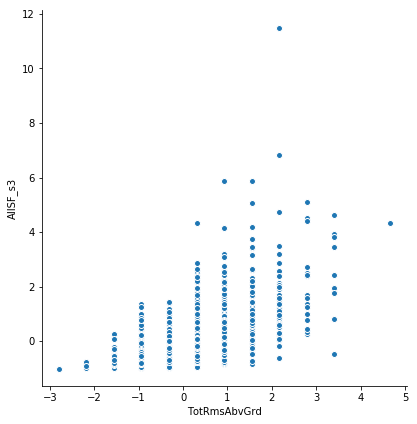

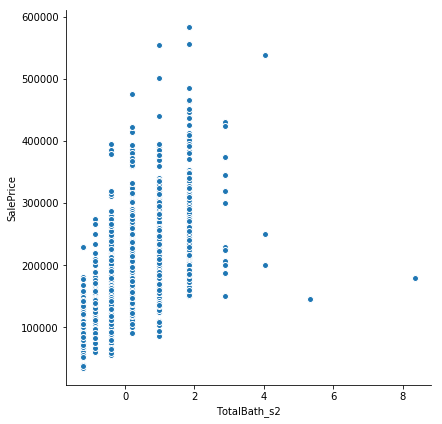

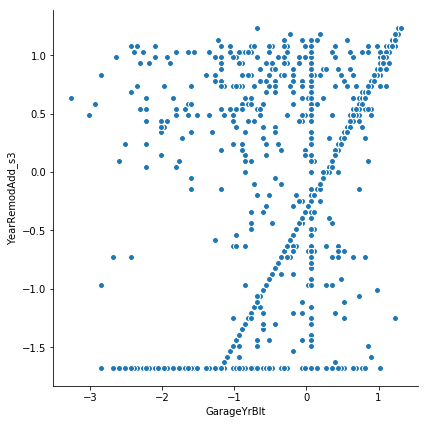

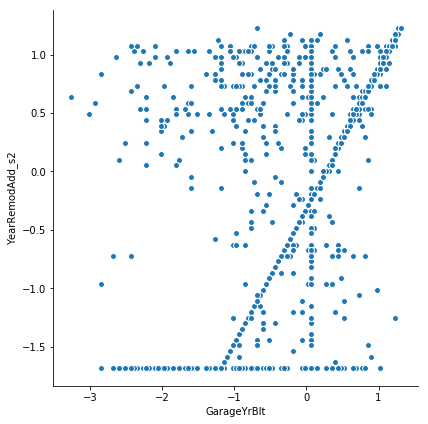

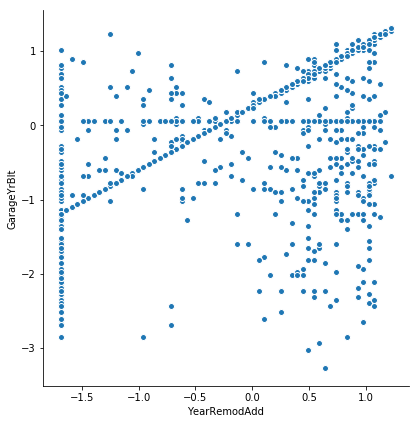

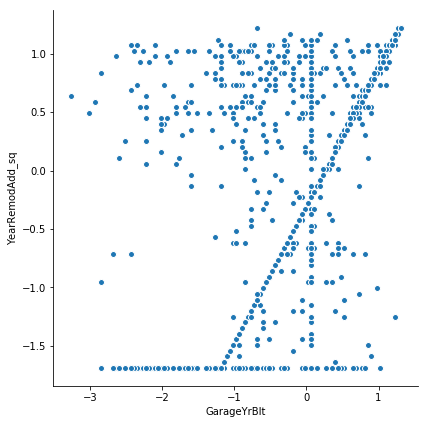

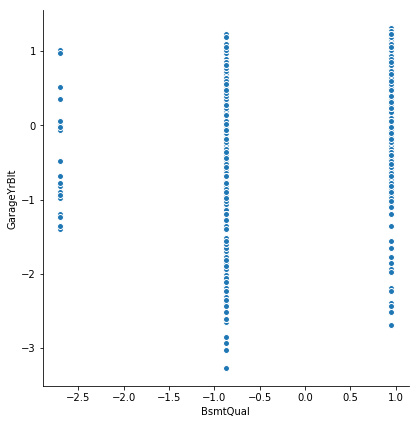

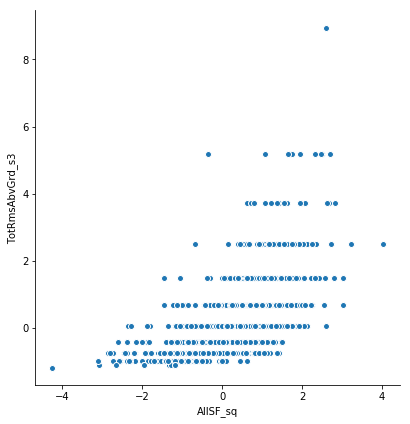

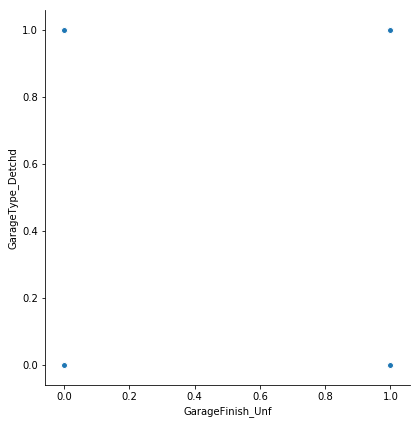

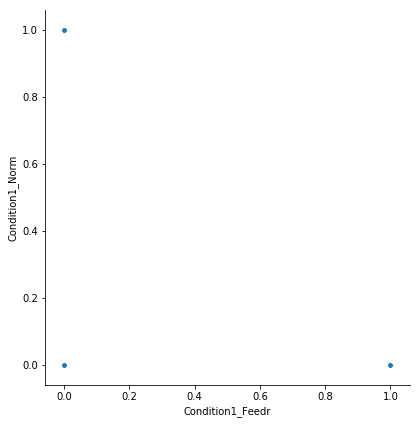

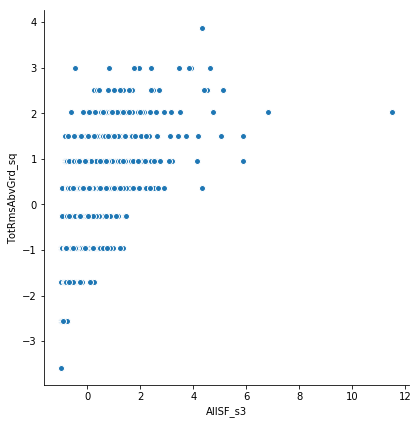

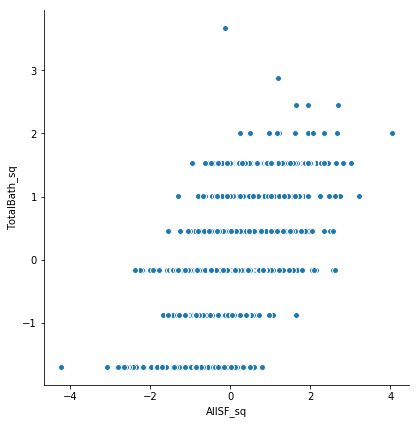

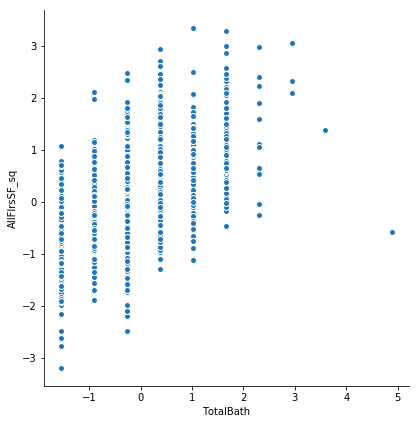

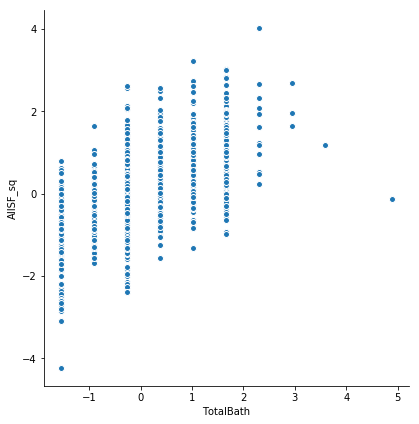

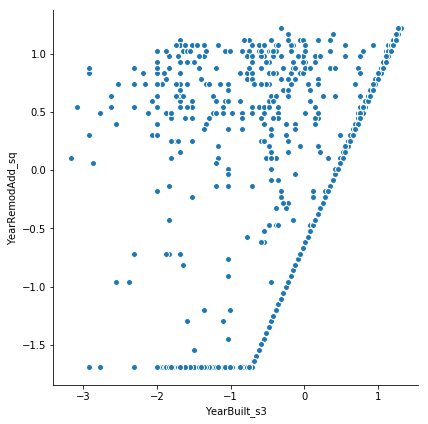

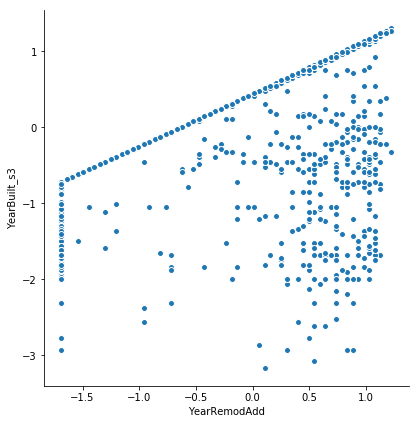

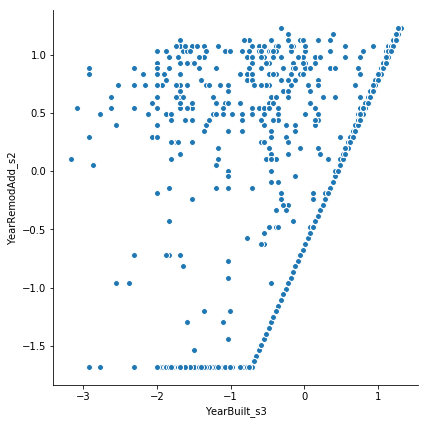

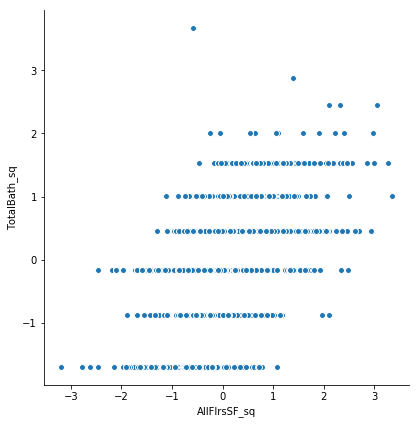

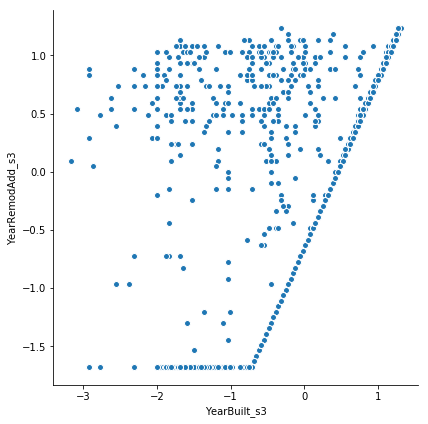

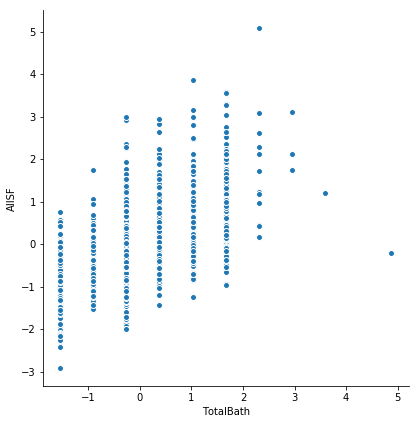

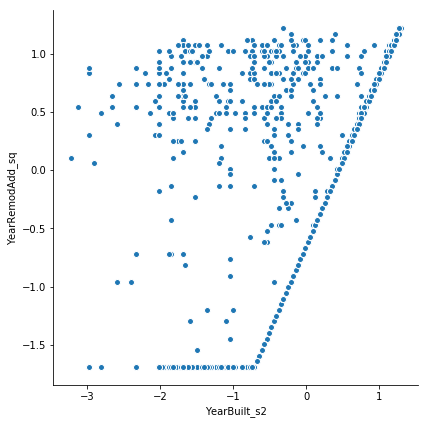

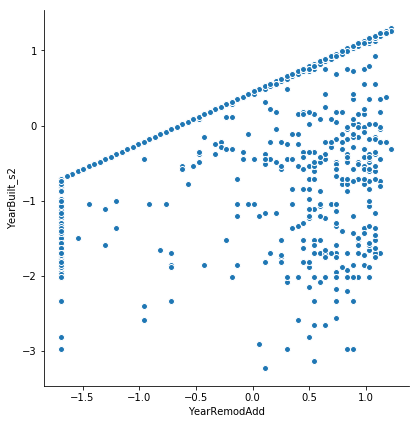

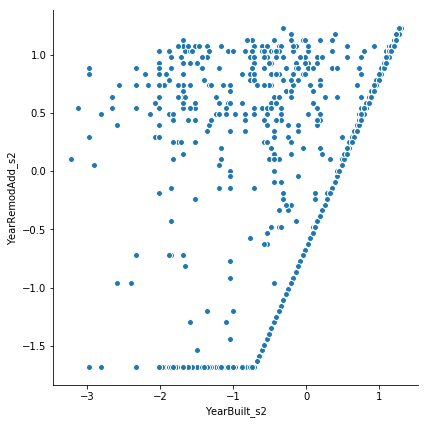

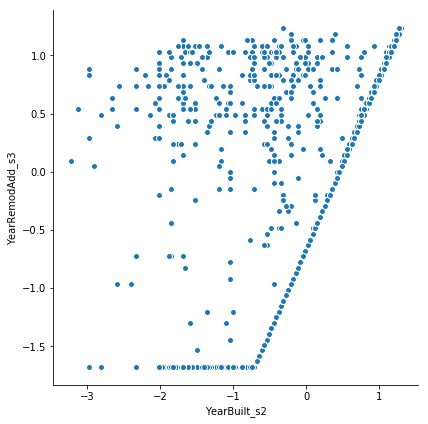

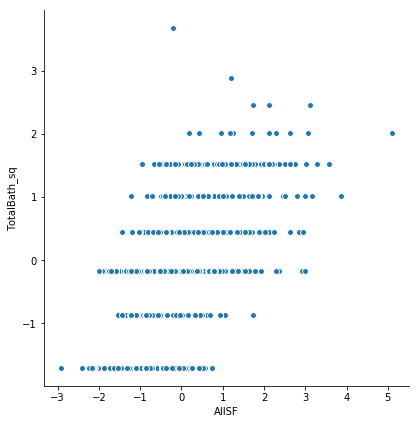

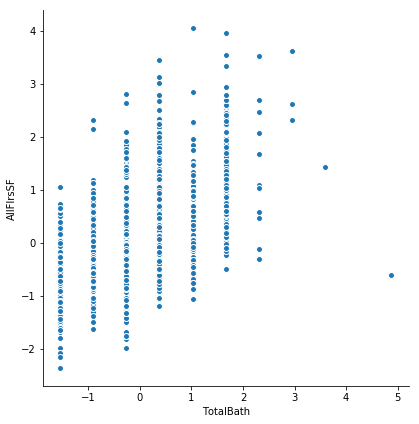

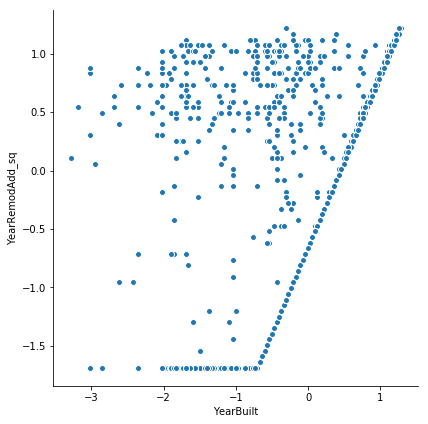

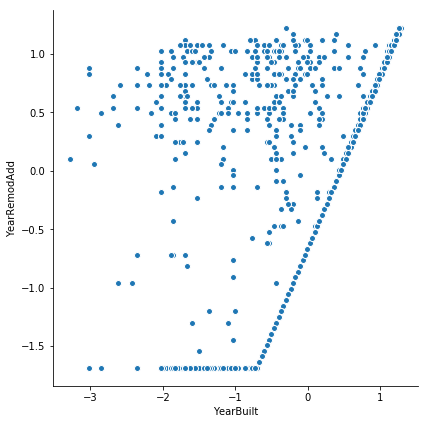

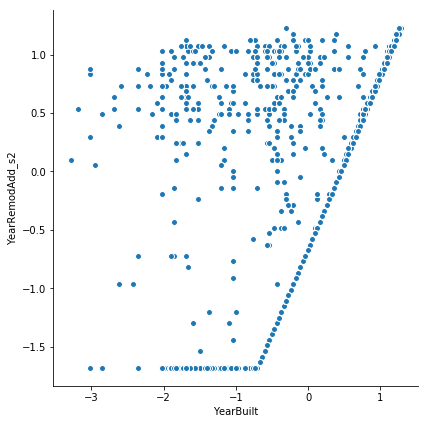

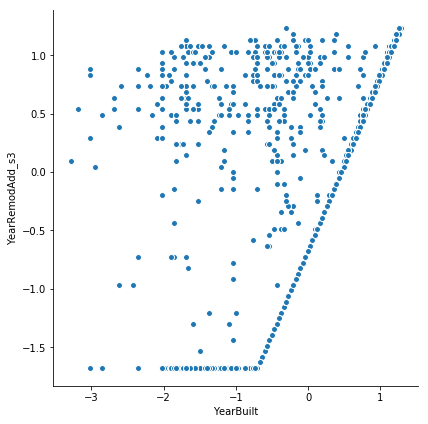

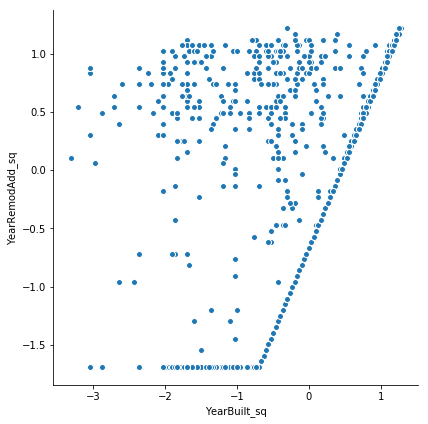

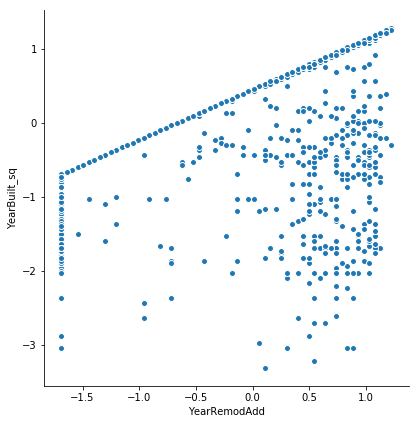

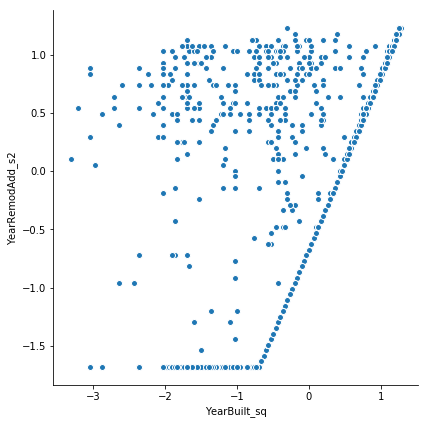

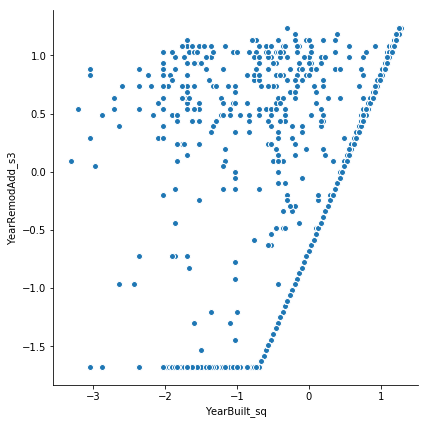

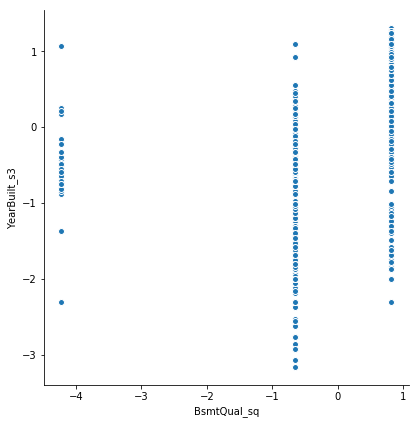

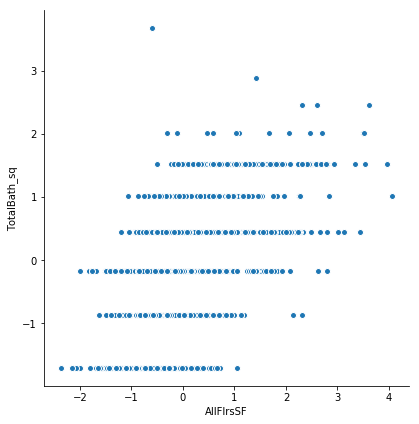

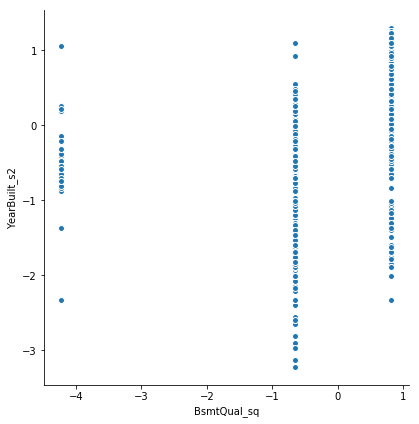

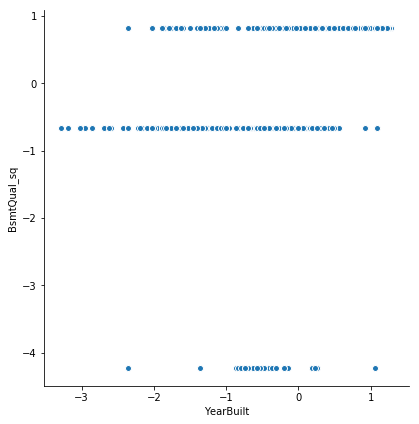

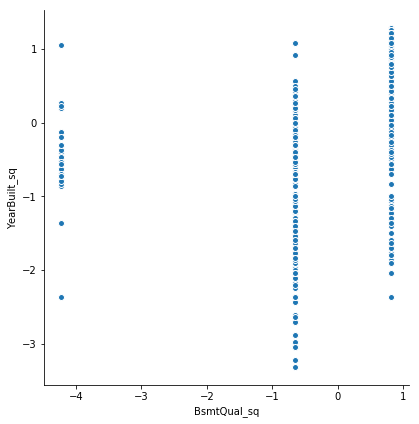

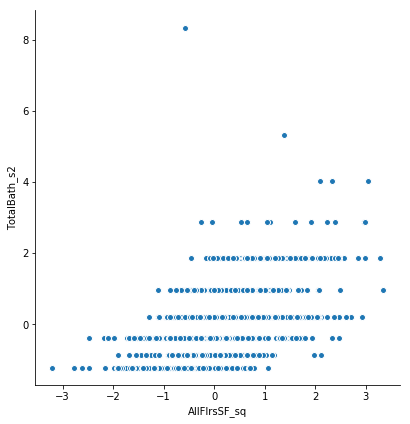

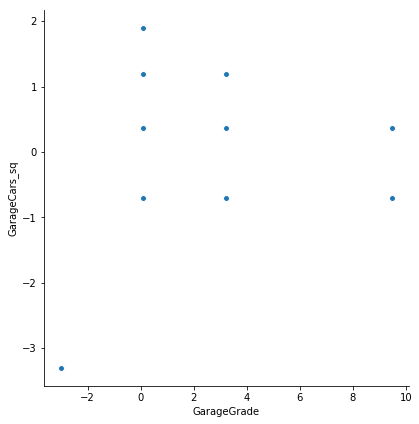

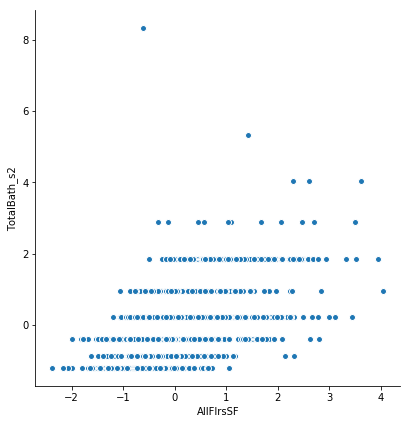

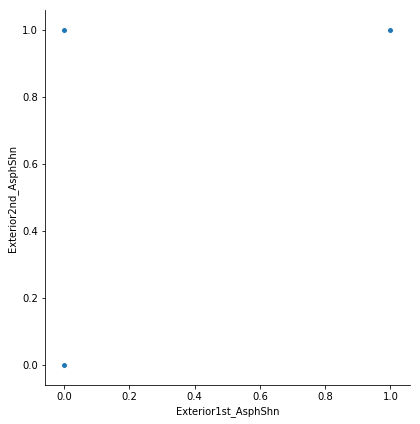

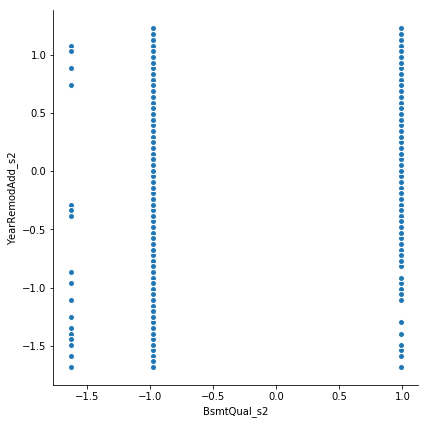

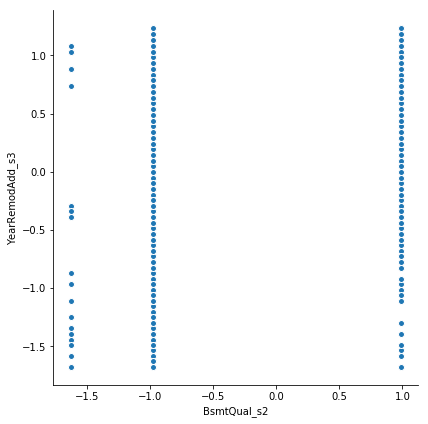

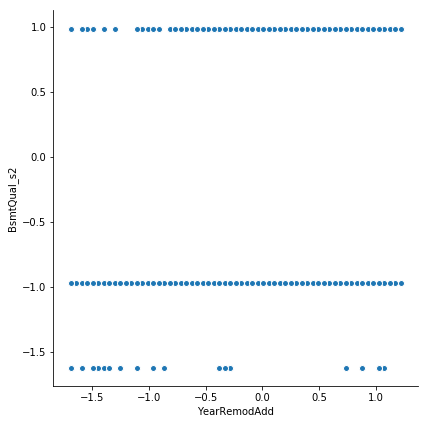

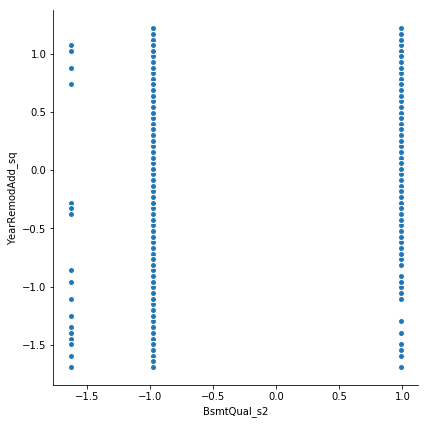

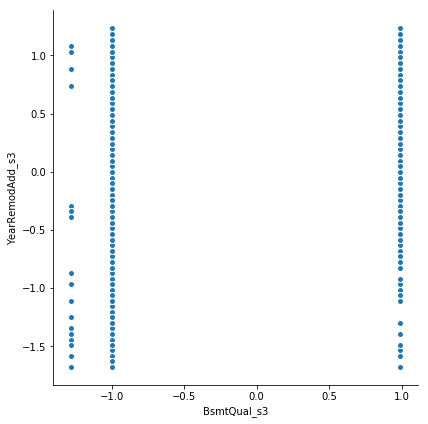

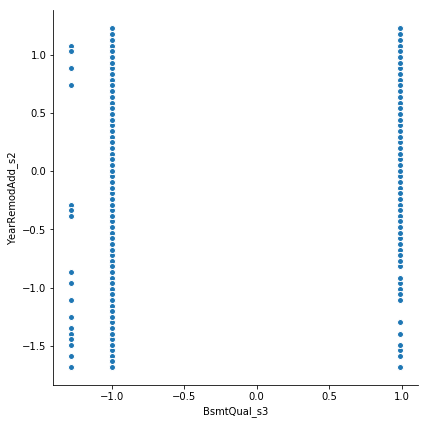

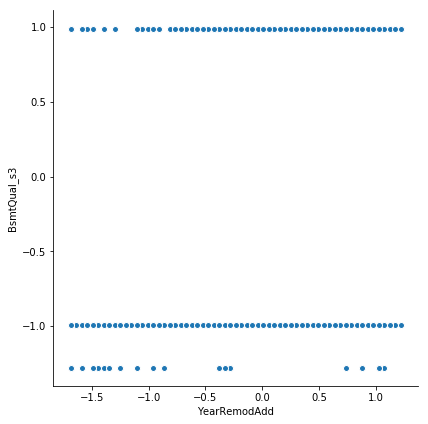

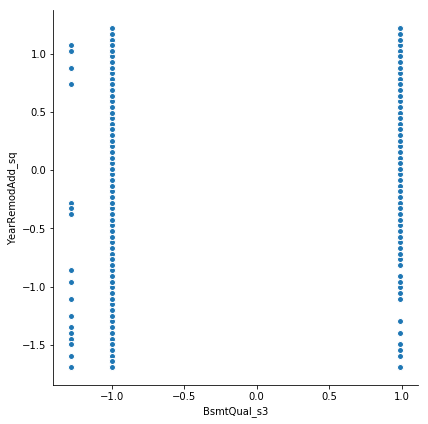

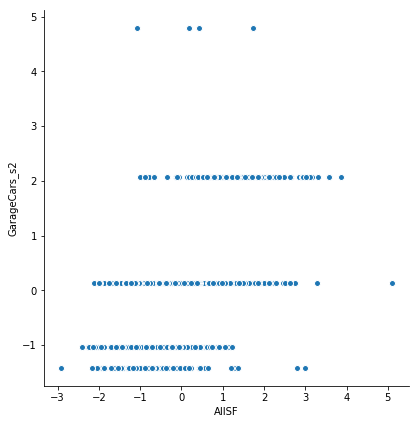

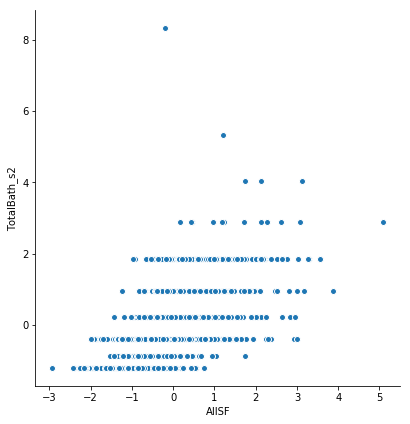

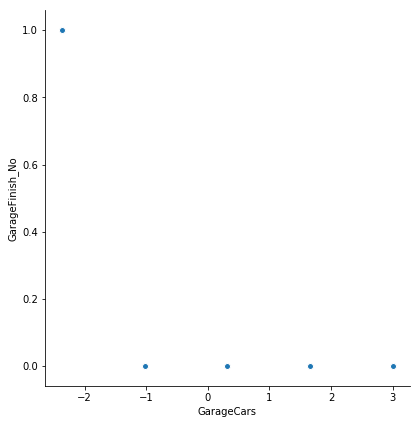

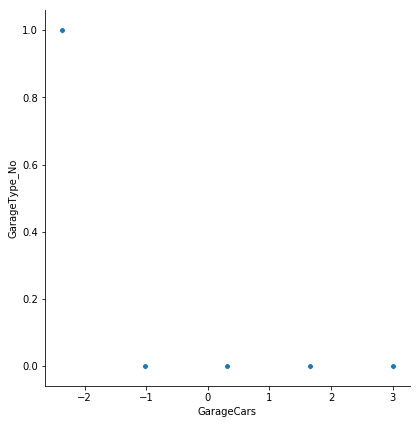

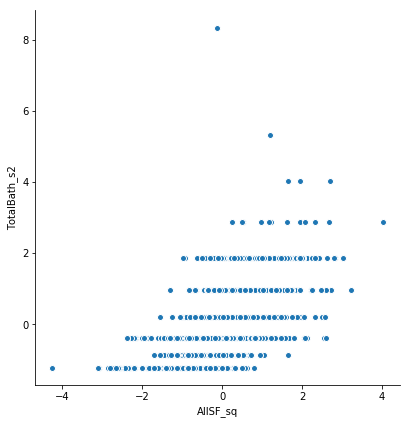

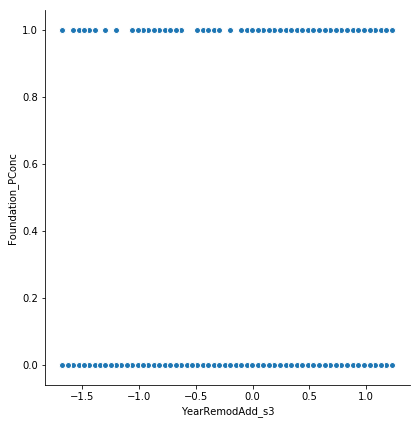

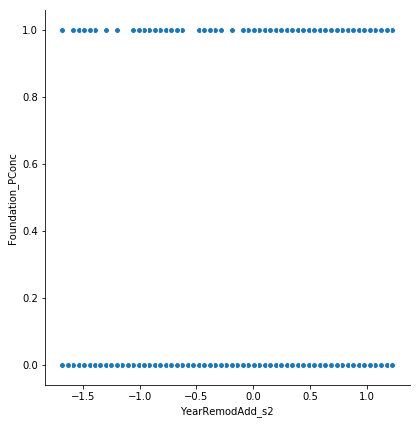

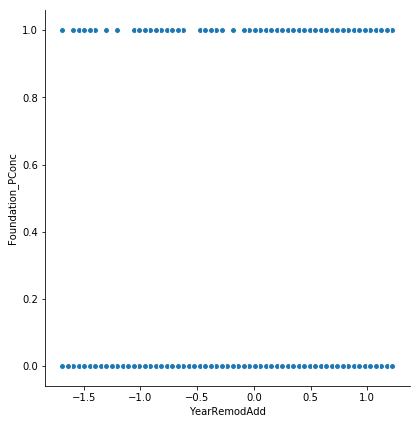

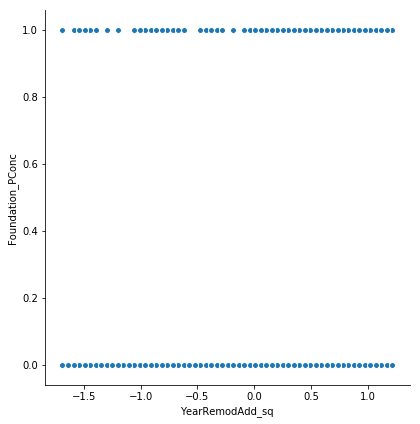

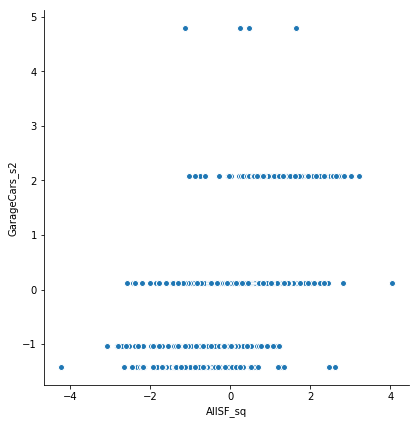

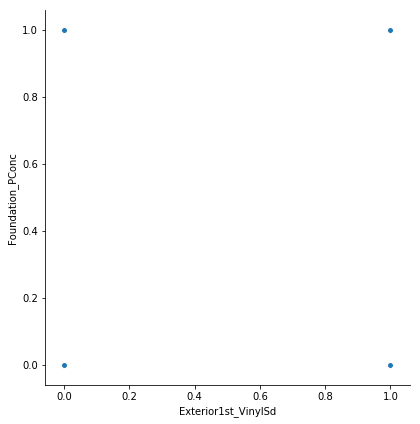

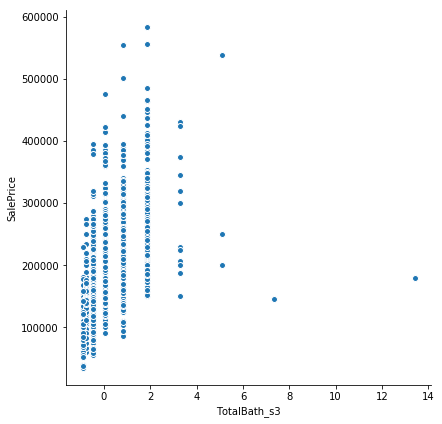

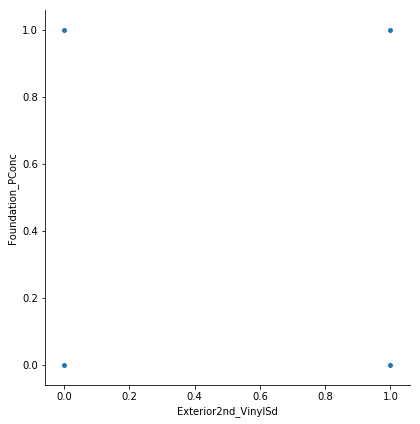

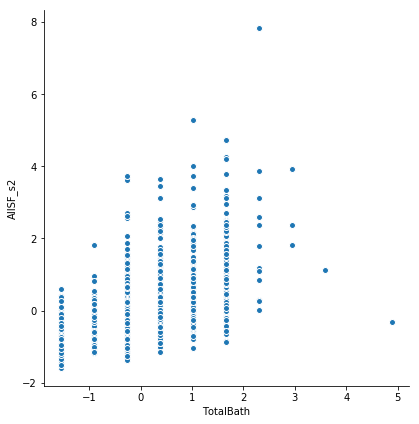

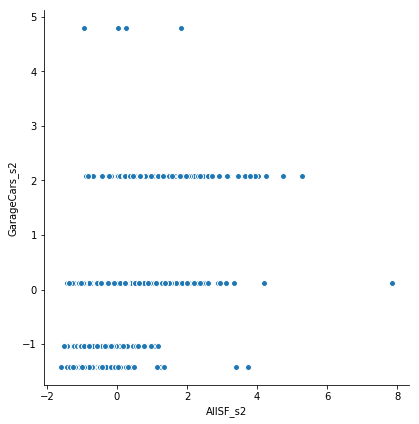

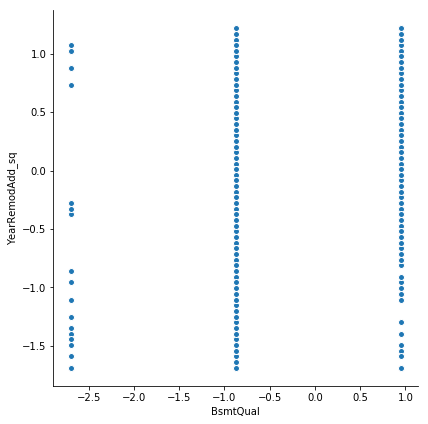

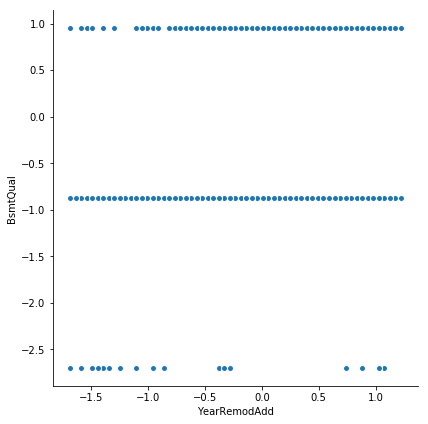

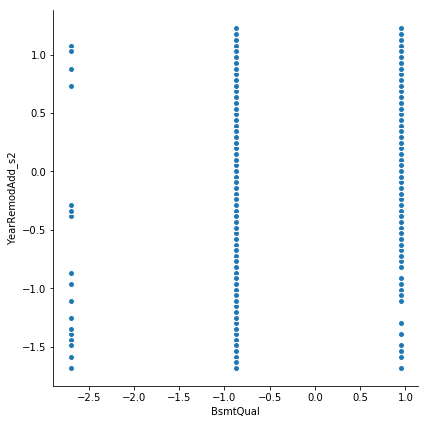

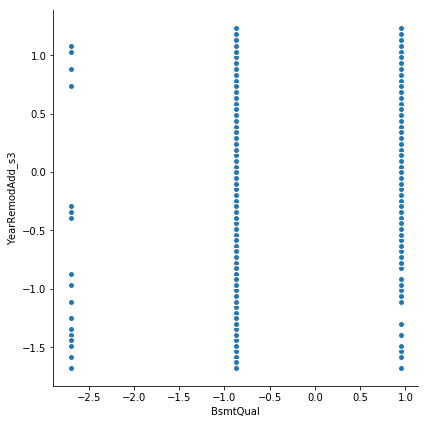

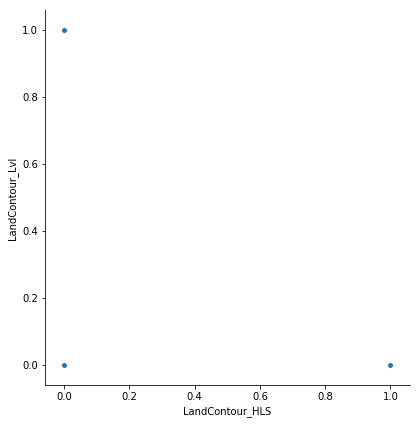

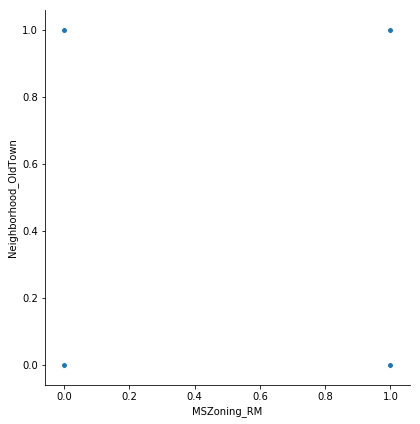

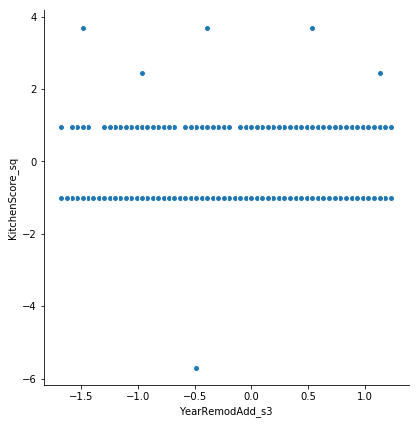

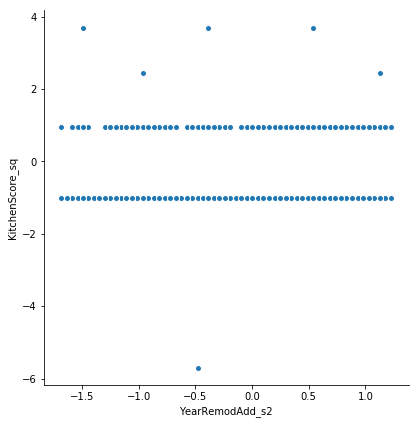

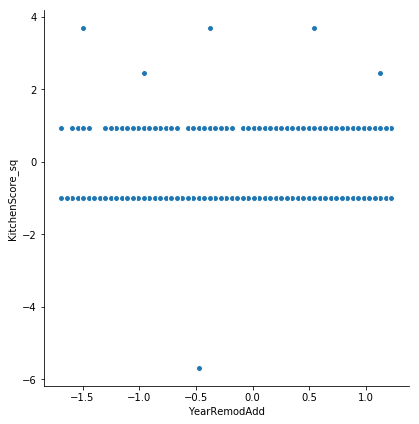

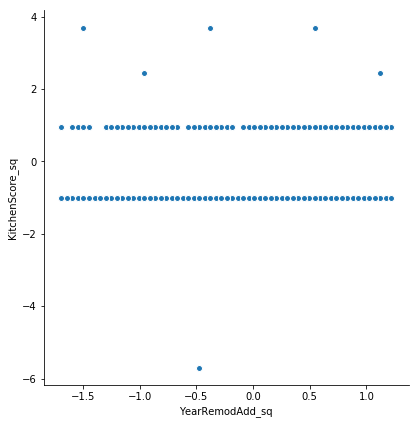

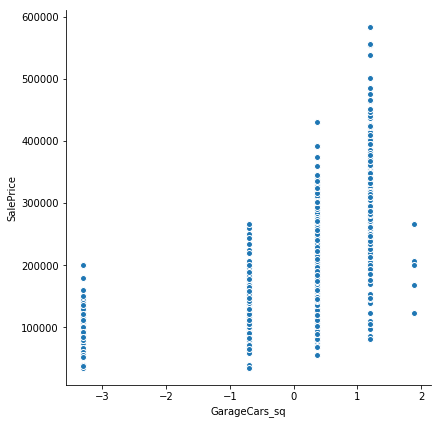

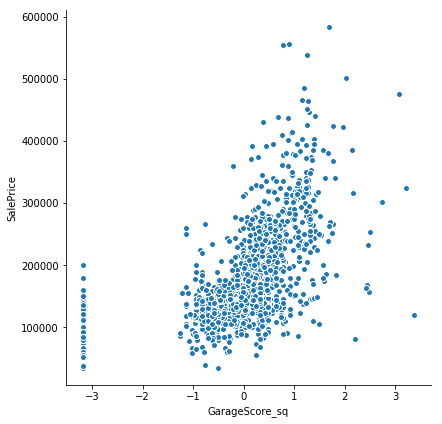

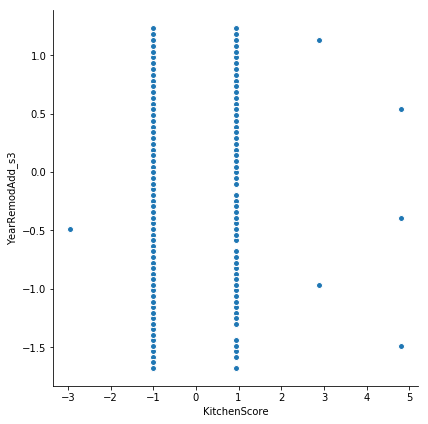

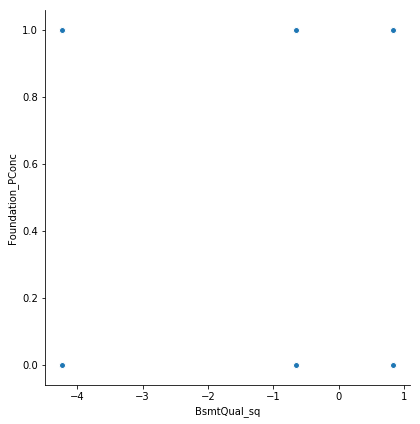

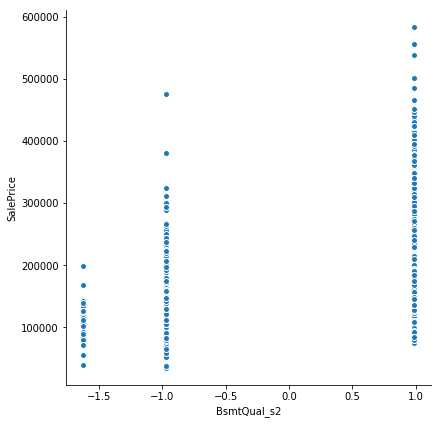

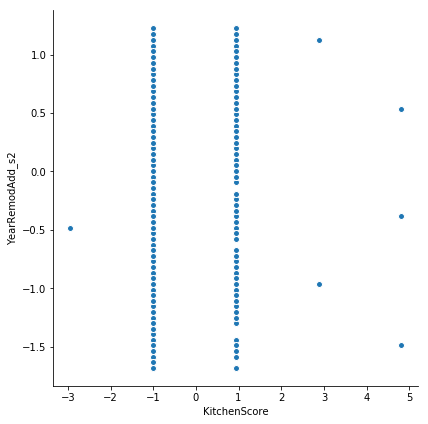

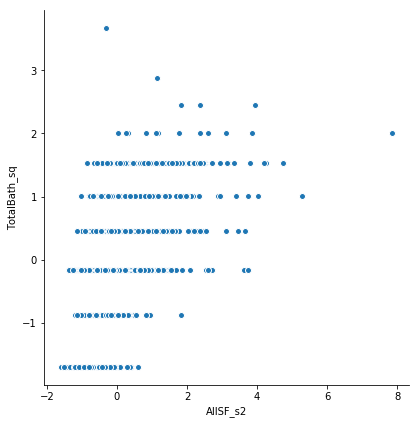

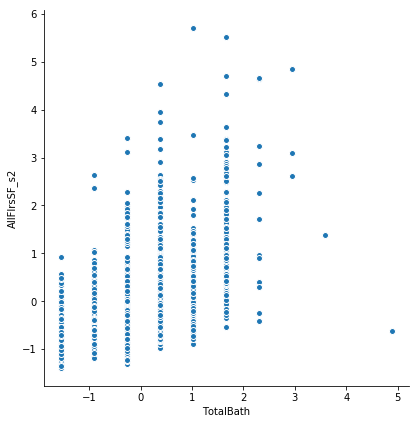

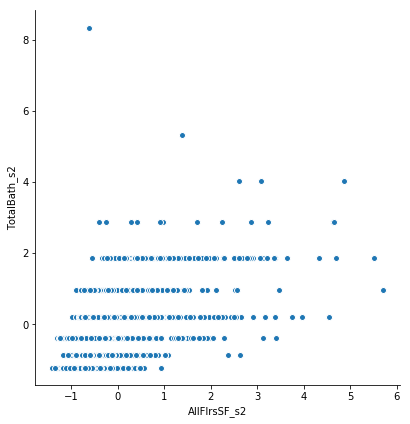

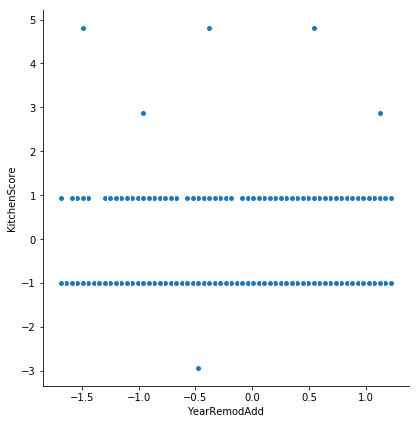

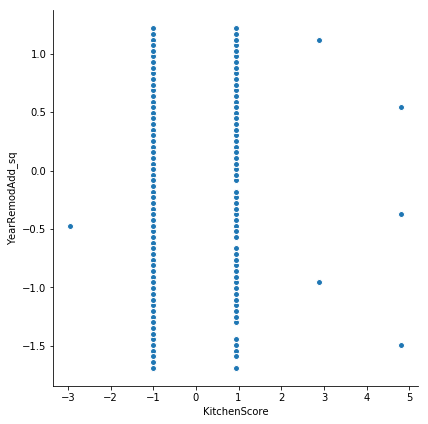

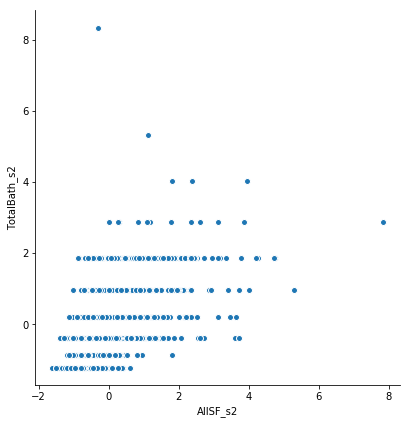

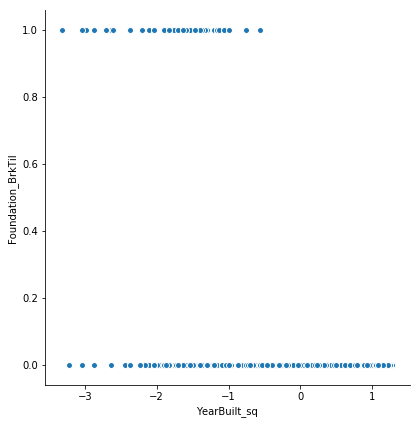

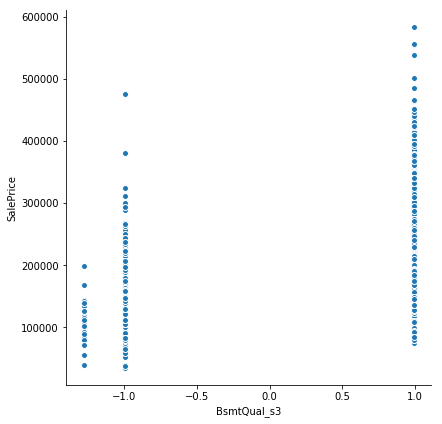

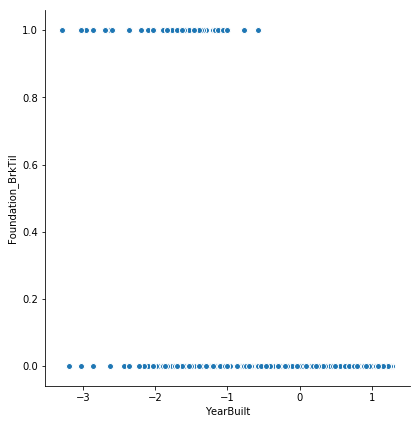

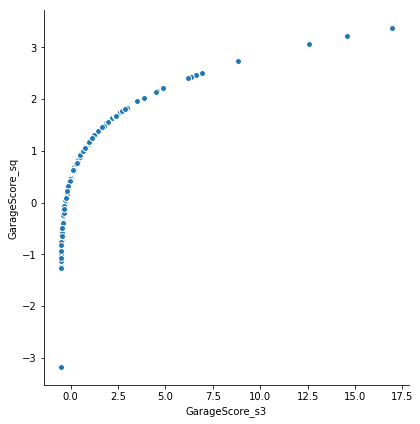

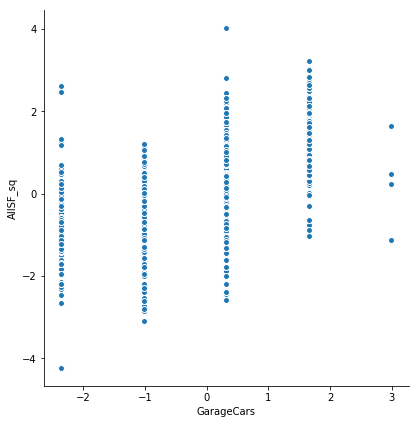

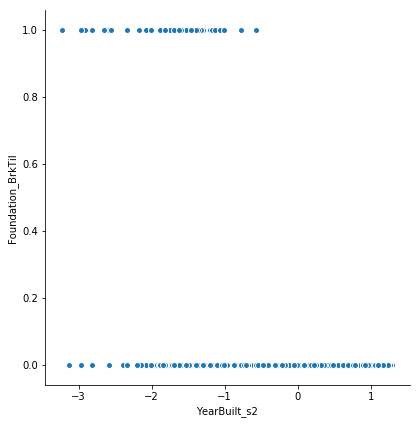

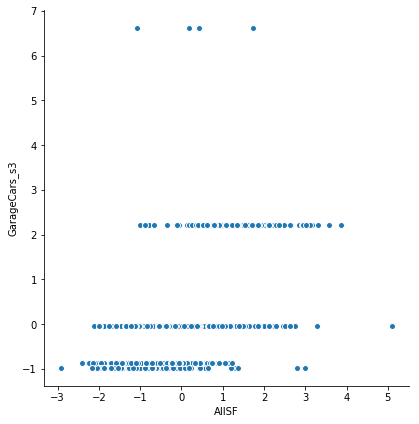

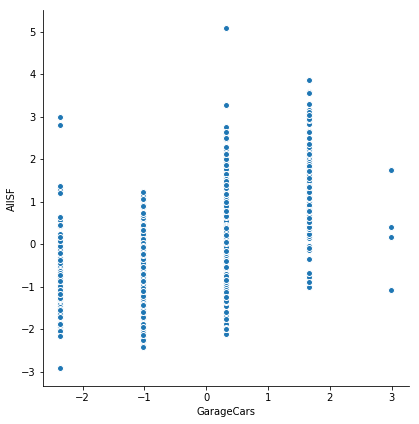

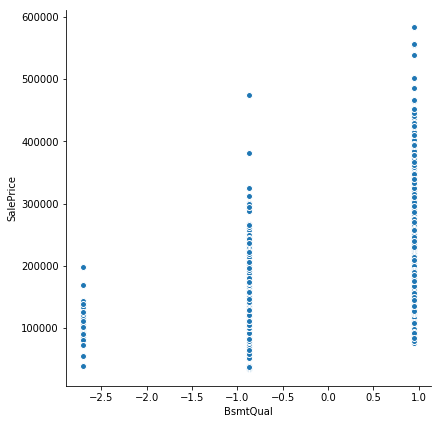

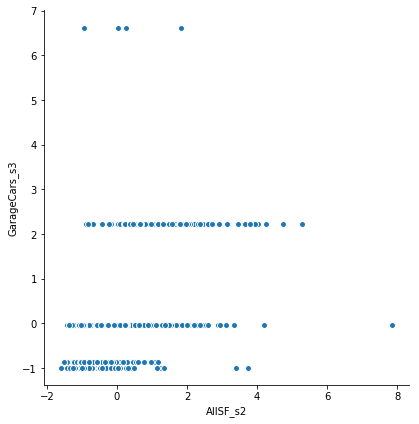

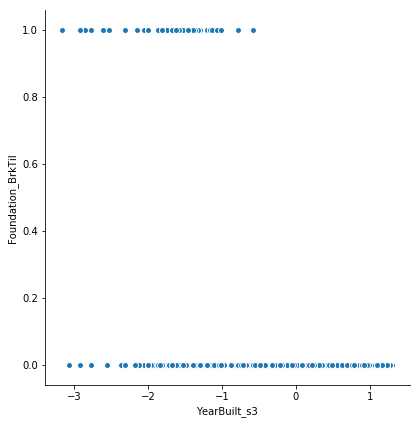

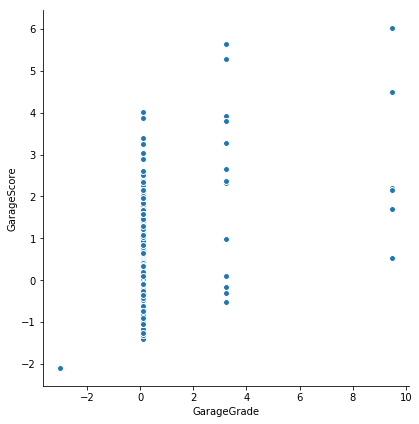

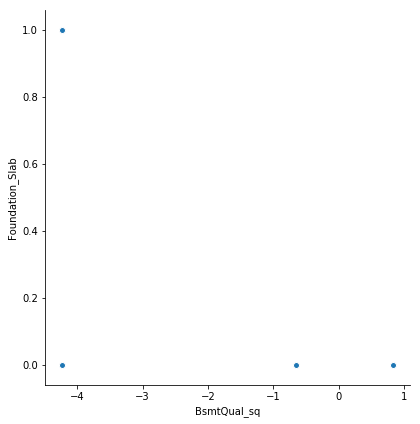

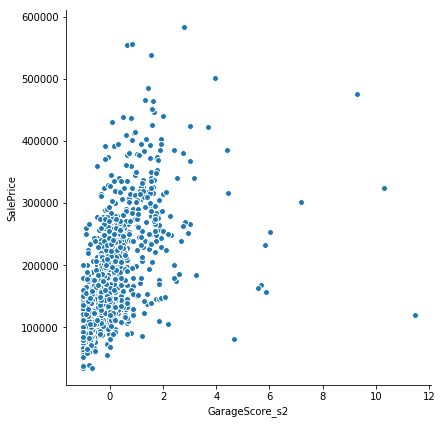

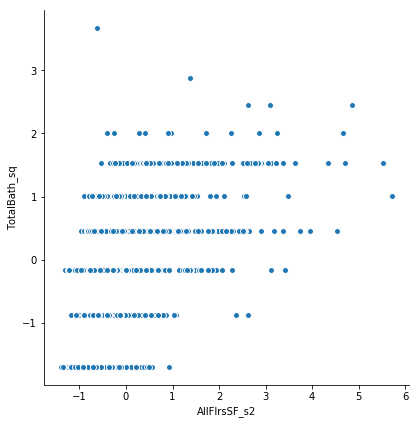

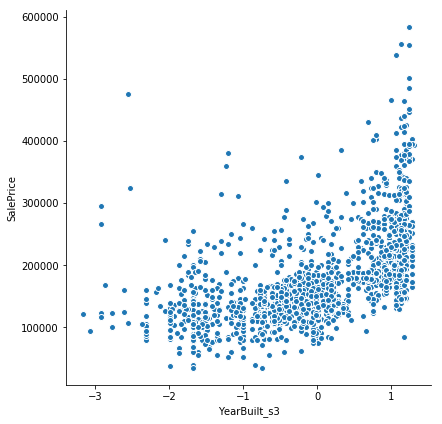

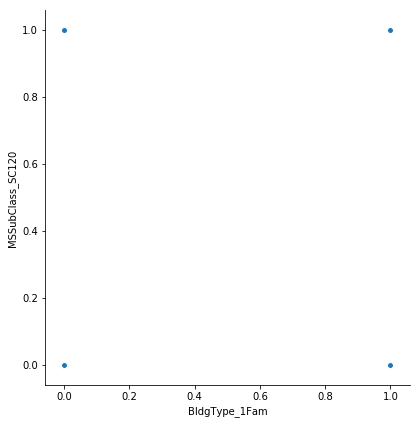

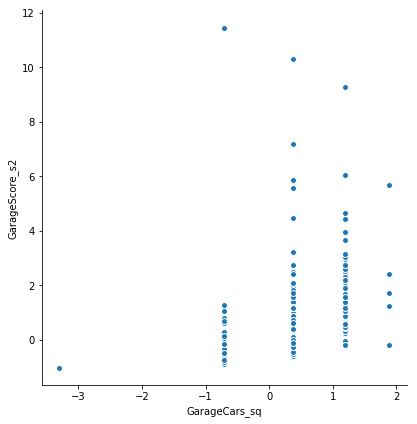

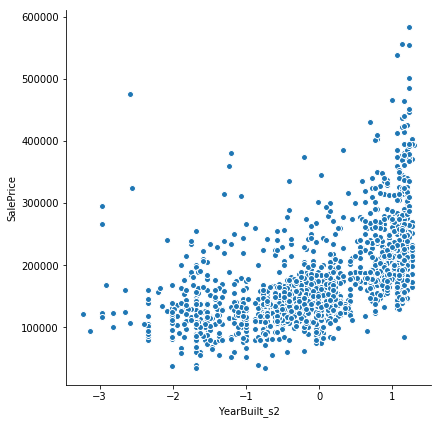

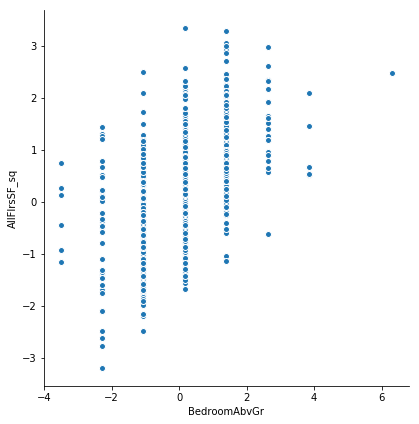

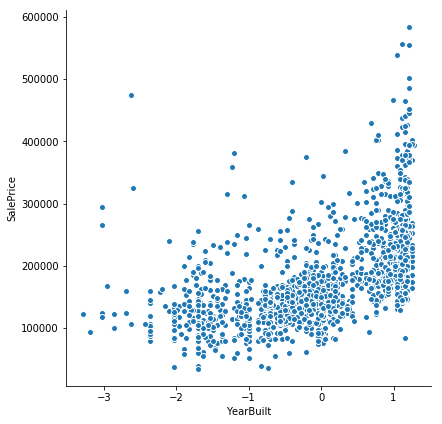

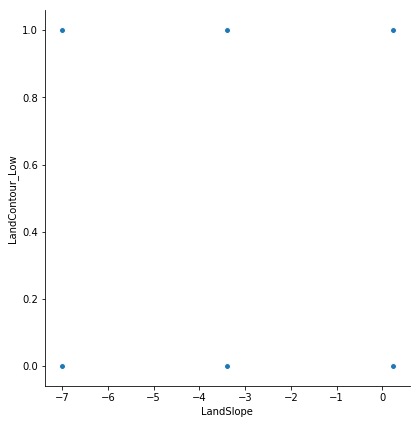

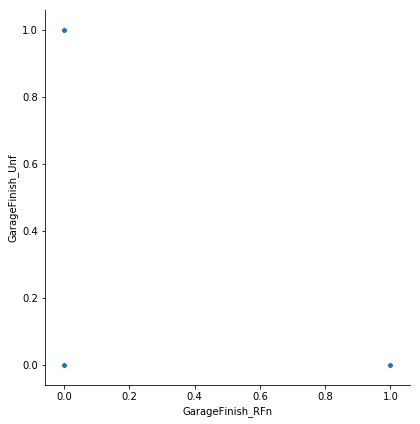

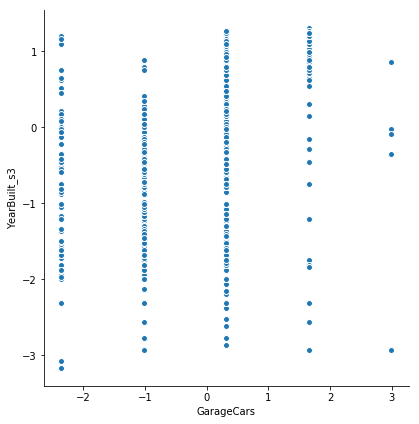

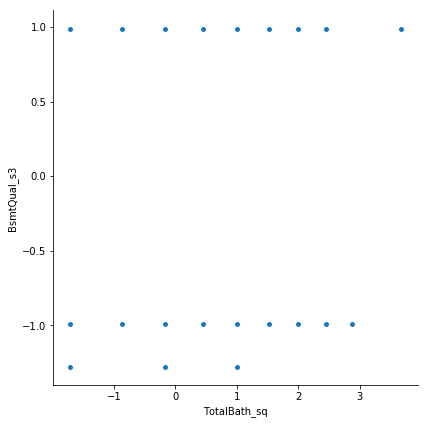

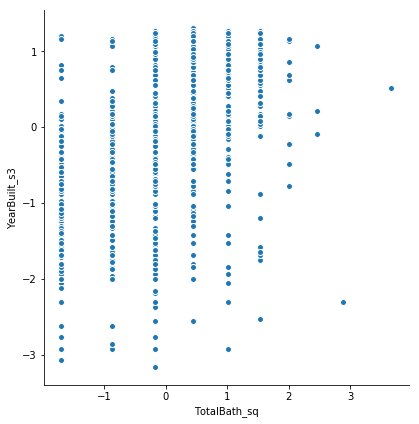

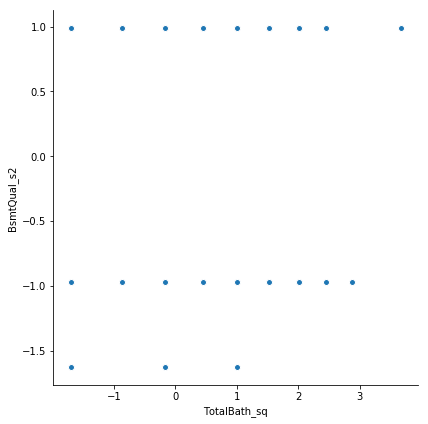

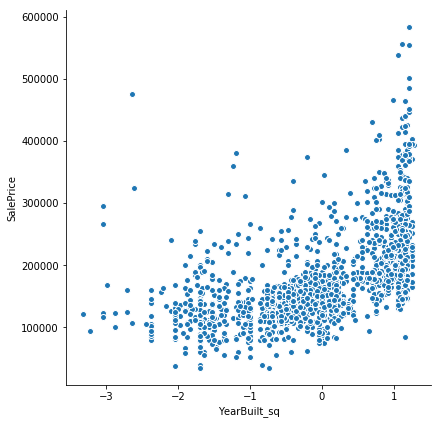

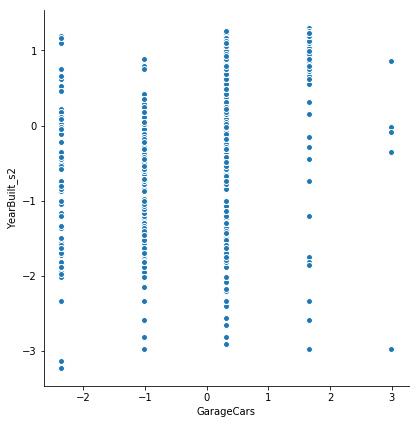

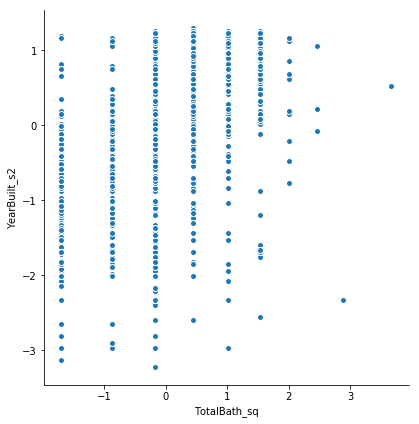

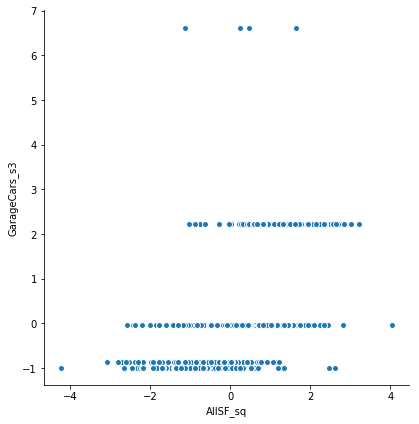

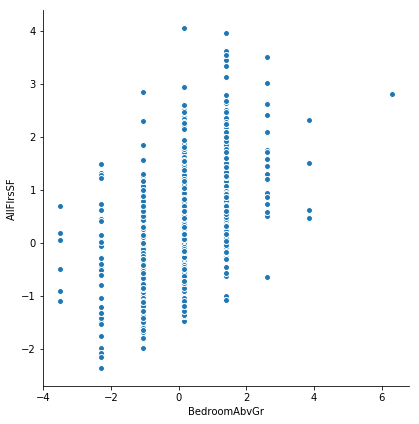

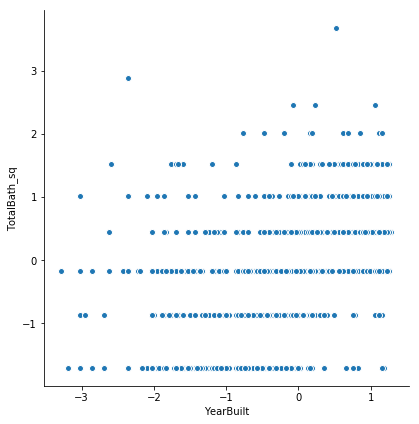

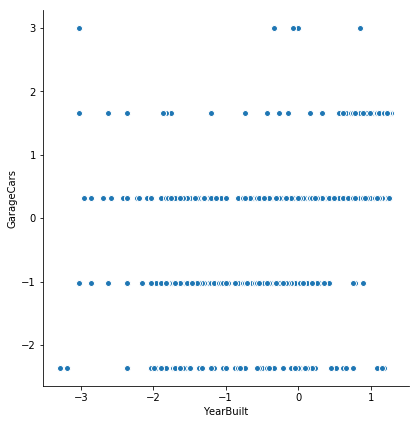

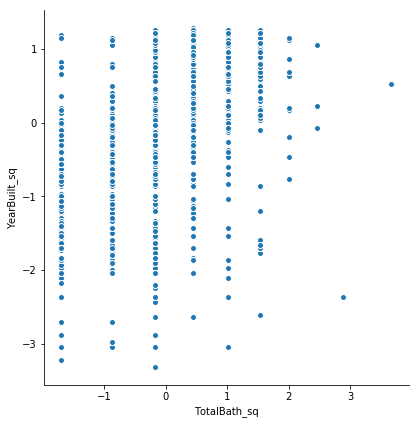

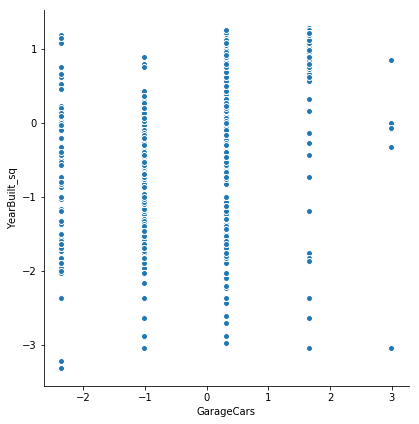

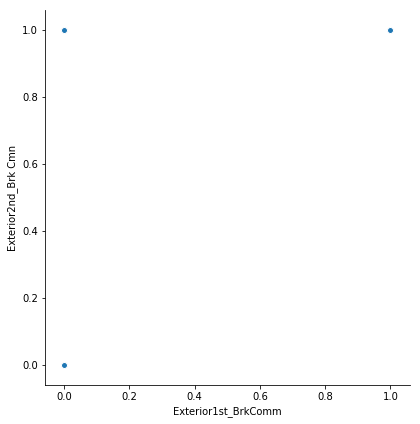

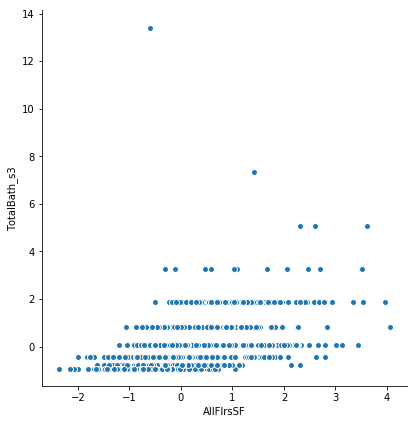

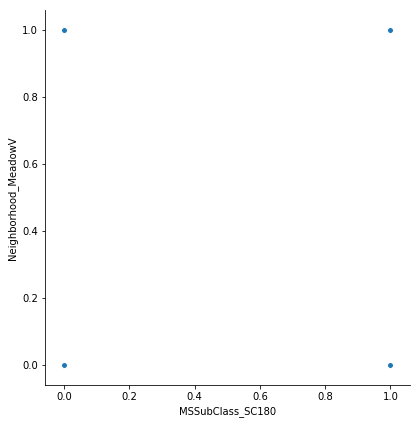

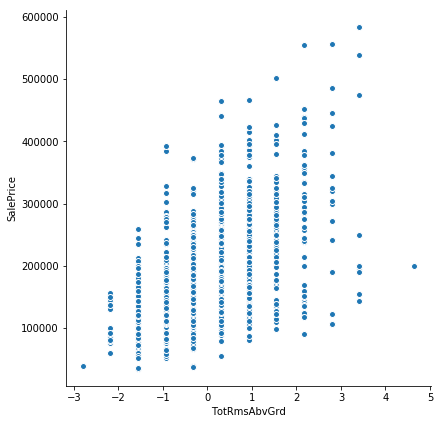

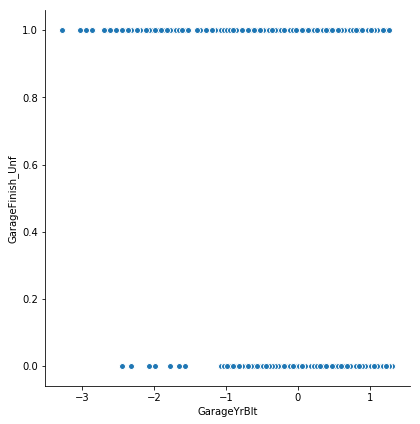

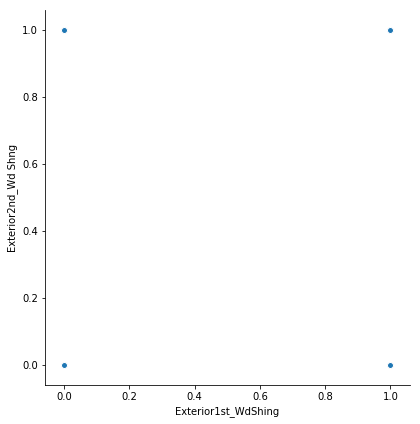

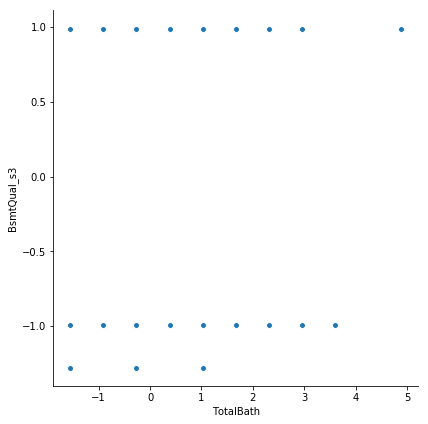

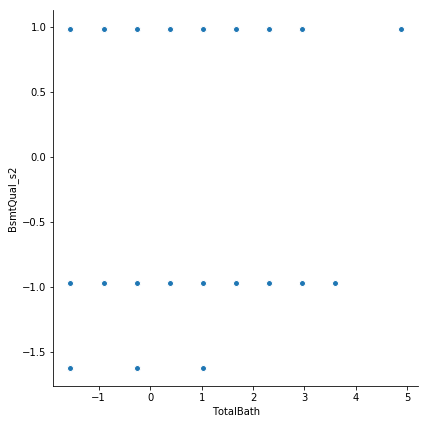

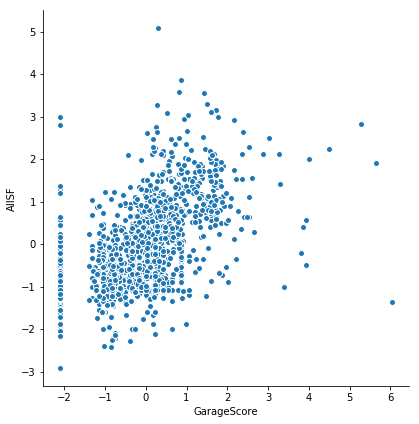

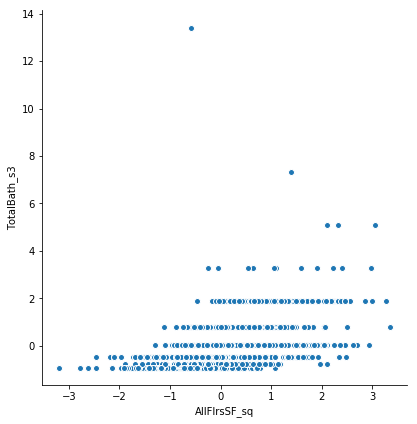

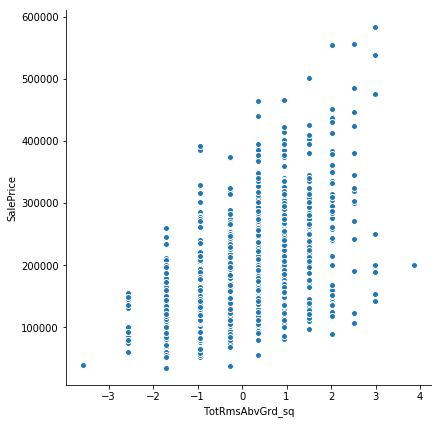

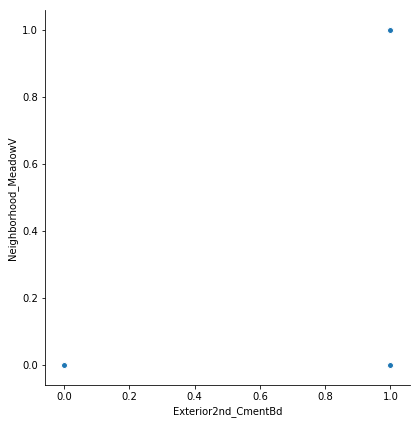

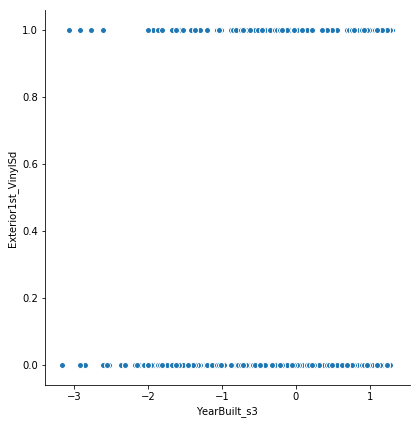

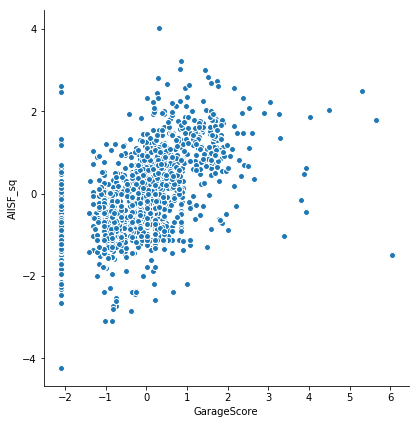

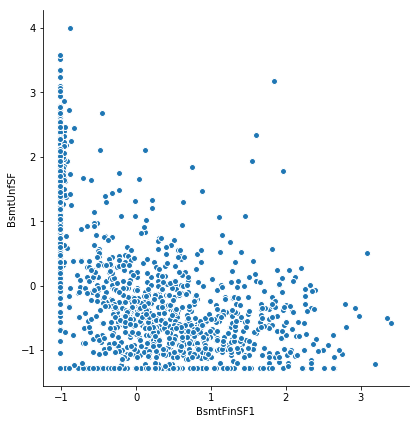

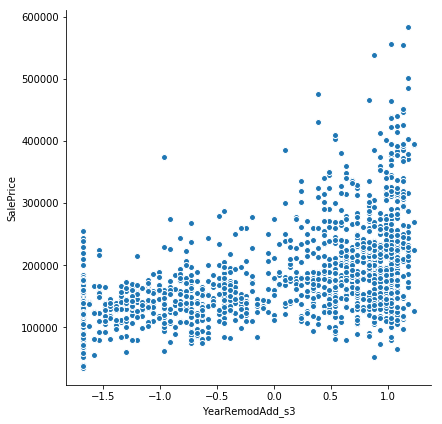

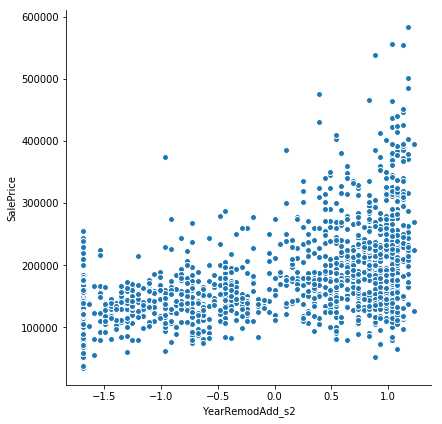

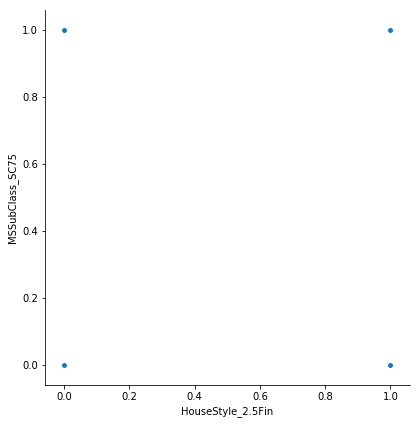

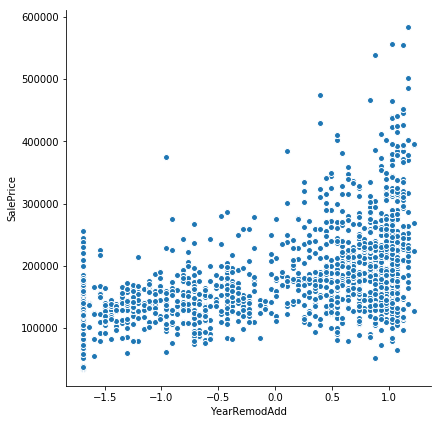

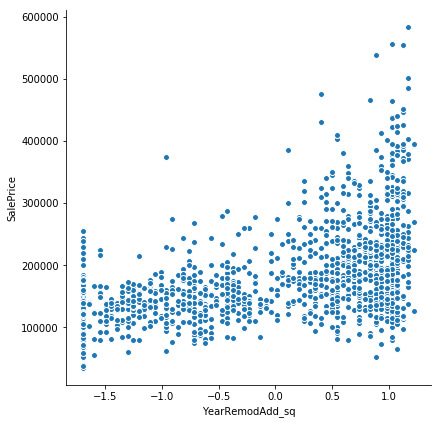

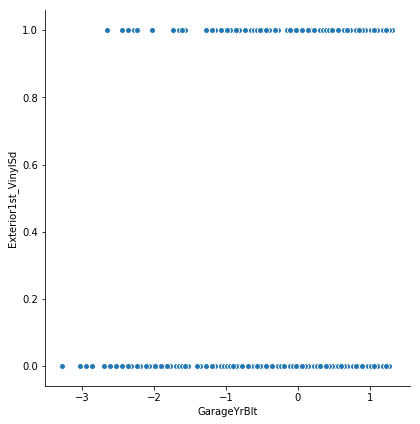

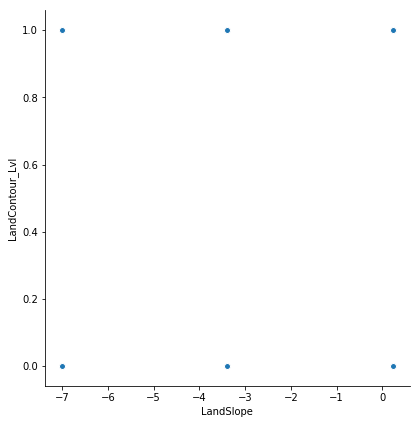

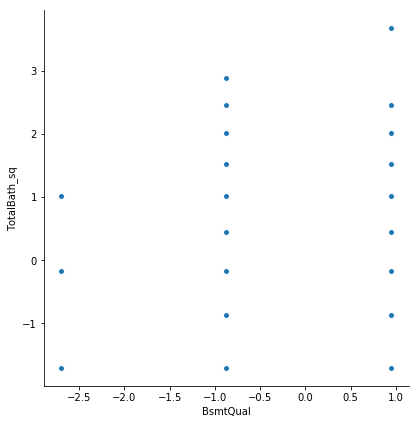

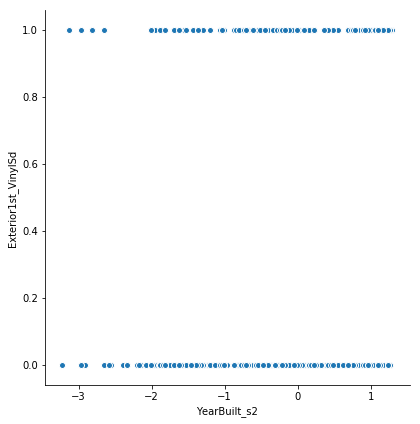

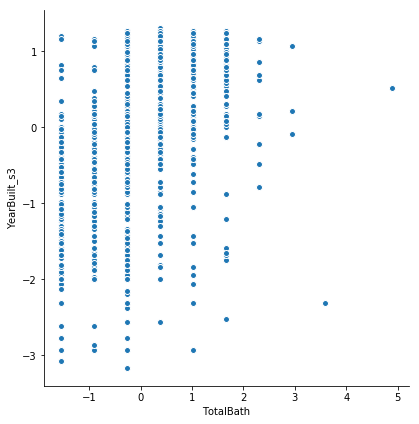

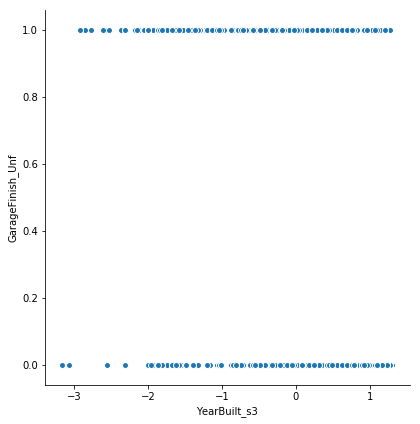

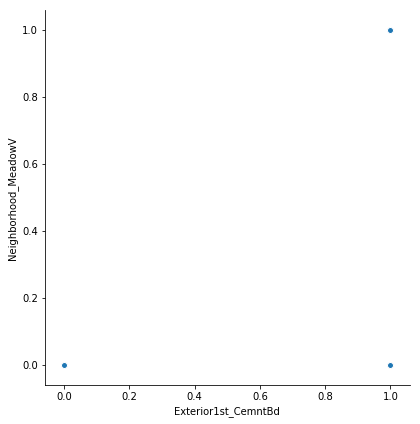

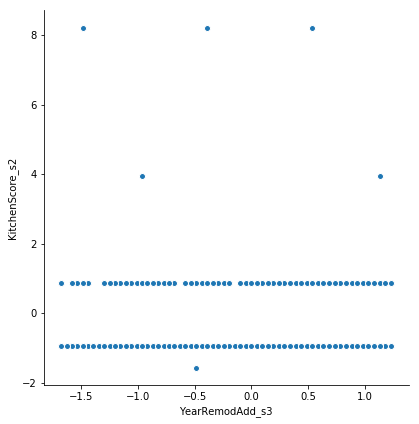

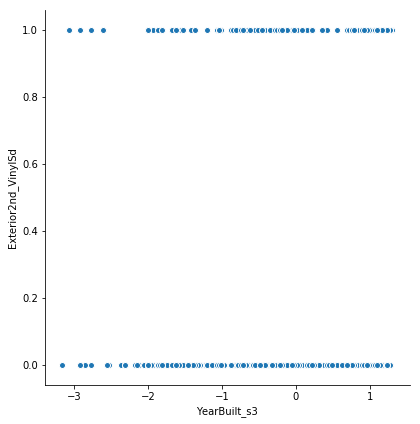

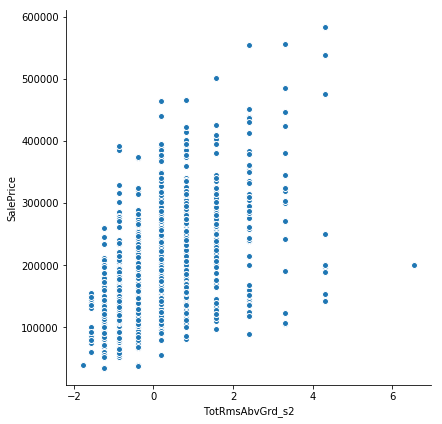

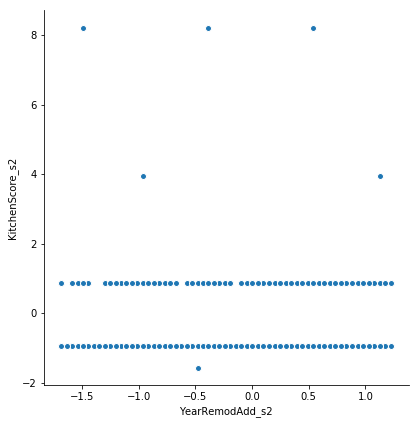

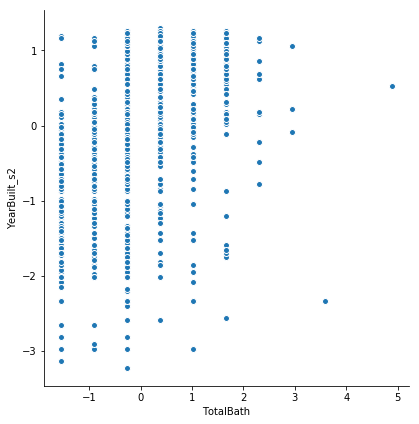

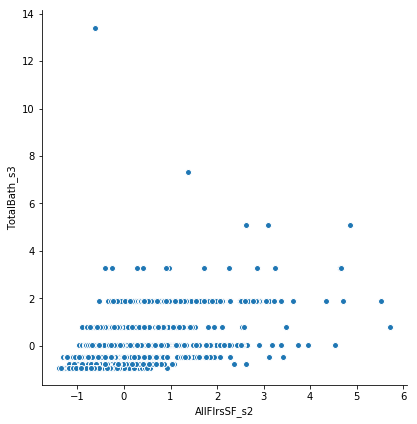

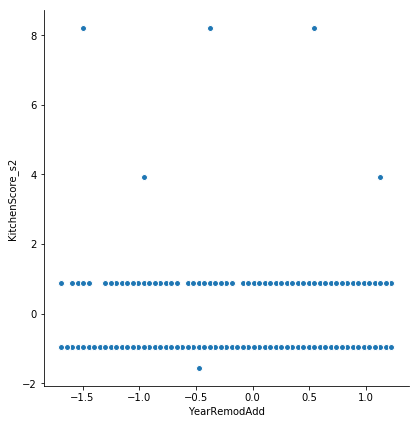

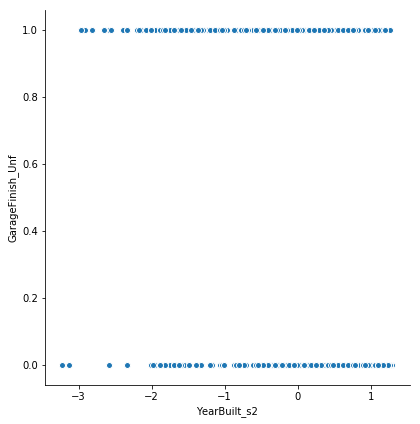

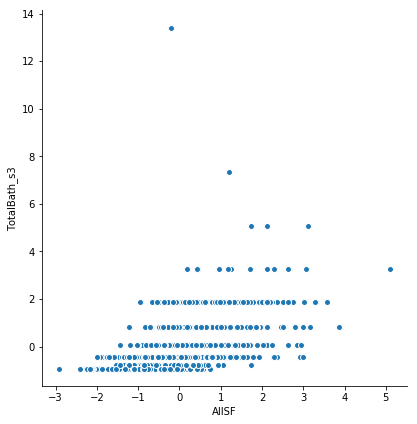

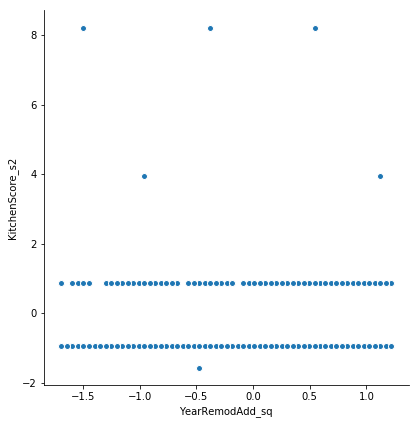

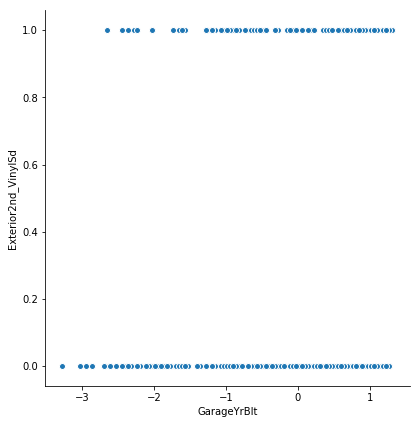

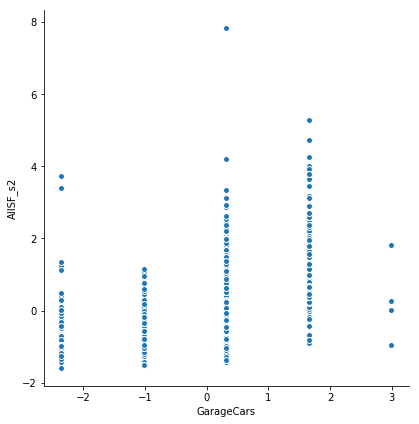

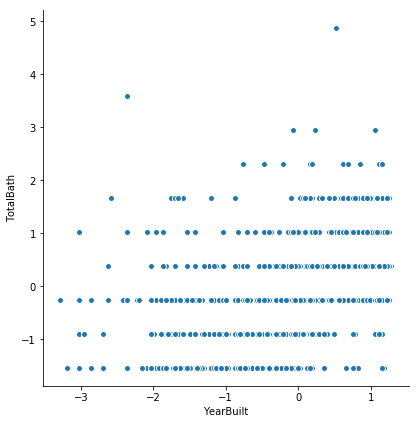

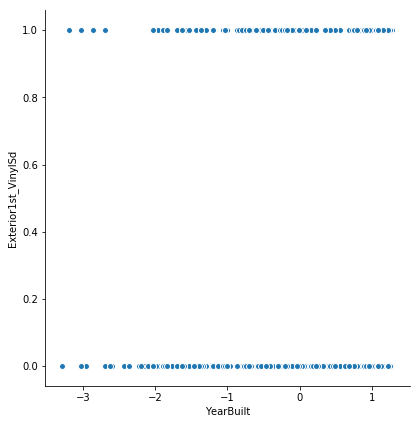

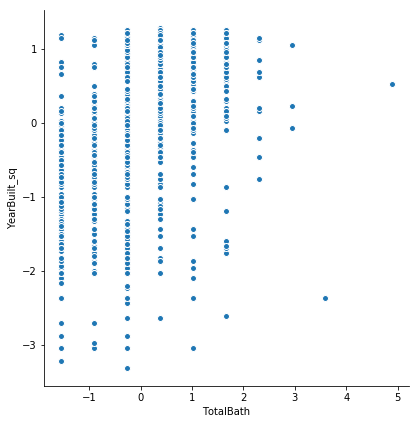

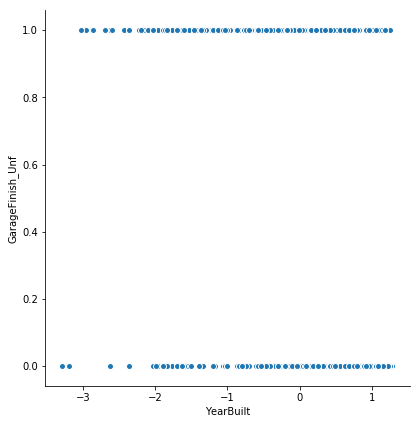

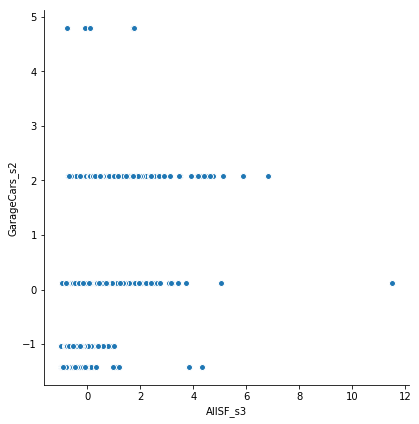

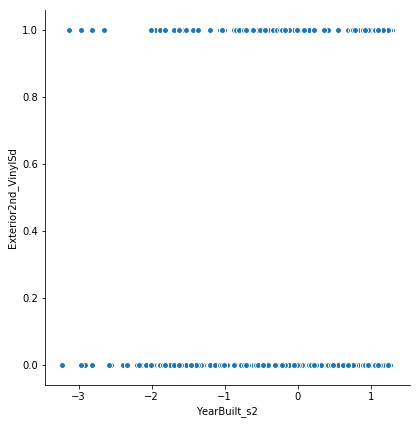

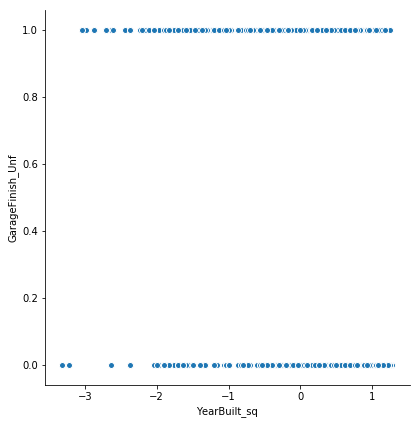

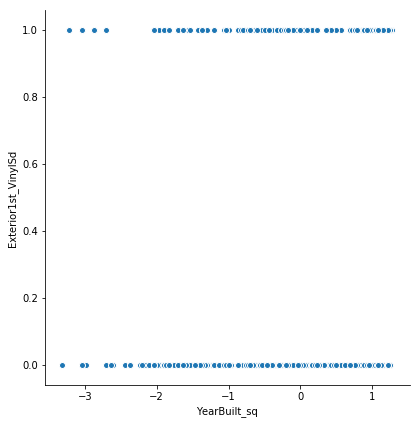

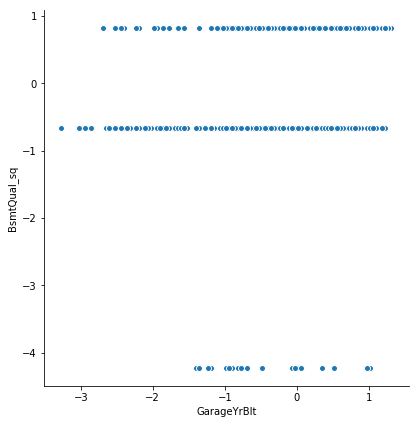

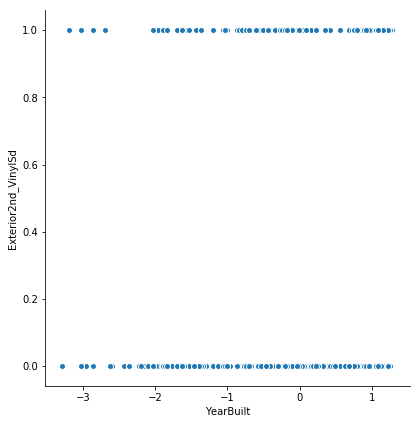

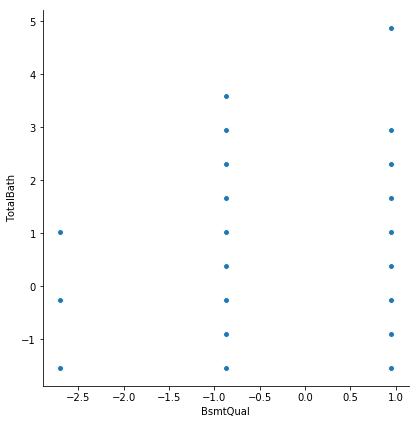

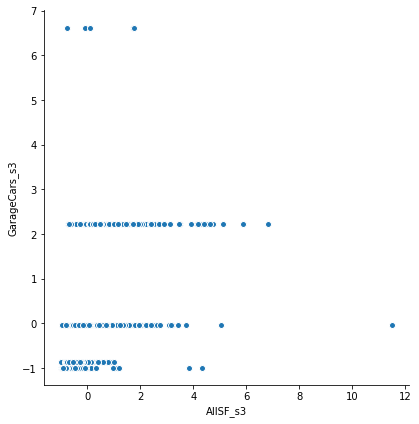

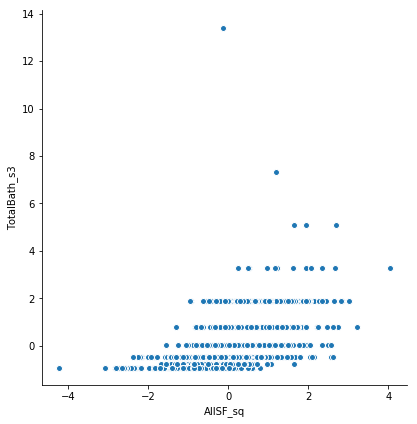

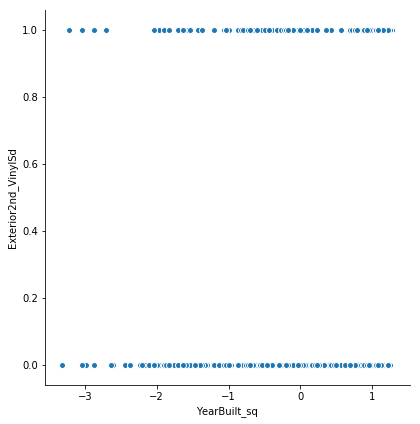

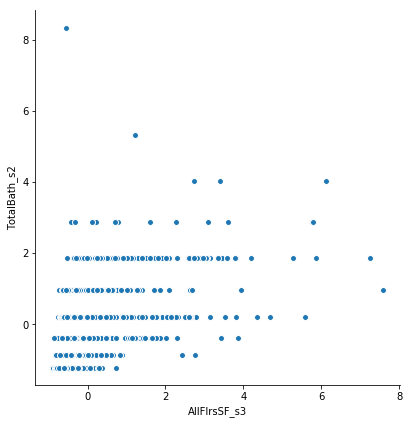

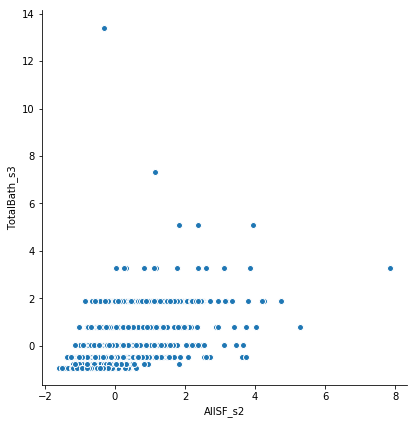

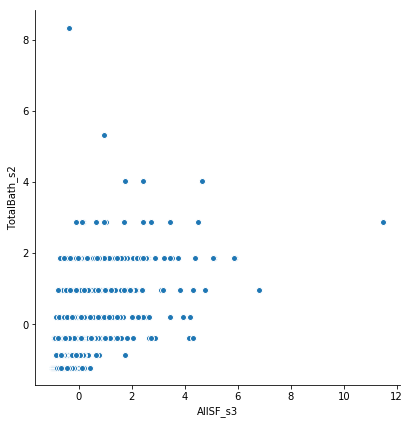

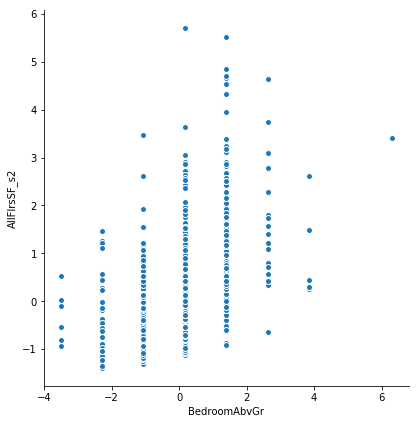

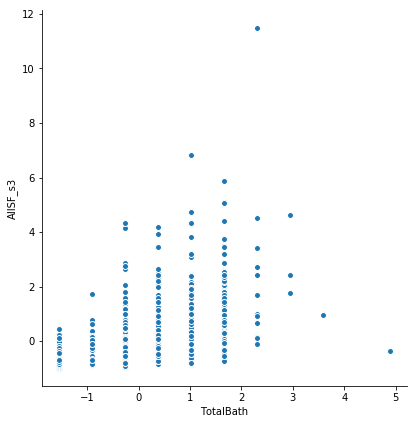

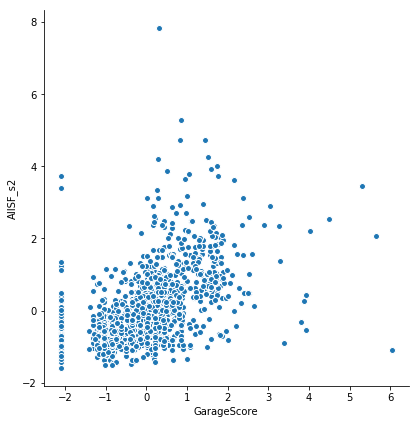

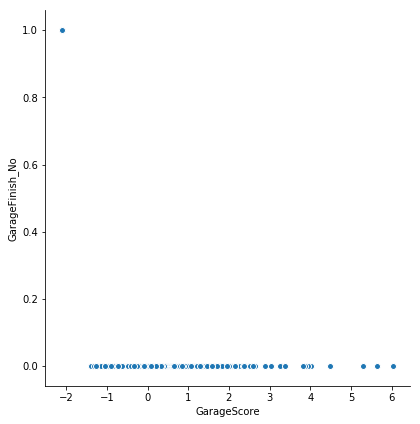

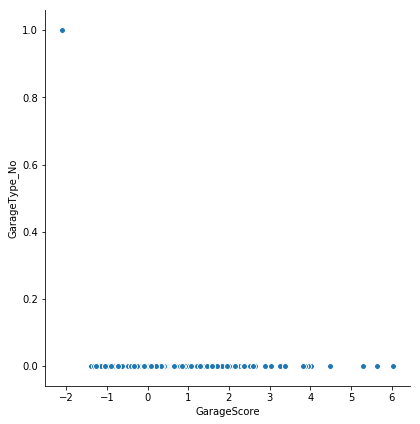

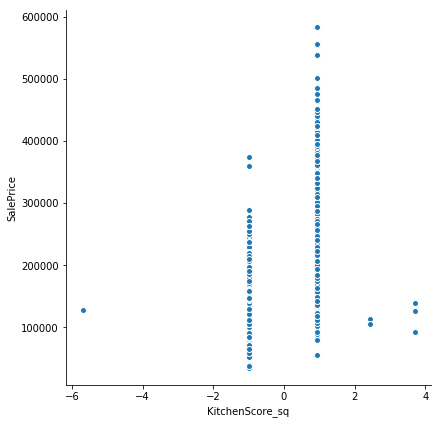

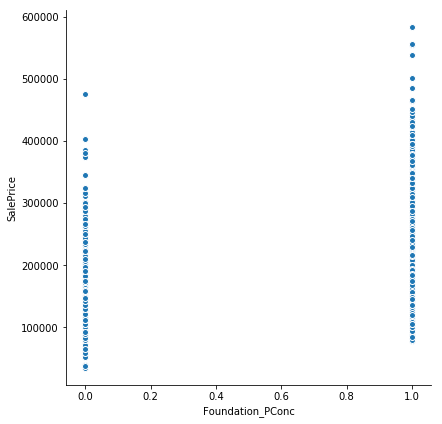

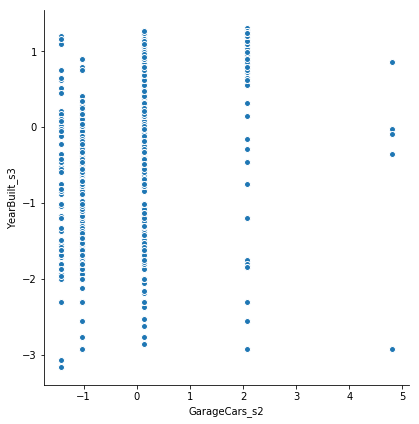

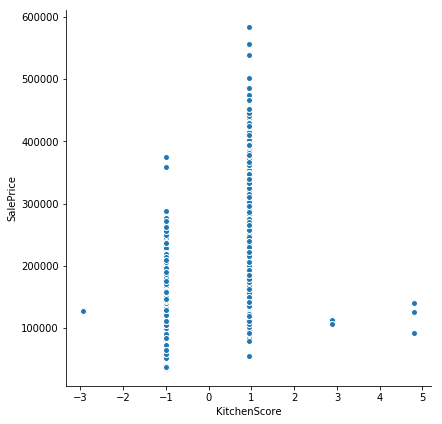

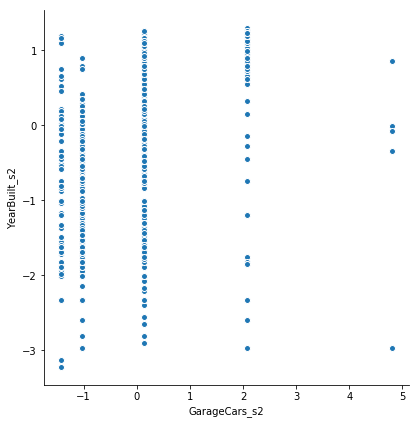

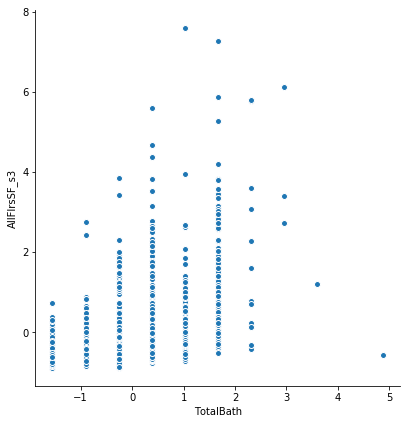

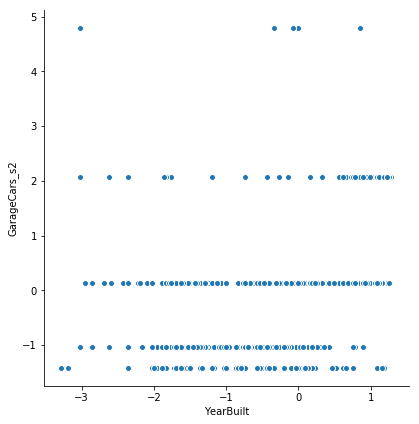

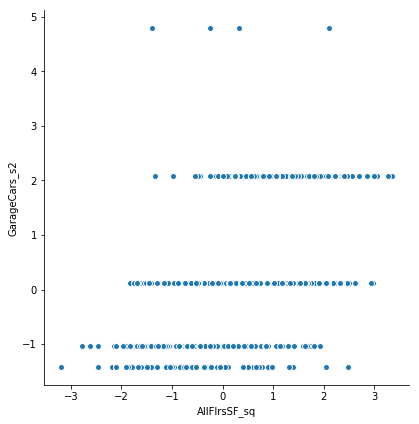

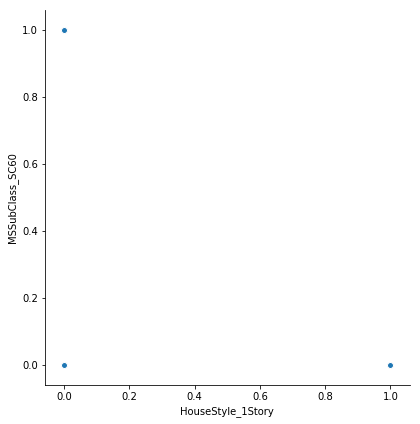

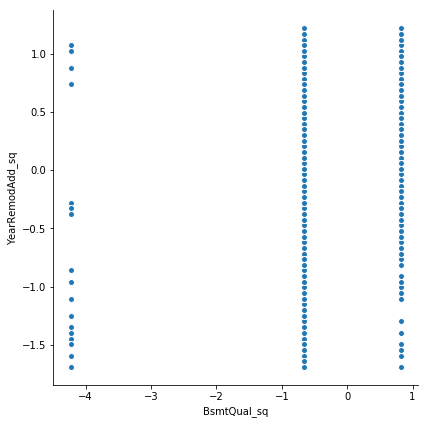

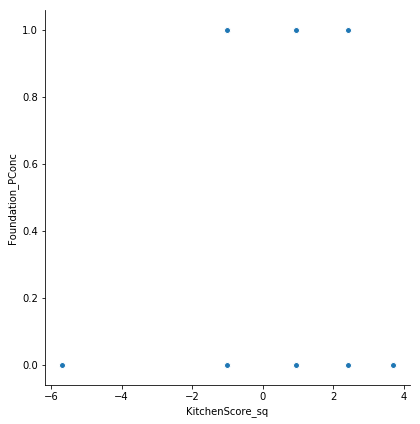

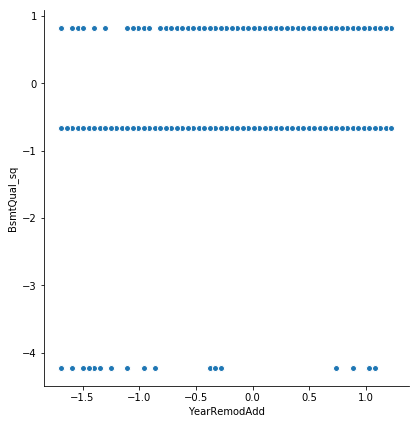

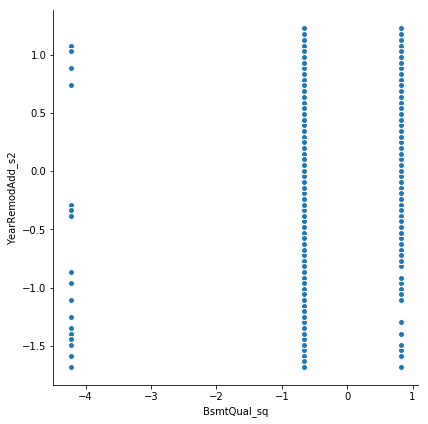

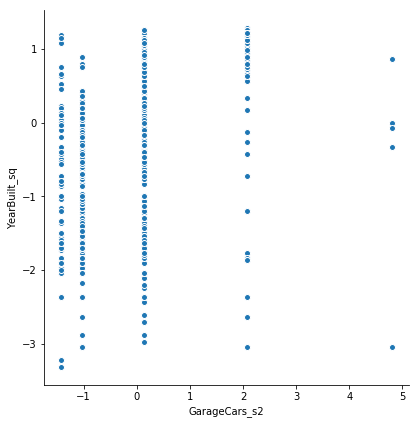

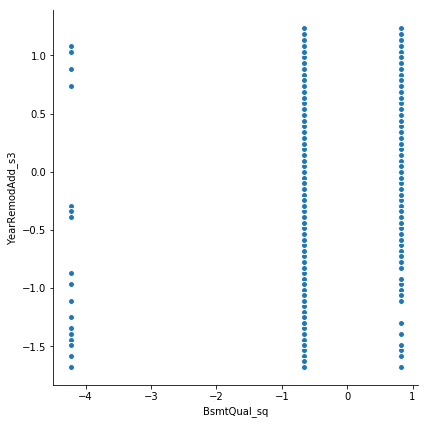

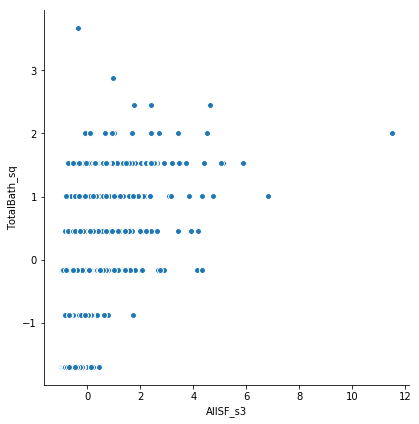

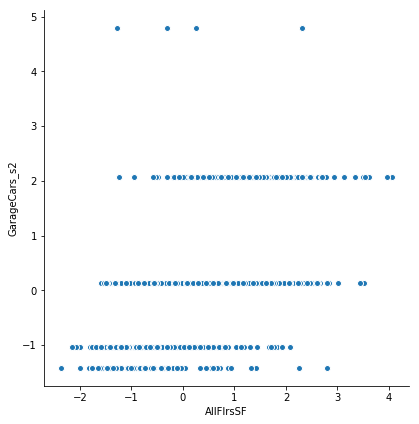

In [76]:
# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(data, size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 0 to 1455
Columns: 281 entries, LotFrontage to SalePrice
dtypes: float64(67), int64(214)
memory usage: 3.2 MB


In [83]:
data.to_csv('AmesHouse_FE_train.csv', index=False)